# SIMPLE WORKFLOW FOR SPATIAL TRANSCRIPTOMICS ANALYSIS

## PARAMETERS

In [1]:
fileforloading = 'Spatialanalysis_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09_analysis'

load(paste0(fileforloading, ".RData"))




Warning message:
“multiple methods tables found for ‘which’”


Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun



In [4]:
# ##################################################################
# 'TMA.block'
# 'ROI.size'
# 'Ventricle'
# 'Segment.id'
# 'Segment.type' -> "celltype"
# 'PID'
# 'Operation'
# 'Fixation.interval'
# 'Gender'
# 'Age'
# 'Institute'
# 'Clinical_phenotype_path'
# 'Clinical_endstage'
# 'After_LVAD'
# 'P_Normal'
# 'P_Degeneration''P_Hypertrophy''P_Disarray''P_Fibrosis''P_peri_infarction''P_etc'
# 'Echo_date''Echo_LVEF''Echo_LVPWd''Echo_IVSd''Echo_chamber_size''Echo_RWMA''Echo_RV_dysfunction''Echo_AR''Echo_MR''Echo_TR'
# 'ECG_date''ECG_voltage''ECG_QRS''VTandVF''AF''BNP''Probnp''CardiacMR_DE''Gene'
# 'ECG_voltage_n''ECG_QRS_n'
# 'Core.c.fullROI'
# 'PID.Op''PID.Op.bothblock''ROI.bothsize'
# 'Clinical_phenotype_LV''Clinical_phenotype_tri''Clinical_phenotype_bi'


# Number of core to use for DREAM analysis
 NoCore = 8 # 8

# Normalization method 
 nlm = "upperquartile" # "upperquartile"

# # Condition of interest (among column names of met)
  # COI <- "Clinical_phenotype_bi"   # COI <- "celltype" 
    COI <- "celltype" 
# USING ONLY SPECIFIC SET of CORES - For example cores with full ROI 
  # FullROI_selection <- "Y"
  FullROI_selection <- "N"

# CELL TYPE SELECTION?
  celltype_selection <- "N"  # or "N"
  # celltype_selection <- "Y"  # or "N"

  # Which celltype? 
  cell_type<- "Cardiomyocytes" # or ...

# ROISIZE SELECTION?
 ROISIZE_selection <- "Y" # or "N"
 ROIsize <- "large" # or ...

# VENTRICLE SELECTION?
    ventricle_selection <- "N"
    # ventricle_selection <- "Y" # or "N"
    ventricle_type <- "LV"

# Clinical Disease selection with control samples

    # disease_selection <- "Y"
    disease_selection <- "N"

    disease_selection_var <- "Clinical_phenotype_LV"
    disease_type_vector <- c("Control", "ES_HCMP", "NES_HCMP")  ## Clinical_phenotype_LV - 'ES_HCMP''ICMP''Control''DCMP''NES_HCMP'
    disease_type <- if(disease_selection == "Y") {disease_type = disease_type_vector
                                                  }else{disease_type= "Non"
                                                       }

# OUTLIER SELECTION?
 # if no 
  grid_set = "Y" 
  # grid_set = "N"

 # choose which grid set to use from the PCAgrid()
if (grid_set == "N") {
    outlier_set = "N"
    } else {
    outlier_set =  "pcaplot_outlier" #"pca_grid_10"# "pca_grid_10" # or pca_grid_10, pca_grid_3, etc
}

RE1 = "PID"
RE2 = "Institute"
RE3 = "Fixation.interval"
# RE4 = "P_Normal"
# RE4 = "Clinical_phenotype_LV"
# RE4 = "..." 
#...

if (exists("RE4")==TRUE) {
    (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
    (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
# RE names
    (RE_names <- paste(RE1, RE2, RE3, RE4, sep="_"))
    }else{
    if (exists("RE3")==TRUE) {
        (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))
        (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))

# RE names
        (RE_names <- paste(RE1, RE2, RE3, sep="_"))
        }else{
        if (exists("RE2")==TRUE) {
            (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))
            (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))

# RE names
            (RE_names <- paste(RE1, RE2, sep="_"))
            }else{
            if (exists("RE1")==TRUE) {
                (form <- formula(paste("~", "condition + (1|", RE1, ")", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ")", collapse="")))

# RE names
                (RE_names <- paste(RE1, sep="_"))
                }else{
                (form <- formula(paste("~", "condition", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition", collapse="")))

# RE names
                (RE_names <- paste(No, sep="_"))
                }
        }
    }
}
                
# Decide Contrast for DREAM

makecontrastasroutine <- "celltype_comwith_othercells" 
# makecontrastasroutine <- "Forclinicaldisease" # or "Y" to make it according to the number of condition
# makecontrastasroutine <- "Y" #to make it according to the number of condition

# Small sample number analysis 
 KRanaly <- "Y"
 # KRanaly <- "N"
# Order of batch correction
# Cell-type selection -> Batch correction

# Outlier 
# remove Sejong
# Normalization method = Upper quartile 
# ##################################################################

[1] "PID_Institute_Fixation.interval"

In [5]:
(Analysis_name = paste("SejongIn_", COI, "_FullROI_", FullROI_selection, 
                      "_cellselection_", celltype_selection,
                                "_", cell_type, 
                                "_ROI_", ROIsize,
                                "_Vent_", ventricle_type,
                                "_DsSelect_", paste0(disease_type, "_", collapse="_"), disease_selection, 
                                "_", "OL_", outlier_set,
                                "_RE_", RE_names,
                                "_KR_", KRanaly,
                      Sys.Date(), sep=""))

[1] "SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09"

# PREPARATION

## Set up library

In [6]:
# R.Version()
# BiocManager::install(version = "3.14")
# BiocManager::install("sva")
# BiocManager::install("ggplot2")
# BiocManager::install("gridExtra")
# BiocManager::install("edgeR")
# BiocManager::install("UpSetR")
# BiocManager::install("tidyverse")
# BiocManager::install("BatchQC")
# BiocManager::install("RUVSeq")
# BiocManager::install("RColorBrewer")
# BiocManager::install("Glimma")
# BiocManager::install("variancePartition")
# BiocManager::install("BiocParallel")
# install.packages("gplots")
# install.packages("NMF")
# BiocManager::install("GO.db")
# BiocManager::install("org.Hs.eg.db")
# devtools::install_github("GabrielHoffman/variancePartition")
# remotes::install_github("valentint/rrcov")
# BiocManager::install("GSA")
# BiocManager::install("RCurl")
# BiocManager::install("RCy3")
# install.packages("patchwork")
# install.packages("ggbreak")


In [ ]:
library("sva")
library("ggplot2")
library("gridExtra")
library("edgeR")
library("UpSetR")
library("tidyverse")
library("BatchQC")
library("RColorBrewer")
library("Glimma")
library("variancePartition")
library("BiocParallel")
library("gplots")
library("NMF")
library("GO.db")
library("org.Hs.eg.db")
library(preprocessCore)
library(genefilter)
library(matrixStats)
library(rafalib)
library(PCAtools)
library(Biobase)
library(GEOquery)
library(bigutilsr)
library(spatstat)
library(matrixStats)
library(RCurl)
library(GSA)
library(RCy3)
library(fgsea)
library(data.table)
# library(plotly) # has conflict with org.Hs.eg.db select
# library(rrcov) # has conflict with biplot detach(rrcov)
library(DT) 
library(grid)
library(ComplexHeatmap)
library(cluster)
library(clusterProfiler)
library(enrichplot)
library(ggnewscale)
library(patchwork)
library(ggbreak)
require(scales)
library(RUVSeq)

In [8]:
options(repr.plot.width=18, repr.plot.height=10)


In [9]:
# prepare pathway input
gmt.file.h <- "h.all.v7.5.1.entrez.gmt"
gmt.path.h <- file.path(getwd(), "gmt", gmt.file.h)
pathways.h <- gmtPathways(gmt.path.h)

gmt.file.c2 <- "c2.all.v7.5.1.entrez.gmt"
gmt.path.c2 <- file.path(getwd(), "gmt", gmt.file.c2)
pathways.c2 <- gmtPathways(gmt.path.c2)

gmt.file.c2kegg <- "c2.cp.kegg.v7.5.1.entrez.gmt"
gmt.path.c2kegg <- file.path(getwd(), "gmt", gmt.file.c2kegg)
pathways.c2kegg <- gmtPathways(gmt.path.c2kegg)

gmt.file.c2react <- "c2.cp.reactome.v7.5.1.entrez.gmt"
gmt.path.c2react <- file.path(getwd(), "gmt", gmt.file.c2react)
pathways.c2react <- gmtPathways(gmt.path.c2react)

gmt.file.c5go <- "c5.go.v7.5.1.entrez.gmt"
gmt.path.c5go <- file.path(getwd(), "gmt", gmt.file.c5go)
pathways.c5go <- gmtPathways(gmt.path.c5go)

gmt.file.c5hpo <- "c5.hpo.v7.5.1.entrez.gmt"
gmt.path.c5hpo <- file.path(getwd(), "gmt", gmt.file.c5hpo)
pathways.c5hpo <- gmtPathways(gmt.path.c5hpo)

gmt.file.c7 <- "c7.all.v7.5.1.entrez.gmt"
gmt.path.c7 <- file.path(getwd(), "gmt", gmt.file.c7)
pathways.c7 <- gmtPathways(gmt.path.c7)

gmt.file.c8 <- "c8.all.v7.5.1.entrez.gmt"
gmt.path.c8 <- file.path(getwd(), "gmt", gmt.file.c8)
pathways.c8 <- gmtPathways(gmt.path.c8)

gmt.file.c5gobp <- "c5.go.bp.v7.5.1.entrez.gmt"
gmt.path.c5gobp <- file.path(getwd(), "gmt", gmt.file.c5gobp)
pathways.c5gobp <- gmtPathways(gmt.path.c5gobp)

gmt.file.c5gocc <- "c5.go.cc.v7.5.1.entrez.gmt"
gmt.path.c5gocc <- file.path(getwd(), "gmt", gmt.file.c5gocc)
pathways.c5gocc <- gmtPathways(gmt.path.c5gocc)

gmt.file.c5gomf <- "c5.go.mf.v7.5.1.entrez.gmt"
gmt.path.c5gomf <- file.path(getwd(), "gmt", gmt.file.c5gomf)
pathways.c5gomf <- gmtPathways(gmt.path.c5gomf)


gmt.file.c5go <- "c5.go.bp.v7.5.1.entrez.gmt"
gmt.path.c5go <- file.path(getwd(), "gmt", gmt.file.c5go)
pathways.c5go <- gmtPathways(gmt.path.c5go)


str(head(pathways.h))

pathways <- list("pathways.h"=pathways.h,"pathways.c2"=pathways.c2
                , "pathways.c2kegg"=pathways.c2kegg
                , "pathways.c2react"=pathways.c2react
                , "pathways.c5go"=pathways.c5go
                , "pathways.c5hpo"=pathways.c5hpo
                , "pathways.c7"=pathways.c7
                , "pathways.c8"=pathways.c8
                )

List of 6
 $ HALLMARK_TNFA_SIGNALING_VIA_NFKB   : chr [1:200] "3726" "2920" "467" "4792" ...
 $ HALLMARK_HYPOXIA                   : chr [1:200] "5230" "5163" "2632" "5211" ...
 $ HALLMARK_CHOLESTEROL_HOMEOSTASIS   : chr [1:74] "2224" "1595" "3422" "2222" ...
 $ HALLMARK_MITOTIC_SPINDLE           : chr [1:199] "9181" "23332" "3832" "9493" ...
 $ HALLMARK_WNT_BETA_CATENIN_SIGNALING: chr [1:42] "4609" "1499" "3714" "4851" ...
 $ HALLMARK_TGF_BETA_SIGNALING        : chr [1:54] "7046" "4092" "7040" "64750" ...


## FUNCTIONS

### Function to select groups according to phenotype

In [10]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Segment.id"
# Y="Cardiomyocytes"
# W="p"
# Z="e_abc"

select_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_"),df_p[df_p[[x]]==y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"


### Function to remove group according to a phenotype

In [11]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Institute"
# Y="Sejong"
# W="met"
# Z="exp_rmnp"

remove_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_rm_"),df_p[df_p[[x]]!=y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_rm_"))

assign(paste(z, y, sep="_rm_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_rm_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"

### Function to select groups according to multiple phenotypes

In [12]:
# if want to choose phenotpye dataset w, colname x , vector of variables y, expressiondataset z)
# example ## select Control, HCMP only
# HCMPs <- c('Control','ES_HCMP', 'NES_HCMP') # Name of phenotypes to compare
# X="Clinical_phenotype_2nd"
# Y="HCMPs"
# W="p_Cardiomyocytes_rm_sp_gridflag_large_LV"
# Z="e_cmc_cb_rm_sp_gridflag_large_LV"

select_group_m <- function(x,y,w,z){
    df_p <- get(w)
    df_y <- get(y)
assign(paste(w, y, sep="_"),df_p[df_p[[x]]%in%df_y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in phenotype data is 30"
# [1] "the file name of the expression data is e_cmc_cb_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in expression data is 30"


### Function to remove specific samples 

In [13]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
remove_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_rm_"), df_p[!(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_rm_"))

assign(paste(z, x, sep="_rm_"), df_e[,!(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_rm_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to select specific samples

In [14]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
select_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_w_"), df_p[(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_w_"))

assign(paste(z, x, sep="_w_"), df_e[,(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_w_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_w_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_w_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)

In [15]:
### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)
## my first function
## making function par(mfrow=c(2,2))
qqplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with qqplot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
qqplot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main="before batch corr and normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(exp_out[,x], exp_out[,y], main="before batch corr and normalization")
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
qqplot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main="before batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_bb_norm[,x], e_bb_norm[,y], main="before batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

# after batch correction

qqplot(log2(e[,x]+1), log2(e[,y]+1), main="after batch corr before normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e[,x], e[,y], main="after batch corr before normalization")
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

qqplot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main="after batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_norm[,x], e_norm[,y], main="after batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)

In [16]:
### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)
# ## making second function
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

maplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with maplot"))
    par(mfrow=c(2,4))
    
# before batch correction

mm2 = log2(exp_out[,x]+1) - log2(exp_out[,y]+1)
aa2 = log2(exp_out[,x]+1) + log2(exp_out[,y]+1)
plot(aa2,mm2,col=2, main=paste("standard deviation", round(sd(mm2),2), "before batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm = exp_out[,x] - exp_out[,y]
aa = (exp_out[,1]+exp_out[,2])/2
plot(aa,mm,col=2, main=paste("standard deviation", round(sd(mm),2), "before batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)


# normalization before batch correction
mm2_normal = log2(e_bb_norm[,x]+1) - log2(e_bb_norm[,y]+1)
aa2_normal = log2(e_bb_norm[,x]+1) + log2(e_bb_norm[,y]+1)
plot(aa2_normal,mm2_normal,col=2, main=paste("standard deviation", round(sd(mm2_normal),2), "before batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
  
    
mm_normal = e_bb_norm[,x] - e_bb_norm[,y]
aa_normal = (e_bb_norm[,x] + e_bb_norm[,y])/2
plot(aa_normal,mm_normal,col=2, main=paste("standard deviation", round(sd(mm_normal),2), "before batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)
    

# after batch correction
    
mm1 = log2(e[,x]+1) - log2(e[,y]+1)
aa1 = log2(e[,x]+1) + log2(e[,y]+1)
plot(aa1,mm1,col=2 , main=paste("standard deviation", round(sd(mm1),2), "after batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm_bc = e[,x] - e[,y]
aa_bc = (e[,x] + e[,y])/2
plot(aa_bc,mm_bc,col=2, main=paste("standard deviation", round(sd(mm_bc),2), "after batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)
    
# normalization after batch correction
mm1_normal = log2(e_norm[,x]+1) - log2(e_norm[,y]+1)
aa1_normal = log2(e_norm[,x]+1) + log2(e_norm[,y]+1)
plot(aa1_normal,mm1_normal,col=2, main=paste("standard deviation", round(sd(mm1_normal),2), "after batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
    
mm_bcnormal = e_norm[,x] - e_norm[,y]
aa_bcnormal = (e_norm[,x] + e_norm[,y])/2
plot(aa_bcnormal,mm_bcnormal,col=2, main=paste("standard deviation", round(sd(mm_bcnormal),2), "after batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)

}

### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)

In [17]:
### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)
## making function par(mfrow=c(2,2))
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

plot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with simple plot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
plot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main=paste("correlation=", signif(cor(log2(exp_out[,x]+1), log2(exp_out[,y]+1)),2),"before batch corr and normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(exp_out[,x], exp_out[,y], main=paste("correlation=", signif(cor(exp_out[,x], exp_out[,y]),2),"before batch corr and normalization"))
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
plot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1)),2),"before batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_bb_norm[,x], e_bb_norm[,y], main=paste("correlation=", signif(cor(e_bb_norm[,x], e_bb_norm[,y]),2),"before batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

# after batch correction

plot(log2(e[,x]+1), log2(e[,y]+1), main=paste("correlation=", signif(cor(log2(e[,x]+1), log2(e[,y]+1)),2),"after batch corr before normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e[,x], e[,y], main=paste("correlation=", signif(cor(e[,x], e[,y]),2),"after batch corr before normalization"))
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

plot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_norm[,x]+1), log2(e_norm[,y]+1)),2),"after batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_norm[,x], e_norm[,y], main=paste("correlation=", signif(cor(e_norm[,x], e_norm[,y]),2),"after batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 4 : summary_lm(x,y)

In [18]:
### Function to compare two sample's correlation - 4 : summary_lm(x,y)
## making function par(mfrow=c(2,2))
summary_lm <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with linear regression"))

    a<-lm(log2(exp_out[,x]+1) ~ log2(exp_out[,y]+1))
    b<-lm(exp_out[,x] ~ exp_out[,y])
    
    c <- lm(log2(e_bb_norm[,x]+1) ~ log2(e_bb_norm[,y]+1))
    d <- lm(e_bb_norm[,x] ~ e_bb_norm[,y])

# after batch correction

    f <- lm(log2(e[,x]+1) ~ log2(e[,y]+1))
    g <- lm(e[,x] ~ e[,y])

# after normalization
    h <- lm(log2(e_norm[,x]+1) ~ log2(e_norm[,y]+1))
    i <- lm(e_norm[,x] ~ e_norm[,y])

    

    print("before batch correction before normalization")
    print(a$coefficients[2])
    print(b$coefficients[2])

    print("before batch correction after normalization")
    
    print(c$coefficients[2])
    print(d$coefficients[2])
    
    print("after batch correction before normalization")
    
    print(f$coefficients[2])
    print(g$coefficients[2])
    
    print("after batch correction after normalization")
    
    print(h$coefficients[2])
    print(i$coefficients[2])

}

### Function to compare two sample's distance - 5 : distance_eucl

In [19]:
# # calculate all euclidean distance first - for time saving once 
#     d_exp_out <- dist(t(exp_out))
#     d_e_bb_norm <- dist(t(e_bb_norm))
#     d_e <- dist(t(e))
#     d_e_norm <- dist(t(e_norm))

In [20]:
### Function to compare two sample's distance - 5 : distance_eucl(x,y)
## making function par(mfrow=c(2,2))
distance_eucl <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with euclidean distance"))
# calculate all euclidean distance first - for time saving once 
    # d_exp_out <- dist(t(exp_out))
    # d_e_bb_norm <- dist(t(e_bb_norm))
    # d_e <- dist(t(e))
    # d_e_norm <- dist(t(e_norm))
    
    a<-as.matrix(d_exp_out)[x,y]
    b<-as.matrix(d_e_bb_norm)[x,y]
    c<-as.matrix(d_e)[x,y]
    d<-as.matrix(d_e_norm)[x,y]

    print("distance before batch correction before normalization")
    print(a)
    print("distance before batch correction after normalization")
    print(b)
    print("distance after batch correction before normalization")
    print(c)
    print("distance after batch correction after normalization")
    print(d)
    
}

# INPUT DATA

##  Input data - new rePCR

In [21]:
# Decide Input file
Input_expr_data = "Probe_QC_1percfilter_rePCR.csv"
Input_pheno_data = "Spatial_Annotation.2023-06-07.csv"

# Read Input files
exp_qc <- read.csv(Input_expr_data, row.names = 1, header = TRUE, stringsAsFactors=FALSE)
met_tmp<- read.csv(Input_pheno_data, header=TRUE, stringsAsFactors=FALSE)

In [22]:
# Refine met file to match expression file
met_tmp1 <- met_tmp %>% mutate(Name=paste(Scan.name, formatC(ROI..label., width=3, flag="0"), Segment..Name..Label., sep="..."))
rownames(met_tmp1)<- gsub(' ', '.', met_tmp1$Name)

met<-met_tmp1[match(colnames(exp_qc), rownames(met_tmp1)),]
identical(colnames(exp_qc), rownames(met))

met <- met %>% mutate(TMA.block = factor(TMA.block))

[1] TRUE

In [23]:
# define celltype
celltype <- as.factor(met$Segment..Name..Label.)
celltype <- gsub("Full ROI", "No_Seg",celltype) 
celltype <- gsub("Trp", "CMC", celltype)
celltype <- gsub("vessel", "EC", celltype)
celltype <- gsub("fb", "FB", celltype)

In [24]:
met <- cbind(met, celltype)

## Remove negative probe

In [25]:
negprobe=which(rownames(exp_qc)%in%"NegProbe-WTX")

class(negprobe)

exp_rmnp <- exp_qc[-negprobe,]
dim(exp_rmnp)
dim(exp_qc)

[1] "integer"

[1] 12800   178

[1] 12801   178

## GENE ANNOTATION (GENEID)

In [27]:
if ("plotly" %in% tolower((.packages())) == TRUE) {
    detach("package:plotly", unload=TRUE)
    }

In [28]:
# select makes error with clusterProfiler
if ("clusterProfiler" %in% (.packages()) == TRUE) {
detach("package:clusterProfiler", unload=TRUE)
    }

In [29]:
symbols <- rownames(exp_rmnp)

In [30]:
fdata <- select(org.Hs.eg.db, symbols, c("ENTREZID", "GENENAME"), "SYMBOL")


'select()' returned 1:many mapping between keys and columns



In [31]:
identical(fdata$SYMBOL,symbols)

[1] FALSE

In [32]:
## There are duplicates and missing

In [33]:
## first remove duplicates

In [34]:
## MENO1 take 51072 according to nanostring excel information

In [35]:
which(fdata$SYMBOL=="MEMO1")

[1] 17 18

In [36]:
fdata_nodup <- fdata[-17,]

In [37]:
dim(fdata_nodup)

[1] 12800     3

In [38]:
which(fdata_nodup$SYMBOL=="MEMO1")

[1] 17

In [39]:
## Replace Missing ENTREZIDs with IDs in Geomx file

In [40]:
symbols_noID<-fdata_nodup$SYMBOL[which(is.na(fdata_nodup$ENTREZID))]
length(symbols_noID)

[1] 62

In [41]:
gene_list = "gene_list_rePCR.csv"
geomx_gene <-read.csv(gene_list, header=TRUE, stringsAsFactors=FALSE)

In [42]:
geomx_glist<-geomx_gene[,c("TargetName","GeneID")]

In [43]:
missing_geomx <- geomx_glist$TargetName[which(geomx_glist$TargetName%in%symbols_noID)]
length(which(geomx_glist$TargetName%in%symbols_noID))

[1] 62

In [44]:
missing_glist<-geomx_glist[which(geomx_glist$TargetName%in%symbols_noID),]

In [45]:
reorder_missing_glist<-missing_glist[match(symbols_noID,missing_geomx),]
identical(reorder_missing_glist$TargetName, symbols_noID)

# fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))]<-missing_geomx_tb$GeneID

[1] TRUE

In [46]:
fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))] <- reorder_missing_glist$GeneID

### check duplicated IDs

In [47]:
test_dupl<-fdata_nodup[order(fdata_nodup$ENTREZID),]
head(test_dupl)

SYMBOL ENTREZID GENENAME                     
4255 NAT2   10       N-acetyltransferase 2        
4460 ADA    100      adenosine deaminase          
8004 CDH2   1000     cadherin 2                   
2680 AKT3   10000    AKT serine/threonine kinase 3
7322 MED6   10001    mediator complex subunit 6   
7544 ACOT8  10005    acyl-CoA thioesterase 8

In [48]:
which(duplicated(test_dupl$ENTREZID)==TRUE)

integer(0)

In [49]:
duplicated_fdata<-test_dupl[duplicated(test_dupl$ENTREZID)|duplicated(test_dupl$ENTREZID, fromLast=TRUE),]

In [50]:
duplicated_fdata

SYMBOL ENTREZID GENENAME

In [51]:
## confirmed that there is no duplicates

### If wants to change rownames to ENTREZID

In [52]:
# rownames(e_abc)<-fdata_nodup$ENTREZID

## Three data sets

In [54]:
Input_for_bc = exp_rmnp

In [55]:
e_bbc <- Input_for_bc # before batch correction 

f <- fdata_nodup
p <- met

In [56]:
unique(p$Segment.id)

[1] "Endothelial_cells"     "Cardiomyocytes"        "No_segmentation"      
[4] "Fibroblasts"           "Cardiomyocytes_low"    "Endothelial_cells_low"

In [57]:
identical(f$SYMBOL,symbols)

[1] TRUE

In [58]:
d_p <- DGEList(e_bbc)
d_pq3 <- calcNormFactors(d_p, method="upperquartile")
d_pq3cpm <- cpm(d_pq3, log=FALSE)

# Figure 1H - Segmentation Marker Expression "Troponin I, Vimentin, PECAM-1"

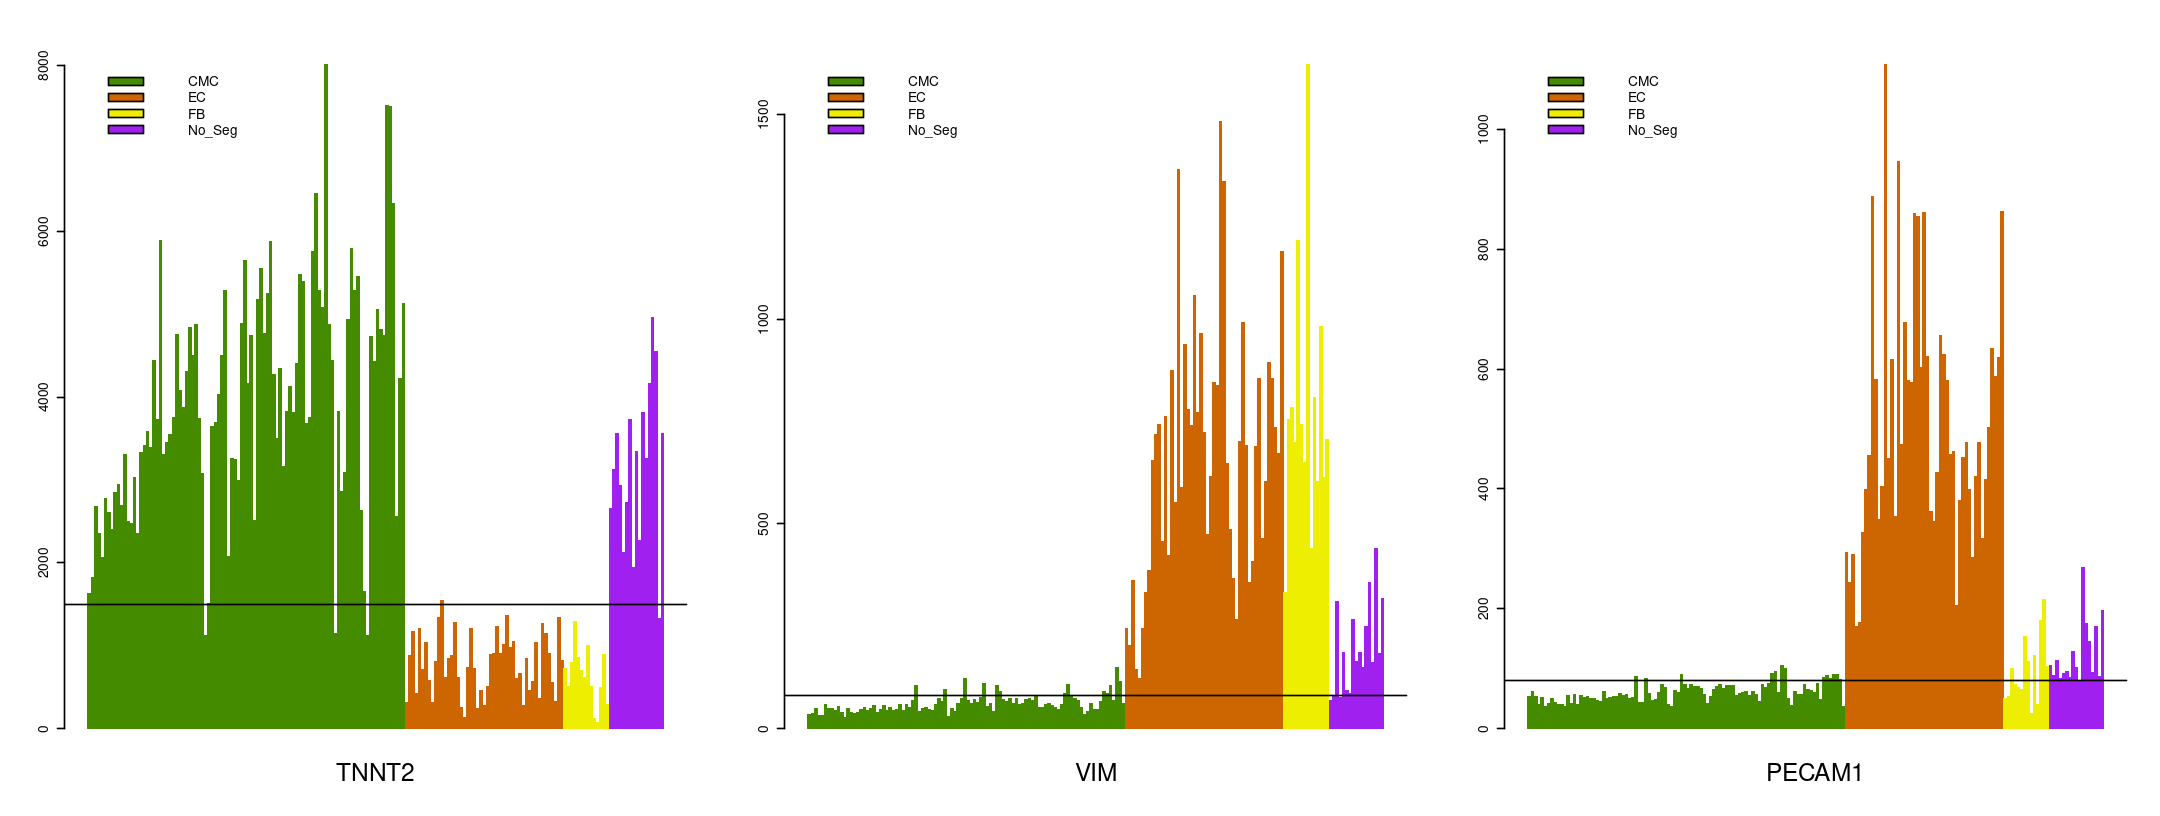

In [59]:
if (COI=="celltype"){
    options(repr.plot.width=18, repr.plot.height=6.8)
    par(mfrow=c(1,3))

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm["TNNT2",])))
  , which(grepl("vessel", names(d_pq3cpm["TNNT2",])))
  , which(grepl("fb", names(d_pq3cpm["TNNT2",])))
  , which(grepl("Full.ROI", names(d_pq3cpm["TNNT2",])))
)


cellmarker = "TNNT2"

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm[cellmarker,])))
  , which(grepl("vessel", names(d_pq3cpm[cellmarker,])))
  , which(grepl("fb", names(d_pq3cpm[cellmarker,])))
  , which(grepl("Full.ROI", names(d_pq3cpm[cellmarker,])))
)

cellmarkerorderedbycelltype<-d_pq3cpm[cellmarker,orderbycelltype]

barplot(cellmarkerorderedbycelltype, border = NA, col=ifelse(grepl("Trp", names(cellmarkerorderedbycelltype)), "chartreuse4", 
                                                ifelse(grepl("vessel", names(cellmarkerorderedbycelltype)), "darkorange3", 
                                                       ifelse(grepl("fb", names(cellmarkerorderedbycelltype)), "yellow2", 
                                                              "purple")
                                                      )
                                               ),
  xaxt = "n"  # Remove x-axis label
       ) 
abline(h=1500,col="black")
legend("topleft", legend = c("CMC", "EC", "FB", "No_Seg")
        , fill = c("chartreuse4", "darkorange3", "yellow2", "purple")
       , bty = "n") 

# Add cellmarker label below x-axis at the center
mtext(cellmarker, side = 1, line = 2, cex = 1.2, at = mean(par("usr")[1:2]))
    
cellmarker = "VIM"

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm[cellmarker,])))
  , which(grepl("vessel", names(d_pq3cpm[cellmarker,])))
  , which(grepl("fb", names(d_pq3cpm[cellmarker,])))
  , which(grepl("Full.ROI", names(d_pq3cpm[cellmarker,])))
)

cellmarkerorderedbycelltype<-d_pq3cpm[cellmarker,orderbycelltype]

barplot(cellmarkerorderedbycelltype, border = NA, col=ifelse(grepl("Trp", names(cellmarkerorderedbycelltype)), "chartreuse4", 
                                                ifelse(grepl("vessel", names(cellmarkerorderedbycelltype)), "darkorange3", 
                                                       ifelse(grepl("fb", names(cellmarkerorderedbycelltype)), "yellow2", 
                                                              "purple")
                                                      )
                                               ),
  xaxt = "n"  # Remove x-axis label
       ) 
abline(h=80,col="black")
legend("topleft", legend = c("CMC", "EC", "FB", "No_Seg")
        , fill = c("chartreuse4", "darkorange3", "yellow2", "purple")
       , bty = "n") 
# Add cellmarker label below x-axis at the center
mtext(cellmarker, side = 1, line = 2, cex = 1.2, at = mean(par("usr")[1:2]))
    
cellmarker = "PECAM1"

orderbycelltype<-c(which(grepl("Trp", names(d_pq3cpm[cellmarker,])))
  , which(grepl("vessel", names(d_pq3cpm[cellmarker,])))
  , which(grepl("fb", names(d_pq3cpm[cellmarker,])))
  , which(grepl("Full.ROI", names(d_pq3cpm[cellmarker,])))
)

cellmarkerorderedbycelltype<-d_pq3cpm[cellmarker,orderbycelltype]

barplot(cellmarkerorderedbycelltype, border = NA, col=ifelse(grepl("Trp", names(cellmarkerorderedbycelltype)), "chartreuse4", 
                                                ifelse(grepl("vessel", names(cellmarkerorderedbycelltype)), "darkorange3", 
                                                       ifelse(grepl("fb", names(cellmarkerorderedbycelltype)), "yellow2", 
                                                              "purple")
                                                      )
                                               ),
  xaxt = "n"  # Remove x-axis label
       )
abline(h=80,col="black")
legend("topleft", legend = c("CMC", "EC", "FB", "No_Seg")
        , fill = c("chartreuse4", "darkorange3", "yellow2", "purple")
       , bty = "n")    
# Add cellmarker label below x-axis at the center
mtext(cellmarker, side = 1, line = 2, cex = 1.2, at = mean(par("usr")[1:2]))


}



# GROUP SELECTION & BATCH CORRECTION

## Select Full-ROI set

In [60]:
 X0="Core.c.fullROI"
 Y0="Yes"
 W0="p"
 Z0="e_bbc" 
if (FullROI_selection == "Y") {

select_group(X0,Y0,W0,Z0)

output_p0 = get(paste(W0, "_", Y0, sep=""))
output_e0 = get(paste(Z0, "_", Y0, sep=""))
    } else {
    output_p0 = get(W0)
    output_e0 = get(Z0)
    }

## Select Cell-type 

In [61]:
 X1="Segment.id"
 Y1= cell_type
 W1="output_p0"
 Z1="output_e0"

if (celltype_selection == "Y") {

select_group(X1,Y1,W1,Z1)

output_p1 = get(paste(W1, "_", Y1, sep=""))
output_e1 = get(paste(Z1, "_", Y1, sep=""))
    } else {
    output_p1 = get(W1)
    output_e1 = get(Z1)
    }

## Batch Correction (TMA.block)

### BatchQC before batchcorrection

In [44]:
output_e1_prenormal <- newSeqExpressionSet(as.matrix(output_e1), phenoData = output_p1)
output_e1_q3 <- betweenLaneNormalization(output_e1_prenormal, which ="upper")

In [ ]:
## BatchQC before correcting batch effect
batch = output_p1$TMA.block
condition = output_p1$Segment.type
batchQC(dat=normCounts(output_e1_q3), batch=batch, condition=condition,
        report_file="Supplemental_Figure1_beforebatchcorrection_20230621.html", report_dir=".",
        report_option_binary="111111111",
        view_report=TRUE, interactive=TRUE, batchqc_output=TRUE)



processing file: batchqc_report.Rmd



                                                                                                                      (unnamed-chunk-2)                     (unnamed-chunk-3)                     (unnamed-chunk-4)                     (unnamed-chunk-5)                     (unnamed-chunk-6)                     (unnamed-chunk-7)                     (unnamed-chunk-8)                     (unnamed-chunk-9)                     (unnamed-chunk-10)                    (unnamed-chunk-11)                    (unnamed-chunk-12)                    (unnamed-chunk-13)                    (unnamed-chunk-14)                    (unnamed-chunk-15)                    (unnamed-chunk-16)                    (unnamed-chunk-17)                    (unnamed-chunk-18)                    (unnamed-chunk-19)                    (unnamed-chunk-20)                    (unnamed-chunk-21)                    (unnamed-chunk-22)                    (unnamed-chunk-23)                    (unnamed-chunk-24)                    (unnamed

output file: batchqc_report.knit.md


Warning message:
“The vignette title specified in \VignetteIndexEntry{} is different from the title in the YAML metadata. The former is "", and the latter is "BatchQC Report". If that is intentional, you may set options(rmarkdown.html_vignette.check_title = FALSE) to suppress this check.”


/bin/pandoc +RTS -K512m -RTS batchqc_report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /gpfs/group/home/salee/Spatial_CMP/Supplemental_Figure1_beforebatchcorrection_20230621.html --standalone --section-divs --table-of-contents --toc-depth 2 --template batchQC.html --highlight-style pygments --css /gpfs/group/home/salee/R/x86_64-pc-linux-gnu-library/4.0/rmarkdown/rmarkdown/templates/html_vignette/resources/vignette.css --mathjax 



Output created: Supplemental_Figure1_beforebatchcorrection_20230621.html


Listening on http://127.0.0.1:7796



### Batch correction

In [62]:
# select COI
condition = output_p1[[COI]]

In [63]:
# Input data
Input_for_bc_2 = output_e1
#perform the batch correction
batch = output_p1$TMA.block
##** need to correct condition according to the phenotype interesting
# condition = p_Cardiomyocytes$P_Normal

#groups = sapply(as.character(condition), switch, "Full ROI" = 1, "Trp" = 2, "vessel" = 3, "fb" = 4, USE.NAMES = F)
batches = sapply(as.character(batch), switch, "1" = 1, "2" = 2, USE.NAMES = F)
output_bc = ComBat_seq(counts = as.matrix(Input_for_bc_2), batch = batches, group = condition)

Found 2 batches
Using full model in ComBat-seq.
Adjusting for 3 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


In [31]:
### BatchQC after batchcorrection

In [32]:
output_bc_prenormal <- newSeqExpressionSet(as.matrix(output_bc), phenoData = output_p1)
output_bc_q3 <- betweenLaneNormalization(output_bc_prenormal, which ="upper")

In [42]:
## BatchQC before correcting batch effect
batch = output_p1$TMA.block
condition = output_p1$Segment.type
batchQC(dat=normCounts(output_bc_q3), batch=batch, condition=condition,
        report_file="Supplemental_Figure1_afterbatchcorrection_20230621.html", report_dir=".",
        report_option_binary="111111111",
        view_report=TRUE, interactive=TRUE, batchqc_output=TRUE)



processing file: batchqc_report.Rmd



                                                                                                                      (unnamed-chunk-2)                     (unnamed-chunk-3)                     (unnamed-chunk-4)                     (unnamed-chunk-5)                     (unnamed-chunk-6)                     (unnamed-chunk-7)                     (unnamed-chunk-8)                     (unnamed-chunk-9)                     (unnamed-chunk-10)                    (unnamed-chunk-11)                    (unnamed-chunk-12)                    (unnamed-chunk-13)                    (unnamed-chunk-14)                    (unnamed-chunk-15)                    (unnamed-chunk-16)                    (unnamed-chunk-17)                    (unnamed-chunk-18)                    (unnamed-chunk-19)                    (unnamed-chunk-20)                    (unnamed-chunk-21)                    (unnamed-chunk-22)                    (unnamed-chunk-23)                    (unnamed-chunk-24)                    (unnamed

output file: batchqc_report.knit.md


Warning message:
“The vignette title specified in \VignetteIndexEntry{} is different from the title in the YAML metadata. The former is "", and the latter is "BatchQC Report". If that is intentional, you may set options(rmarkdown.html_vignette.check_title = FALSE) to suppress this check.”


/bin/pandoc +RTS -K512m -RTS batchqc_report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /gpfs/group/home/salee/Spatial_CMP/Supplemental_Figure1_afterbatchcorrection.html --standalone --section-divs --table-of-contents --toc-depth 2 --template batchQC.html --highlight-style pygments --css /gpfs/group/home/salee/R/x86_64-pc-linux-gnu-library/4.0/rmarkdown/rmarkdown/templates/html_vignette/resources/vignette.css --mathjax 



Output created: Supplemental_Figure1_afterbatchcorrection.html


Listening on http://127.0.0.1:7796



## Select Large and LV only ROI.size=='large'

In [64]:
    X2="ROI.size"
    Y2= ROIsize
    W2="output_p1"
    Z2="output_bc"
## select Large and LV only ROI.size=='large'
if (ROISIZE_selection == "Y") {
    
    select_group(X2,Y2,W2,Z2)
    
    output_p2 = get(paste(W2, "_", Y2, sep=""))
    output_e2 = get(paste(Z2, "_", Y2, sep=""))
} else {
    output_p2 = get(W2)
    output_e2 = get(Z2)
}


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p1_large"
[1] "and the sample count in phenotype data is 170"
[1] "the file name of the expression data is output_bc_large"
[1] "and the sample count in expression data is 170"


## Select Large and LV only Ventricle=='LV'

In [65]:
    X3="Ventricle"
    Y3=ventricle_type
    W3="output_p2"
    Z3="output_e2"
# input = output of above cell

if (ventricle_selection == "Y") {
    select_group(X3,Y3,W3,Z3)
    
    output_p5 = get(paste(W3, "_", Y3, sep=""))
    output_e5 = get(paste(Z3, "_", Y3, sep=""))
    } else {
    output_p5 = get(W3)
    output_e5 = get(Z3)
    }


## Select Specific Disease and Control samples

In [66]:
X5=disease_selection_var
Y5="disease_type"
W5="output_p5"
Z5="output_e5"

if (disease_selection == "Y") {
    select_group_m(X5,Y5,W5,Z5)
    
    output_p3 = get(paste(W5, "_", Y5, sep=""))
    output_e3 = get(paste(Z5, "_", Y5, sep=""))
    } else {
    output_p3 = get(W5)
    output_e3 = get(Z5)
    }

# Intermediate DATA INPUT

In [67]:
d_1 <- DGEList(output_e3)

### Add normalization factors

In [68]:
d_1q3 <- calcNormFactors(d_1, method="upperquartile")
# d_1tmm <- calcNormFactors(d_1)

In [69]:
dim(d_1)

[1] 12800   170

In [70]:
head(d_1)

An object of class "DGEList"
$counts
       PR79_2_WTA...001...vessel PR79_2_WTA...001...Trp PR79_2_WTA...002...Trp
STPG4                          3                    103                    214
DNMBP                          5                     92                    180
STYXL2                         8                    130                    312
KIF3C                          1                     79                    165
CASC3                         10                     55                    181
MIOS                           8                     67                    130
       PR79_2_WTA...003...Trp PR79_2_WTA...004...Full.ROI
STPG4                      86                          71
DNMBP                      68                         103
STYXL2                    225                         284
KIF3C                      56                          88
CASC3                      58                         102
MIOS                       72                          71
       PR79_2_WTA...005...vessel PR79_2_WTA...005...Trp PR79_2_WTA...006...Trp
STPG4                          8                    157                    161
DNMBP                          6                    131                    158
STYXL2                        12                    378                    244
KIF3C                         11                    132                    149
CASC3                          9                    115                     98
MIOS                           4                     90                    120
       PR79_2_WTA...007...Trp PR79_2_WTA...008...Trp PR79_2_WTA...009...Trp
STPG4                     143                    113                    123
DNMBP                     149                    100                    126
STYXL2                    452                    270                    592
KIF3C                     116                    114                    125
CASC3                     117                    100                    154
MIOS                      112                     88                    120
       PR79_2_WTA...010...vessel PR79_2_WTA...010...Trp PR79_2_WTA...011...Trp
STPG4                         32                    173                    152
DNMBP                         38                    150                    162
STYXL2                        76                    740                    974
KIF3C                         25                    162                    182
CASC3                         50                    189                    149
MIOS                          27                    154                    137
       PR79_2_WTA...012...vessel PR79_2_WTA...012...Trp
STPG4                         44                    184
DNMBP                         68                    170
STYXL2                        84                    817
KIF3C                         47                    147
CASC3                         53                    175
MIOS                          52                    114
       PR79_2_WTA...013...vessel PR79_2_WTA...013...Trp PR79_2_WTA...014...Trp
STPG4                         23                    161                    216
DNMBP                         26                    186                    223
STYXL2                        51                    596                    958
KIF3C                         26                    142                    176
CASC3                         36                    149                    164
MIOS                          18                    119                    134
       PR79_2_WTA...015...vessel PR79_2_WTA...015...fb PR79_2_WTA...015...Trp
STPG4                         20                     6                    214
DNMBP                         26                    11                    218
STYXL2                        35                    11                    558
KIF3C                         27                     5                    182
CASC3                         3

# PCA ANALYSIS

In [71]:
if ("rrcov" %in% tolower((.packages())) == TRUE) {
    detach("package:rrcov", unload=TRUE)
    }


In [72]:
d_1q3cpm<-cpm(d_1q3, log=FALSE)


In [73]:
e.list <- list(d_1q3cpm)

In [74]:
pca.list <- lapply(e.list, function(x) pca(x, metadata=output_p3, removeVar = 0.1, scale = TRUE))

-- removing the lower 10% of variables based on variance



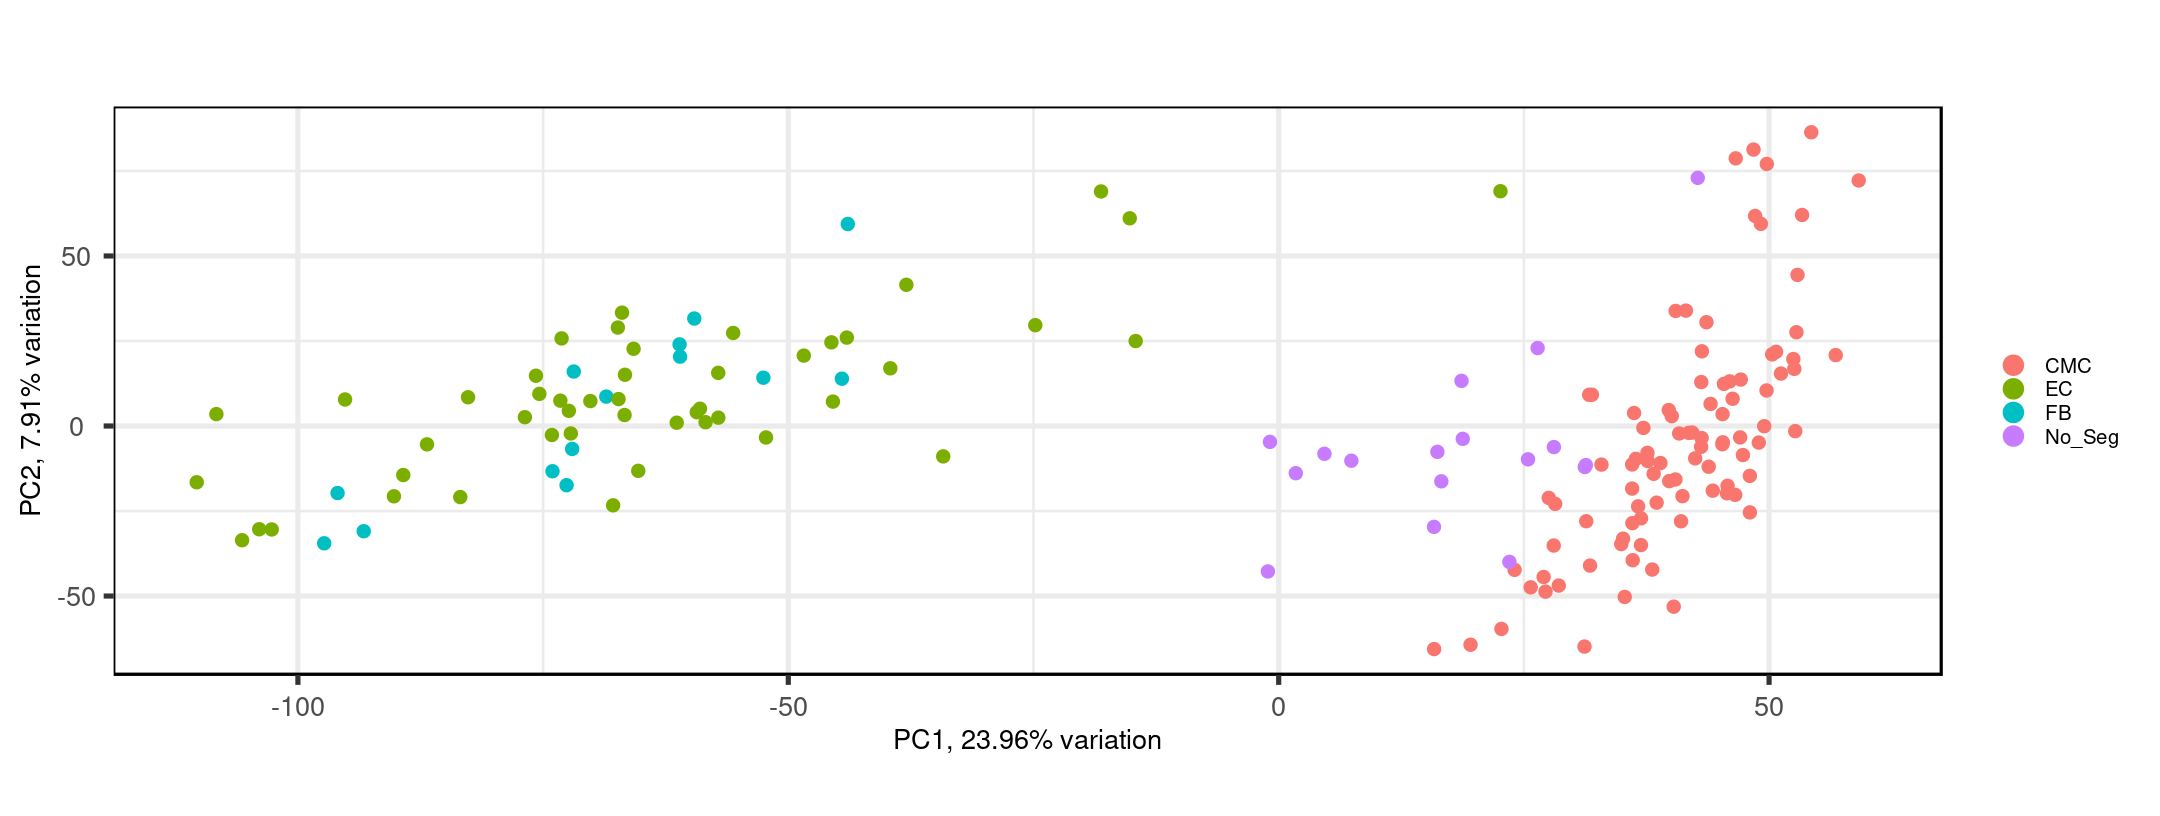

In [75]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="", 
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}



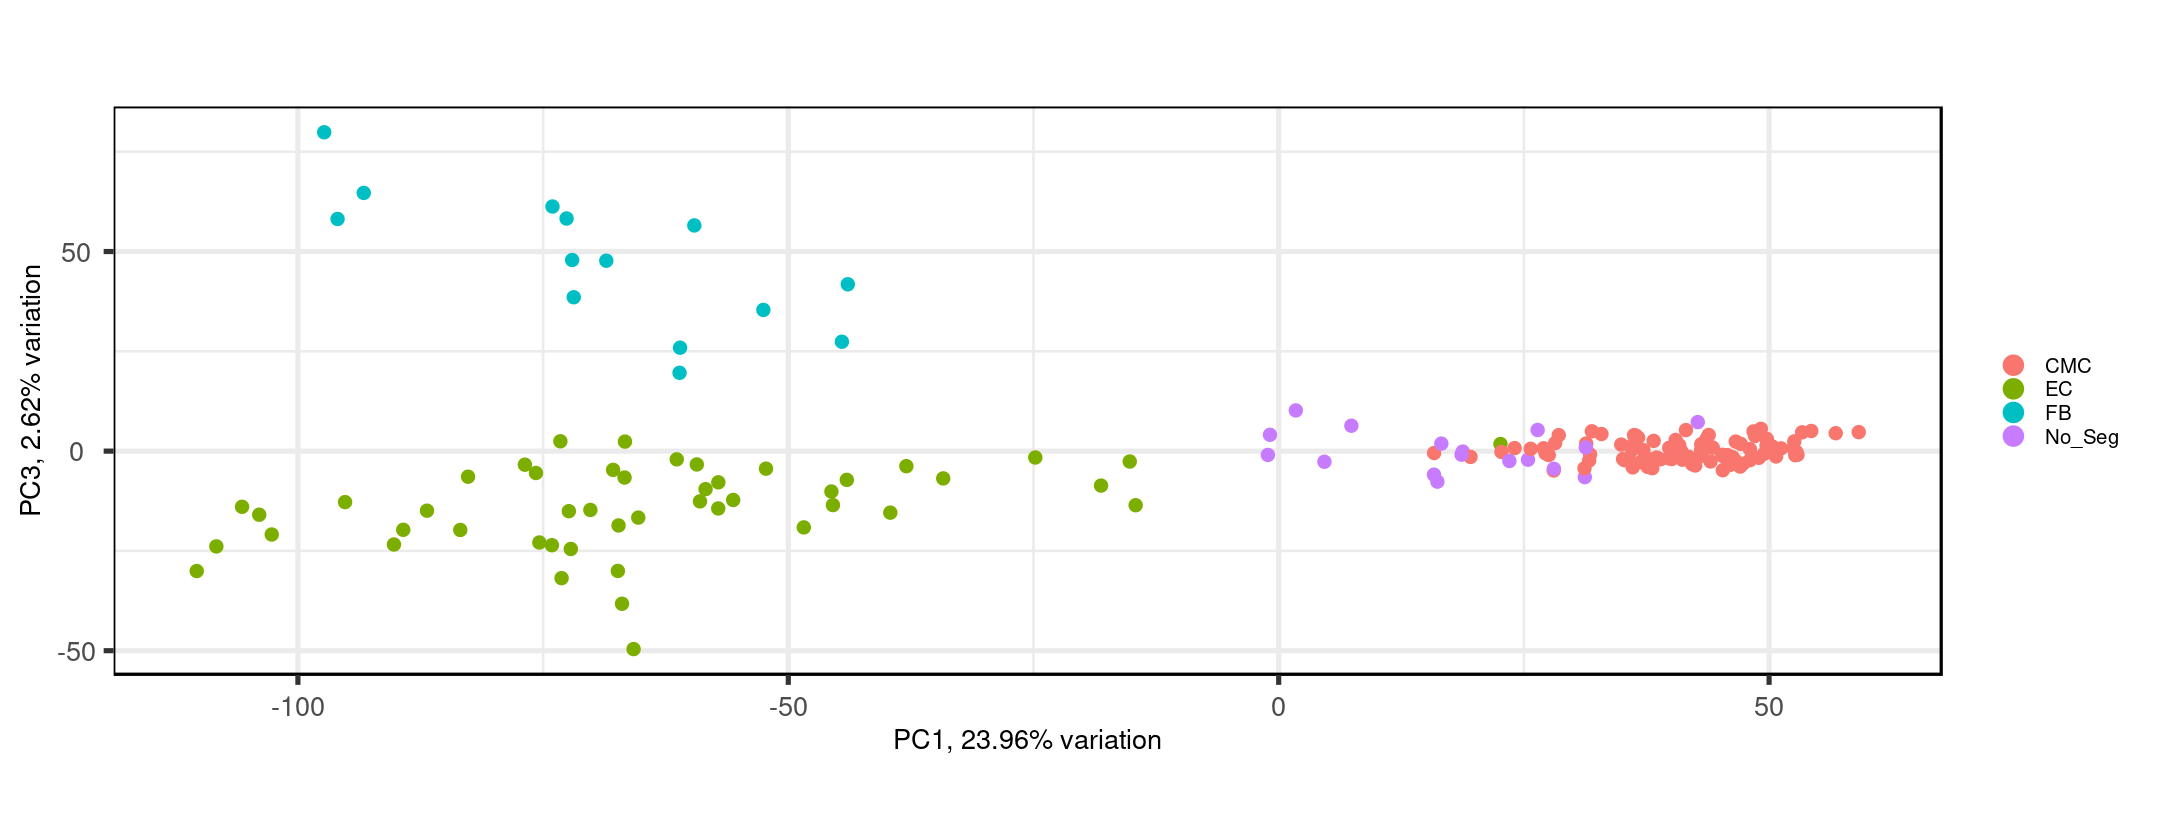

In [76]:
## PCA for cell types
par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="", 
                  x = "PC1", y = "PC3",
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replac

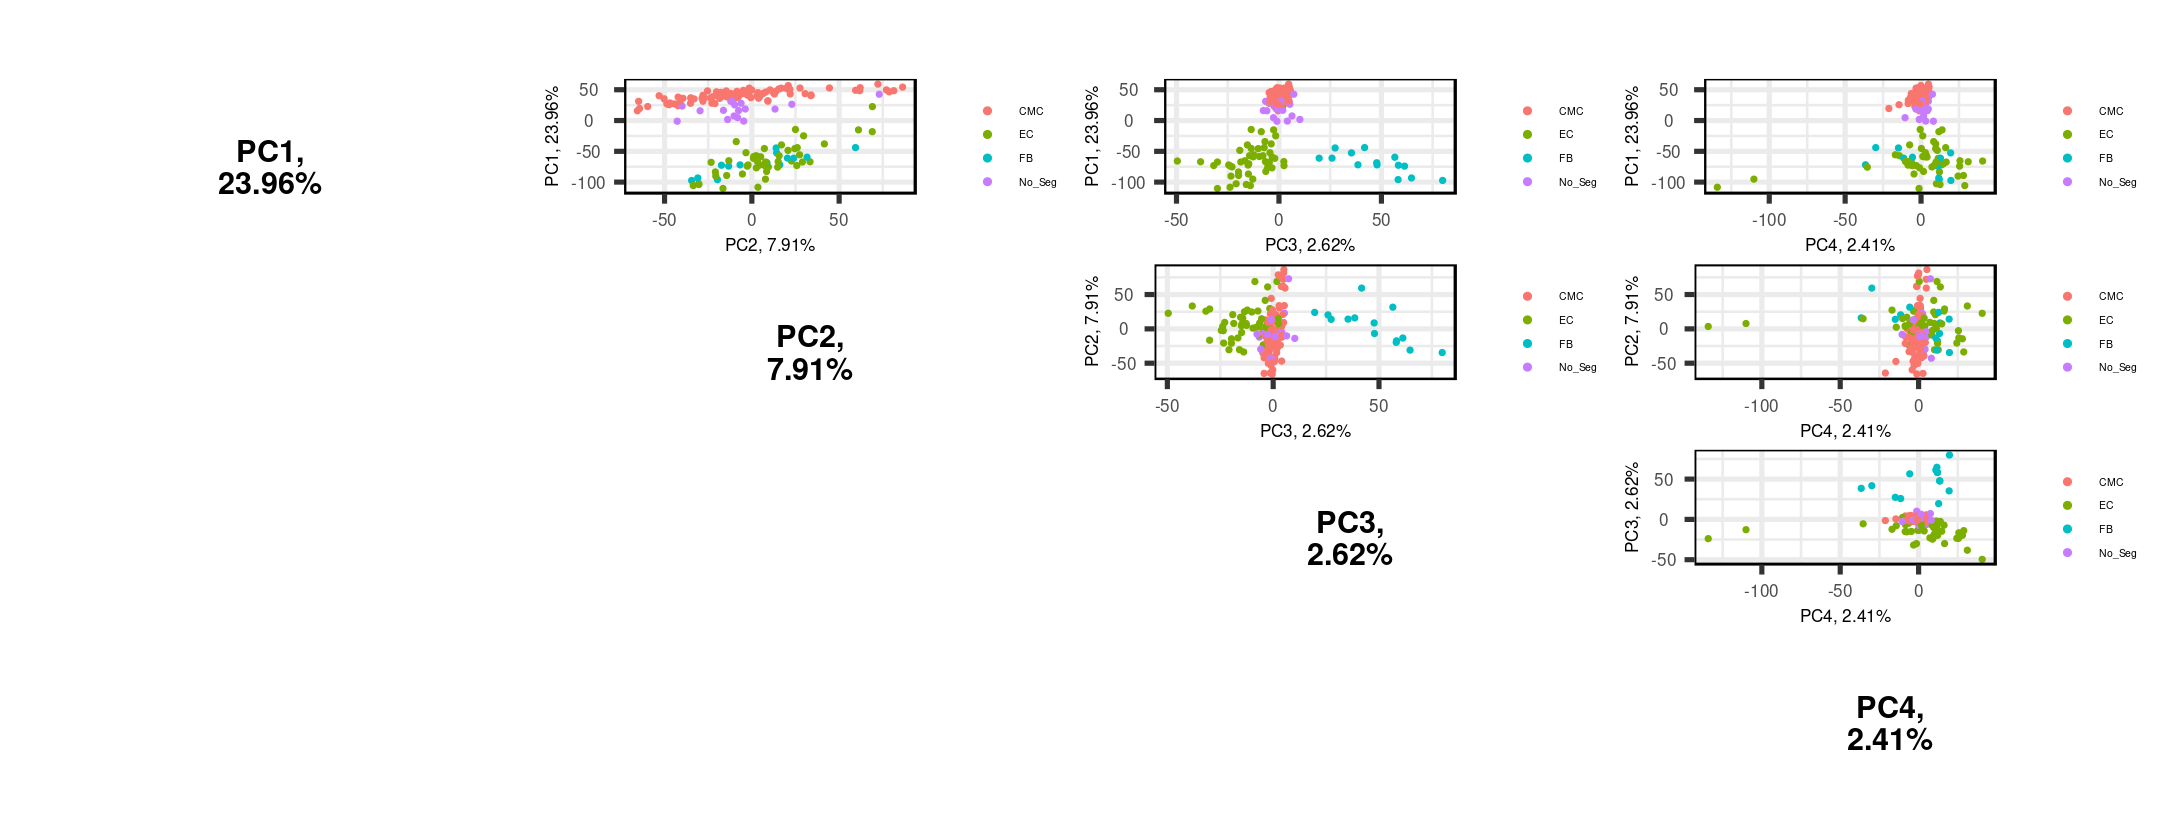

In [77]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- pairsplot(pca.list[[i]] 
           , components = getComponents(pca.list[[i]] , seq_len(4))
           , lab="", 
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

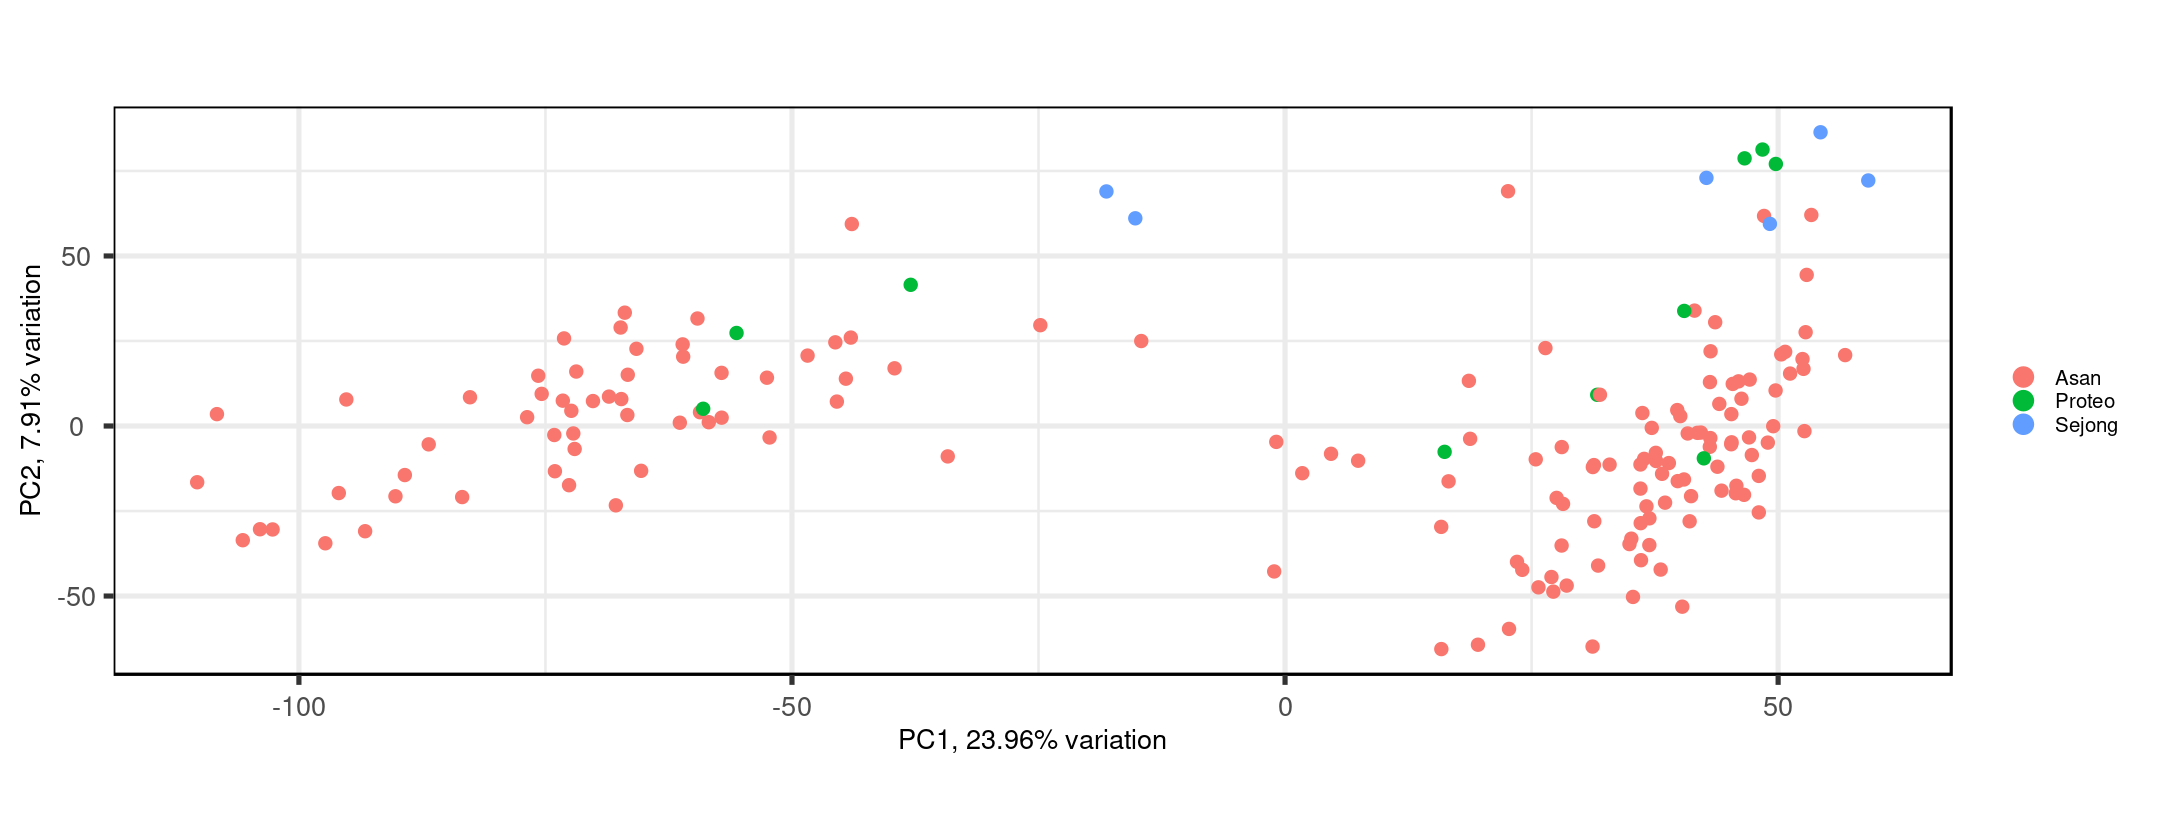

In [78]:
## PCA for Institute


for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="",
           colby = "Institute",
           legendPosition = "right",
                 # title=pca_title[i]
                 )
    print(fig)
}

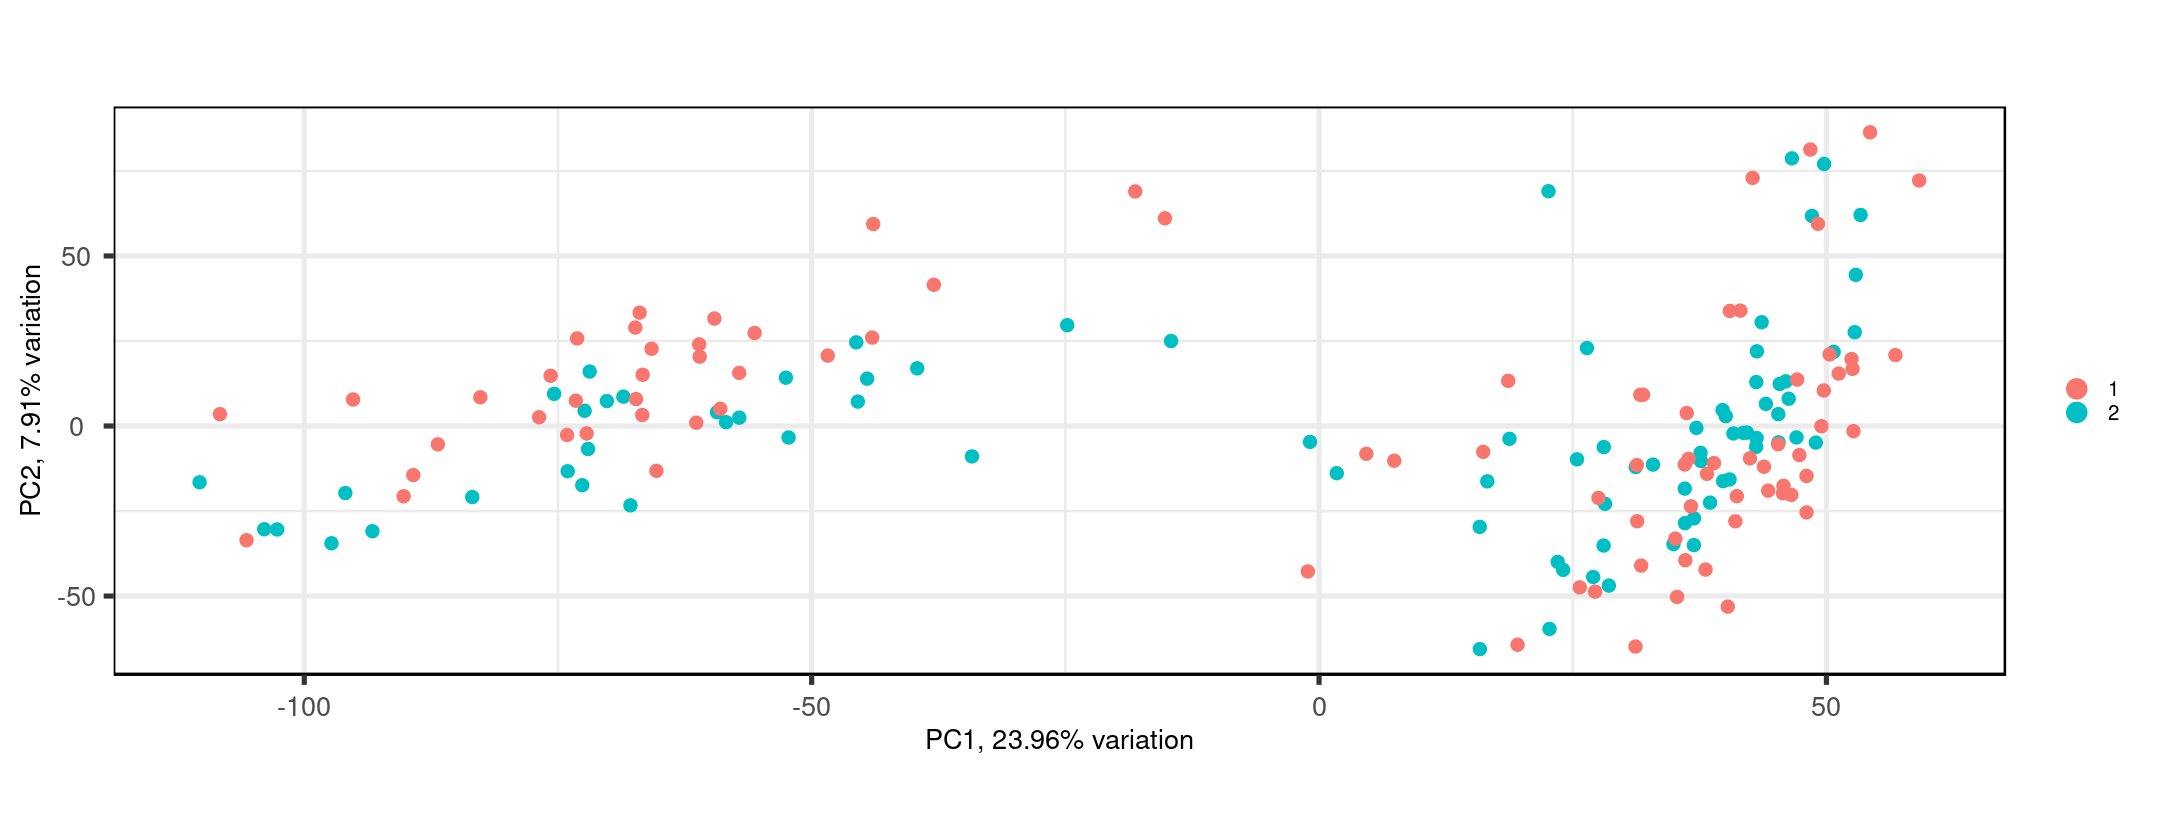

In [79]:
## PCA for blocks

for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="",
           colby = "TMA.block",
           legendPosition = "right",
                 # title=pca_title[i]
                 )
    print(fig)
}

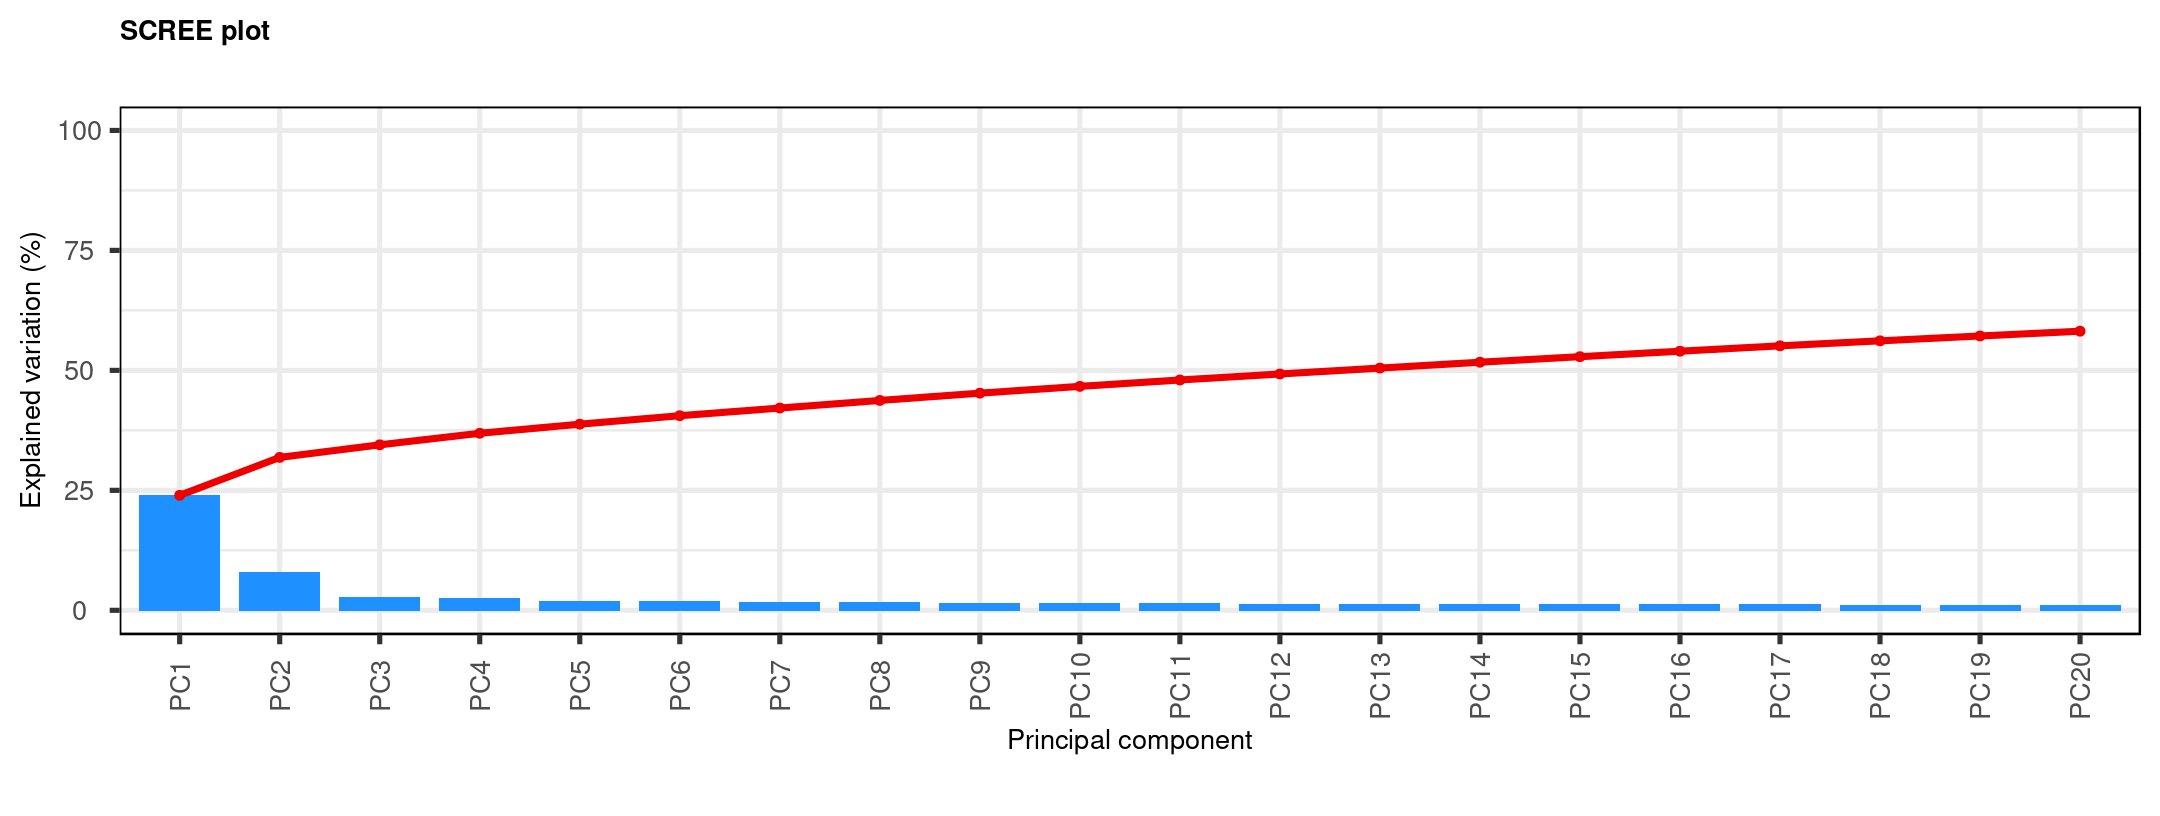

In [80]:
## Screeplot

for(i in 1:length(e.list)){
    fig <- screeplot(pca.list[[i]],
                     components = getComponents(pca.list[[i]], c(1:20)),
                 # title=pca_title[i]
                    )
    print(fig)
}

# OUTLIER

## Outlier removal according to PCA plot

In [81]:
pca2_tmp<-pca.list[[1]]$rotated[2]
pcaplot_outlier <-rownames(pca2_tmp)[pca2_tmp$PC2>(50)]

pcaplot_outlier

[1] "PR79_2_WTA...001...Trp"      "PR79_2_WTA...002...Trp"     
 [3] "PR79_2_WTA...012...vessel"   "PR79_2_WTA...038...Trp"     
 [5] "PR79_2_WTA...040...Trp"      "PR79_1_WTA...003...fb"      
 [7] "PR79_1_WTA...032...Trp"      "PR79_1_WTA...040...vessel"  
 [9] "PR79_1_WTA...040...Trp"      "PR79_1_WTA...041...vessel"  
[11] "PR79_1_WTA...041...Trp"      "PR79_1_WTA...042...Trp"     
[13] "PR79_1_WTA...056...Full.ROI"

In [82]:
dim(output_e3)

[1] 12800   170

In [83]:
Y4="output_p3"
Z4="output_e3"

if (grid_set == "N") {
    output_p4 = get(Y4)
    output_e4 = get(Z4)
    } else {
    if (grepl("pcaplot", outlier_set)==TRUE) {
        X4=outlier_set
        } else {
        grid_set = get(outlier_set)
        sp_gridflag <-names(grid_set$flag[grid_set$flag==FALSE])
        X4="sp_gridflag"
        }
    remove_sample(X4,Y4,Z4)
    output_p4 = get(paste(Y4, "_rm_", X4, sep=""))
    output_e4 = get(paste(Z4, "_rm_", X4, sep=""))
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p3_rm_pcaplot_outlier"
[1] "and the sample count in phenotype data is 157"
[1] "the file name of the expression data is output_e3_rm_pcaplot_outlier"
[1] "and the sample count in expression data is 157"


# FINAL DATA INPUT

In [84]:
d0 <- DGEList(output_e4)
m <- output_p4
e <- output_e4
f <- fdata_nodup
d0$genes <- f

### Add features of samples in "samples"

In [85]:
d0$samples$celltype <- m$celltype

PID <- as.factor(m$PID)
d0$samples$PID <- PID

condition <- as.factor(m[[COI]])
d0$samples$condition <- condition

### remove after confirmation

# Ds <- as.factor(m$Clinical_phenotype_2nd)
# d0$samples$Ds <- Ds

# levels(condition) <- c("Non_Endstage", "End_stage")
m <- cbind(m, condition)

### Add normalization factors

In [90]:
d1 <- calcNormFactors(d0, method="upperquartile")

# Heatmaps and PCA plot after all

## Heatmaps with lcpm

In [91]:
logcounts <- cpm(d1, log=TRUE)

In [92]:
# We estimate the variance for each row in the logcounts matrix
var_genes <- apply(logcounts, 1, var)
head(var_genes)

STPG4     DNMBP    STYXL2     KIF3C     CASC3      MIOS 
0.2679179 0.1417253 0.9535296 0.1596607 0.1179992 0.2192688

In [93]:
select_var <- names(sort(var_genes, decreasing=TRUE))[1:(length(var_genes)*0.05)]
head(select_var)

[1] "NPPA"   "NPPB"   "COL3A1" "ACTA1"  "MGP"    "CD74"

In [94]:
# Subset logcounts matrix
highly_variable_lcpm <- logcounts[select_var,]
dim(highly_variable_lcpm)

[1] 640 157

In [96]:
heatmap_complex <- function(arg_path){
#     # find gene ids
#     genesinpath = unname(unlist(pathways.h[arg_path]))[order(unname(unlist(pathways.h[arg_path])))]

#     # convert gene ids to symbols
#     symbolsinpath = unname(unlist(d1$genes[d1$genes$ENTREZID %in% genesinpath,][1]))

#     # subset logounts matrix
#     pw_variable_lcpm = logcounts[symbolsinpath,]
    
        # scale by row
    highly_variable_lcpm_scaled = t(scale(t(highly_variable_lcpm)))
   
    
    # Plot the heatmap
    ## Annotation
    ha = HeatmapAnnotation(
    Celltype = condition,
    # Disease = m$Clinical_phenotype_LV,
    # Institute = m$Institute,
    #     Degeneration = m$P_Deg_012,
    #     Hypertrophy = m$P_Hyp_012,
    #     Fibrosis = m$P_Fib_012,
    col = list(Celltype = c("CMC" = "chartreuse4", "EC" = "darkorange3", "No_Seg" = "purple", "FB" = "yellow2")
               # ,Disease = c("Control" = "white", "DCMP" = "green", "ICMP" = "orange", "ES_HCMP" = "blue", "NES_HCMP" = "coral4")
               # ,Degeneration = c("0" = "azure1", "1" = "azure2", "2" = "azure3")
               # ,Hypertrophy = c("0" = "cadetblue1", "1" = "cadetblue3", "2" = "cadetblue4")
               # ,Fibrosis = c("0" = "darkolivegreen1", "1" = "darkolivegreen2", "2" = "darkolivegreen4")
               # ,Institute = c("Asan" = "red", "Proteo" = "blue", "Sejong" = "yellow")
               )
    )
    Heatmap(highly_variable_lcpm_scaled, use_raster = TRUE, name="lcpm", top_annotation = ha
            ,column_dend_height = unit(1, "cm")
            # ,clustering_distance_columns = robust_dist           
            ,cluster_columns = agnes(t(highly_variable_lcpm_scaled), metric = "manhattan", method = "average")
            , show_column_names=FALSE
            , show_row_names=FALSE
           )
    
    }

            # colkey = c("chartreuse4", "darkorange3", "yellow2", "purple"),


In [97]:
options(repr.plot.width=9, repr.plot.height=3)
p_htmap <- heatmap_complex()

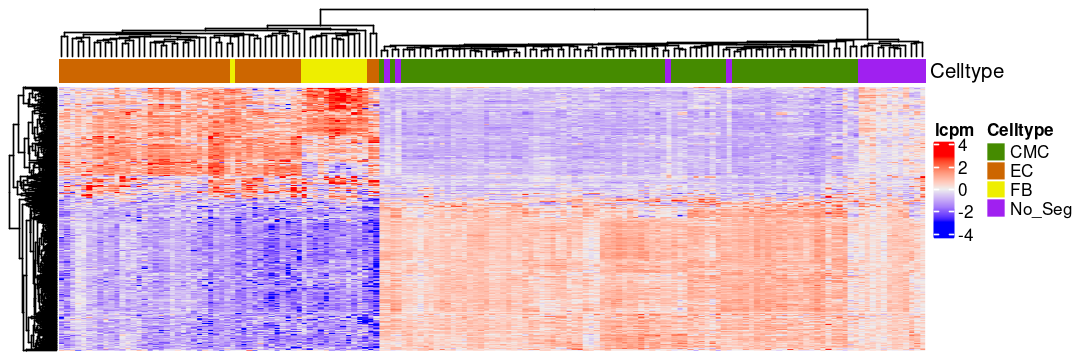

In [98]:
# Figure 2D
p_htmap

## PCA plots

In [99]:
if ("rrcov" %in% tolower((.packages())) == TRUE) {
    detach("package:rrcov", unload=TRUE)
    }


In [100]:
nonlogcounts <- cpm(d1, log=FALSE)

In [101]:
e.list_final <- list(nonlogcounts)

In [102]:
m <- m %>% mutate(BNP_pca = ifelse(is.na(BNP)==TRUE, min(m$BNP, na.rm=TRUE), BNP))

In [103]:
m <- m %>% mutate(Echo_pca = ifelse(is.na(Echo_LVEF)==TRUE, max(m$Echo_LVEF, na.rm=TRUE), Echo_LVEF))

In [104]:
m_pca <- m

In [105]:
names(m_pca)[grepl("BNP_pca", names(m_pca))] <- "BNP(pg/ml)"

In [106]:
names(m_pca)[grepl("Echo_pca", names(m_pca))] <- "LVEF(%)"
names(m_pca)[grepl("Clinical_phenotype_LV", names(m_pca))] <- "Clinical classification"
names(m_pca)[grepl("P_Normal", names(m_pca))] <- "Histologically normal"
names(m_pca)[grepl("P_Degeneration", names(m_pca))] <- "Histology-Degeneration"
names(m_pca)[grepl("P_Hypertrophy", names(m_pca))] <- "Histology-Hypertrophy"
names(m_pca)[grepl("P_Fibrosis", names(m_pca))] <- "Histology-Fibrosis"
names(m_pca)[grepl("P_Disarray", names(m_pca))] <- "Histology-Disarray"
names(m_pca)[grepl("Fixation.interval", names(m_pca))] <- "Fixation interval"
names(m_pca)[grepl("TMA.block", names(m_pca))] <- "TMA block"
names(m_pca)[grepl("celltype", names(m_pca))] <- "Cell-type"

In [107]:

pca.list_final <- lapply(e.list_final, function(x) pca(x, metadata=m_pca, removeVar = 0.1, scale = TRUE))
                         
                         

-- removing the lower 10% of variables based on variance



In [108]:
options(repr.plot.width=18, repr.plot.height=5)

## Figure 2A-B

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


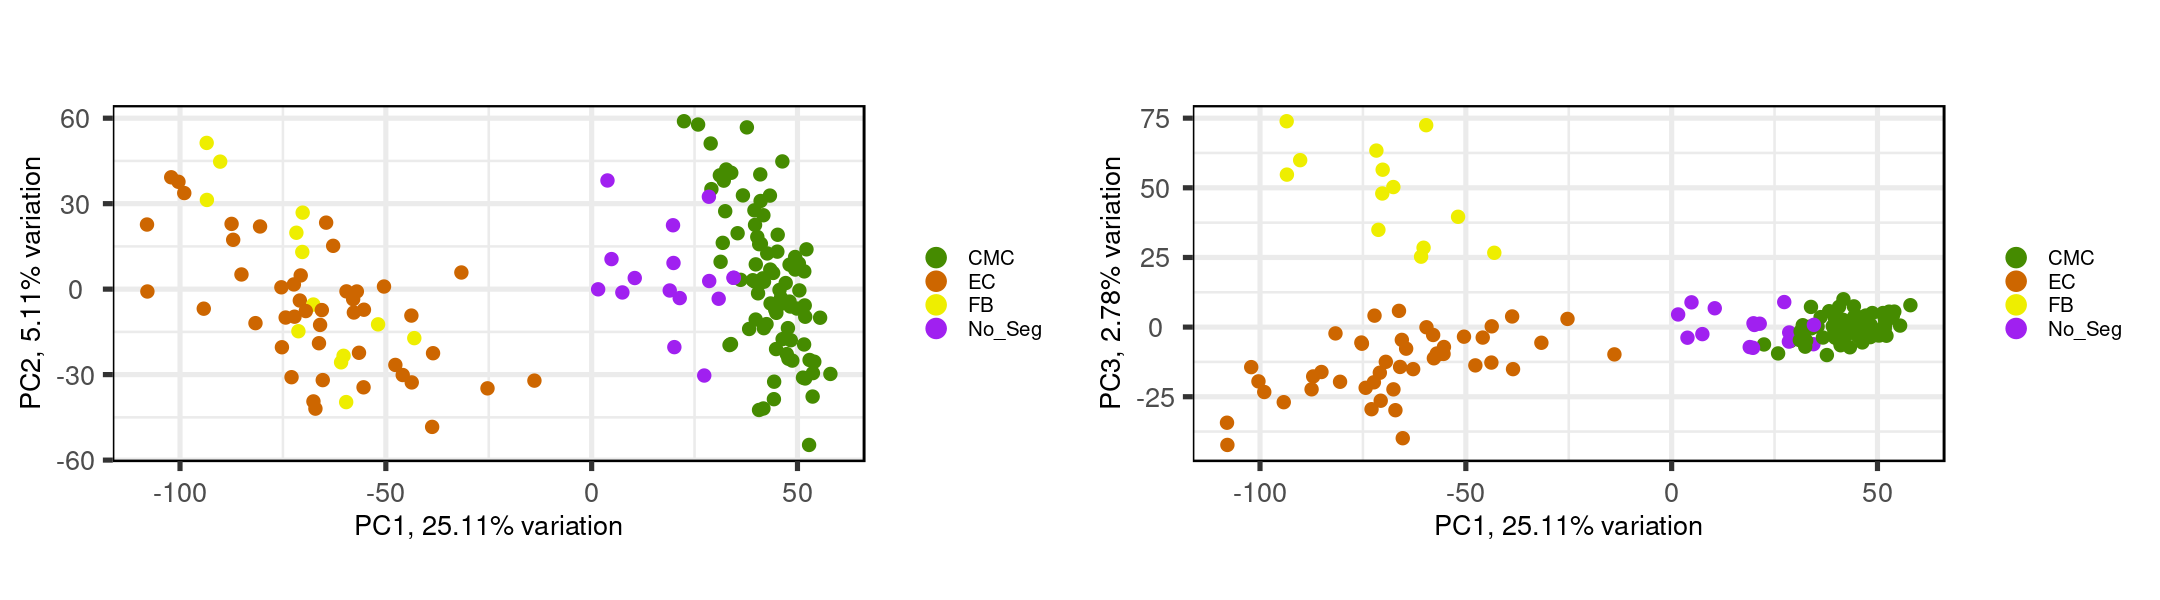

In [109]:
# Figure 2A-B
## PCA for cell types


b1<-biplot(pca.list_final[[1]], lab="", 
           colby ="Cell-type",
           colkey = c("chartreuse4", "darkorange3", "yellow2", "purple"),
           legendPosition = "right",
                 # title=pca_title[1]
                  #,shape="TMA.block"
                 )

b2<-biplot(pca.list_final[[1]], lab="", 
                  x = "PC1", y = "PC3",
           colby ="Cell-type",
            colkey = c("chartreuse4", "darkorange3", "yellow2", "purple"),
           legendPosition = "right",
                 # title=pca_title[1]
                  #,shape="TMA.block"
                 )
cowplot::plot_grid(b1, b2,  ncol=2)
    

## Scree plot

In [110]:
  horn <- parallelPCA(e.list_final[[1]])
  horn$n

[1] 1

In [111]:
  elbow <- findElbowPoint(pca.list_final[[1]]$variance)
  elbow

PC5 
  5

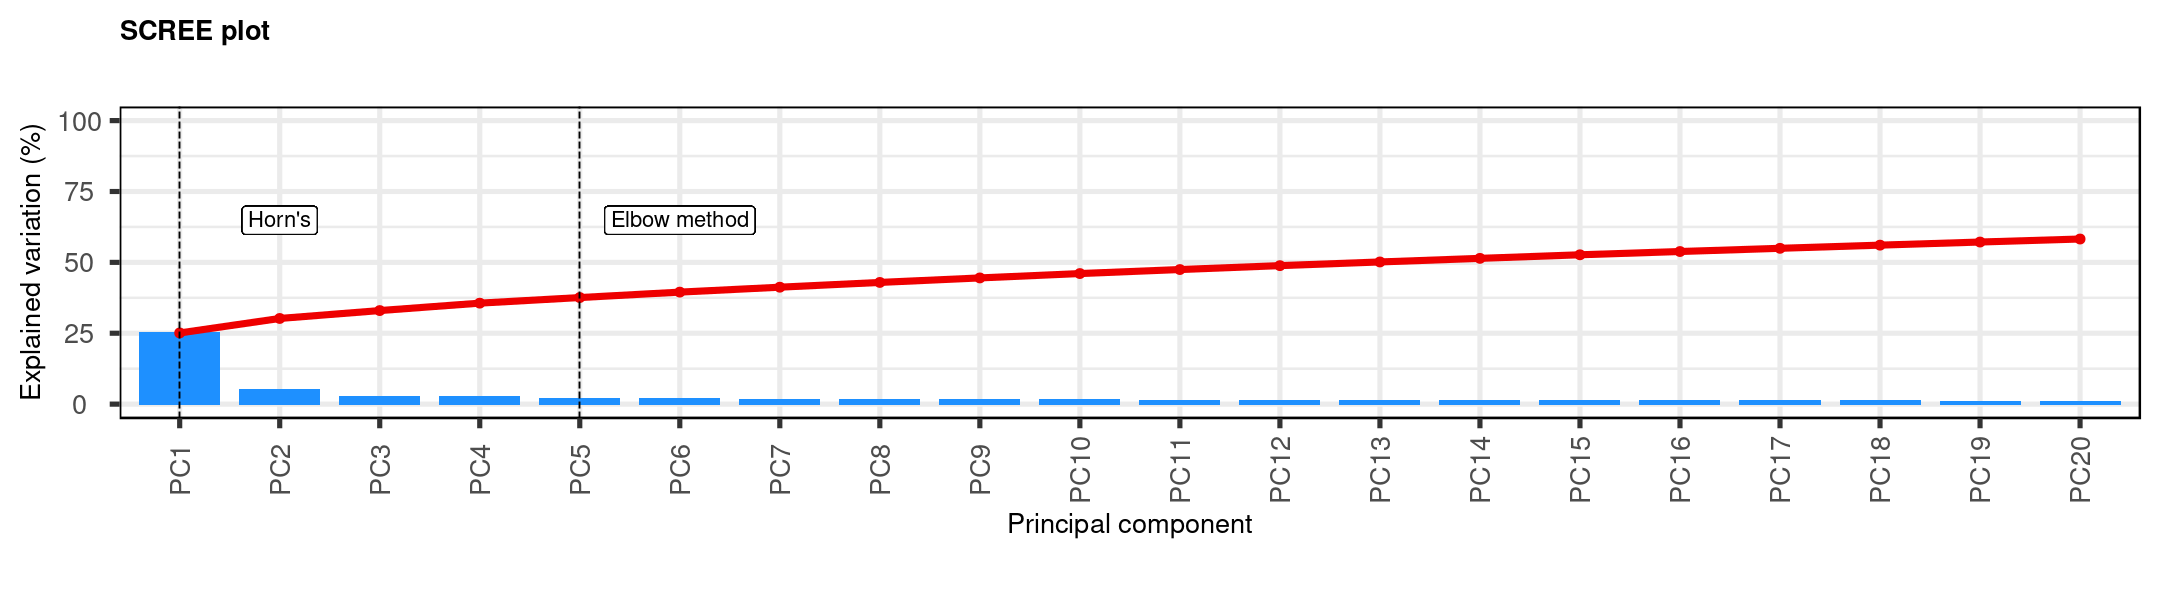

In [112]:
screeplot(pca.list_final[[1]],
    components = getComponents(pca.list_final[[1]], 1:20),
    vline = c(horn$n, elbow)) +

    geom_label(aes(x = horn$n + 1, y = 50,
      label = 'Horn\'s', vjust = -1, size = 8)) +
    geom_label(aes(x = elbow + 1, y = 50,
      label = 'Elbow method', vjust = -1, size = 8))

In [113]:
options(repr.plot.width=18, repr.plot.height=10)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replac

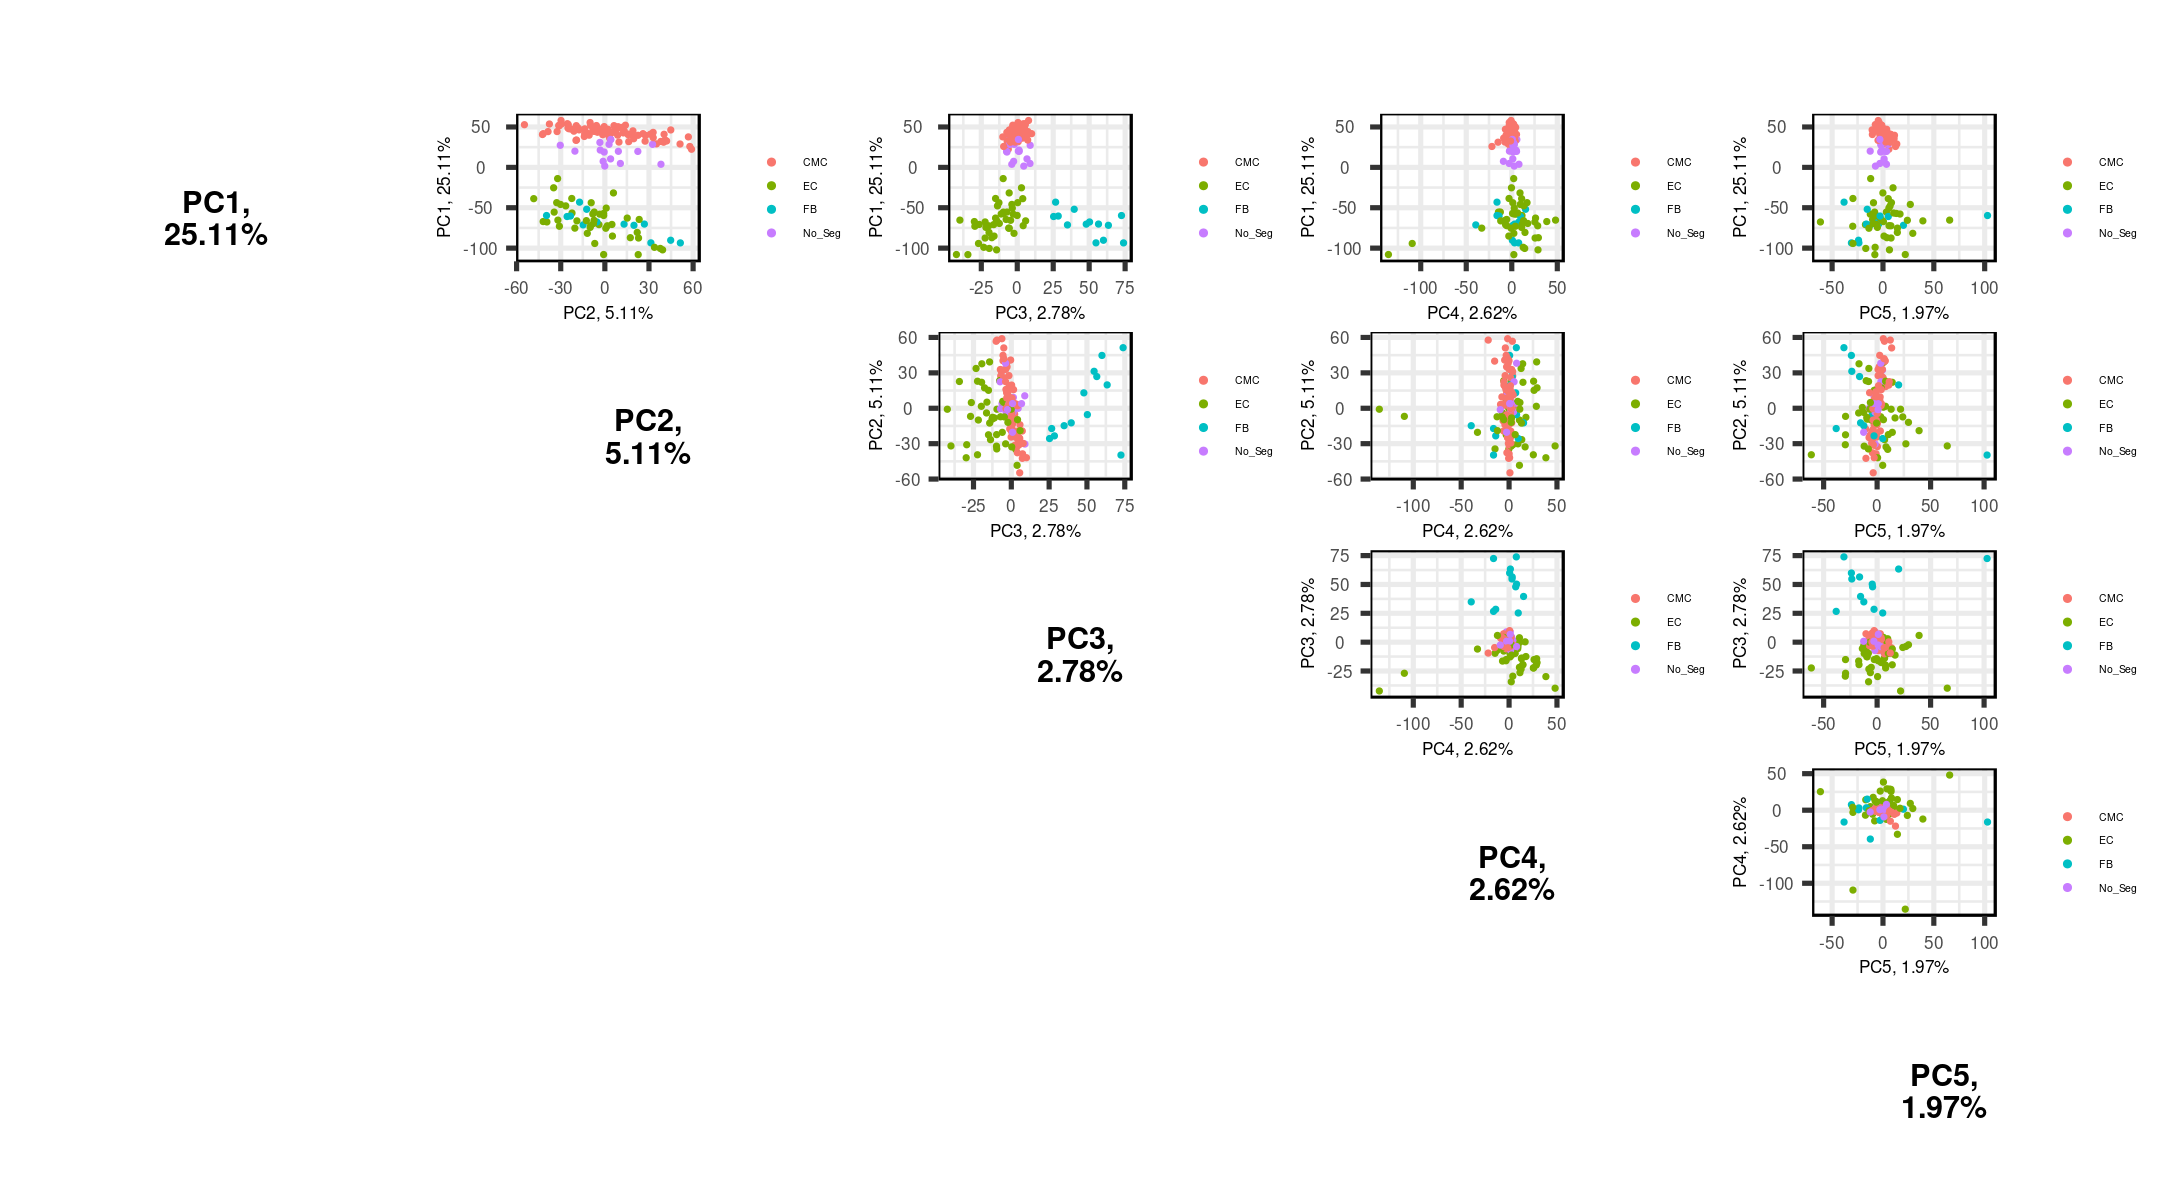

In [114]:

## PCA for cell types
for(i in 1:length(e.list_final)){
    fig <- pairsplot(pca.list_final[[i]] 
           , components = getComponents(pca.list_final[[i]] , seq_len(5))
           , lab="", 
           colby ="Cell-type",
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

## Figure 2F-G, Loadingplot 

In [115]:
options(repr.plot.width=18, repr.plot.height=8)

-- variables retained:

MYL2, MB, CRYAB, TNNI3, MYH7, TCAP, DES, TPM1, ACTC1, MYL3, TNNT2, TNNC1, HSPB7, TTN, CKM, PDE4DIP, FABP3, ZC2HC1C, PLN, LDB3, ALDOA, LDHB, ACTN2, ATP5F1B, COX6A2, S100A1, CASQ2, MYBPC3, LMOD2, NRAP, SORBS2, MDH1, SLC8A1, SLC25A4, BSG, CMYA5, ATP5F1A, CHCHD10, MYOZ2, UQCRB, COX7A1, HRC, NEBL, MYOM1, UQCRQ, NDUFA1, ATP5MC3, COX8A, UQCRHL, COX5B, TECRL, HSPB8, SMPX, LPL, COX4I1, RYR2, SORBS1, MGST3, MYZAP, CKMT2, ATP5PF, HHATL, PDLIM5, COX6C, MYOM2, NDUFA4, ATP5ME, NEXN, ENO3, SELENOW, ASAH1, HADHB, ATP5PO, COX5A, ATP5IF1, ZNF106, UQCR11, TRDN, ATP5F1C, COX7B, TPI1, COX7C, CDH2, IDH2, SLC25A3, PAM, COX6B1, UQCRC1, SMYD2, MDH2, SYNM, NDUFB1, ATP5MK, MPC1, ACO2, ISCU, CSRP3, GOT1, SLMAP, PFKM, NDUFB4, ADPRHL1, PPM1K, SVIL, ATP5MG, POPDC2, NDUFB2, FXYD1, PKP2, AK1, SDHA, CYCS, DSP, ATP5MJ, POLR2L, EIF1B, NDUFB10, TNNT1, ATP5MF, GOT2, NDUFAB1, SMYD1, ACAT1, NDUFS5, PNPLA2, ATP1B1, MFN2, EEF1A2, ATP5PD, ATP1A3, MYOM3, COX7A2, NDUFA13, SDHB, NDUFB9, UNC45B, SRL, ABLIM1,

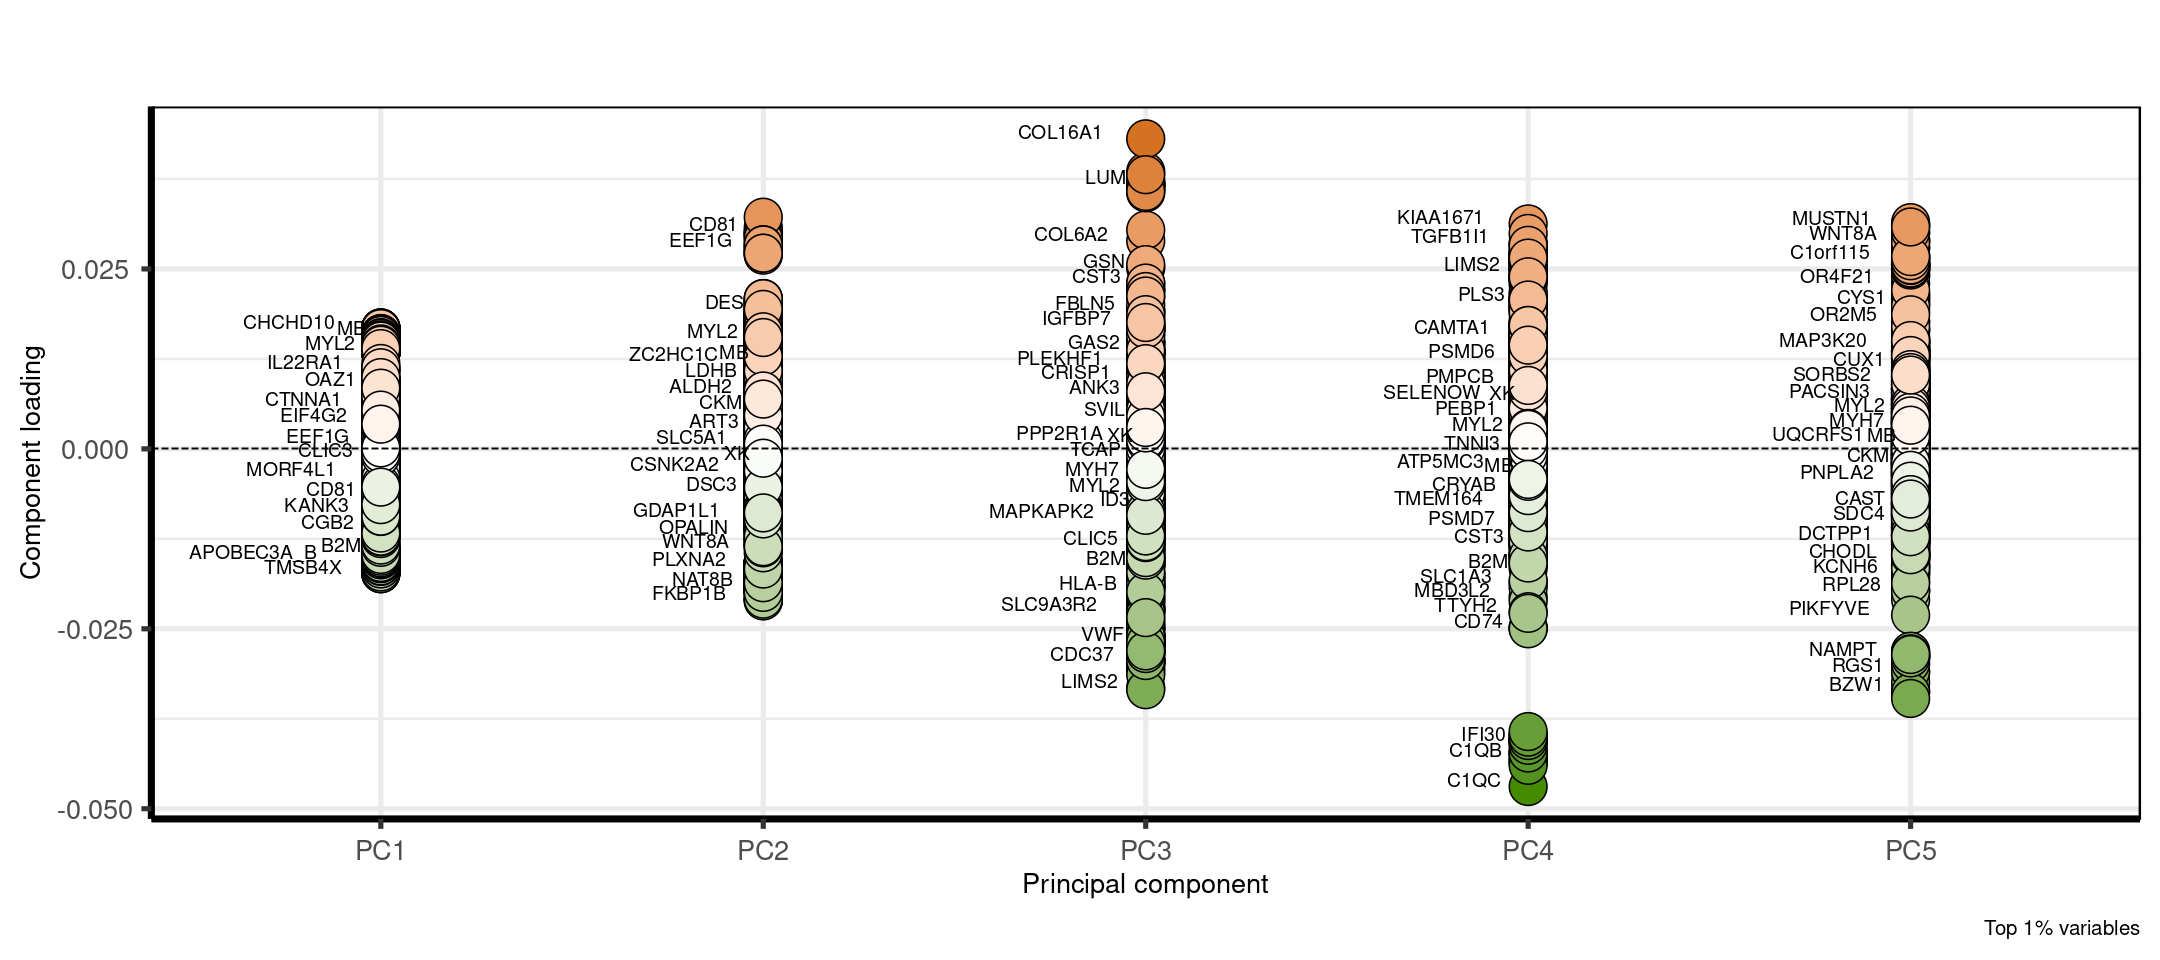

In [116]:
for(i in 1:length(e.list_final)){
    fig <- plotloadings(pca.list_final[[i]],
                     components = getComponents(pca.list_final[[i]], c(1:5)),
                        rangeRetain=0.1, labSize = 4.0, absolute = FALSE, 
                        caption = 'Top 1% variables', 
                        shape = 21, 
                        drawConnectors = FALSE,
                        col = c("chartreuse4", "white", "darkorange3")
                       ,legendPosition = "none"
                       )
                 # title=paste("Loadings plot", pca_title[i]))
    print(fig)
}

In [117]:
pca.sample <- pca.list_final[[1]]

In [118]:
pc1_loadingorder <- pca.sample$loadings[order(pca.sample$loadings[1], decreasing=TRUE),][1]

In [119]:
options(repr.plot.width=18, repr.plot.height=3)

In [120]:
squish_trans <- function(from, to, factor) {
  
  trans <- function(x) {
    
    if (any(is.na(x))) return(x)

    # get indices for the relevant regions
    isq <- x > from & x < to
    ito <- x >= to
    
    # apply transformation
    x[isq] <- from + (x[isq] - from)/factor
    x[ito] <- from + (to - from)/factor + (x[ito] - to)
    
    return(x)
  }

  inv <- function(x) {
    
    if (any(is.na(x))) return(x)

    # get indices for the relevant regions
    isq <- x > from & x < from + (to - from)/factor
    ito <- x >= from + (to - from)/factor
    
    # apply transformation
    x[isq] <- from + (x[isq] - from) * factor
    x[ito] <- to + (x[ito] - (from + (to - from)/factor))
    
    return(x)
  }
  
  # return the transformation
  return(trans_new("squished", trans, inv))
}


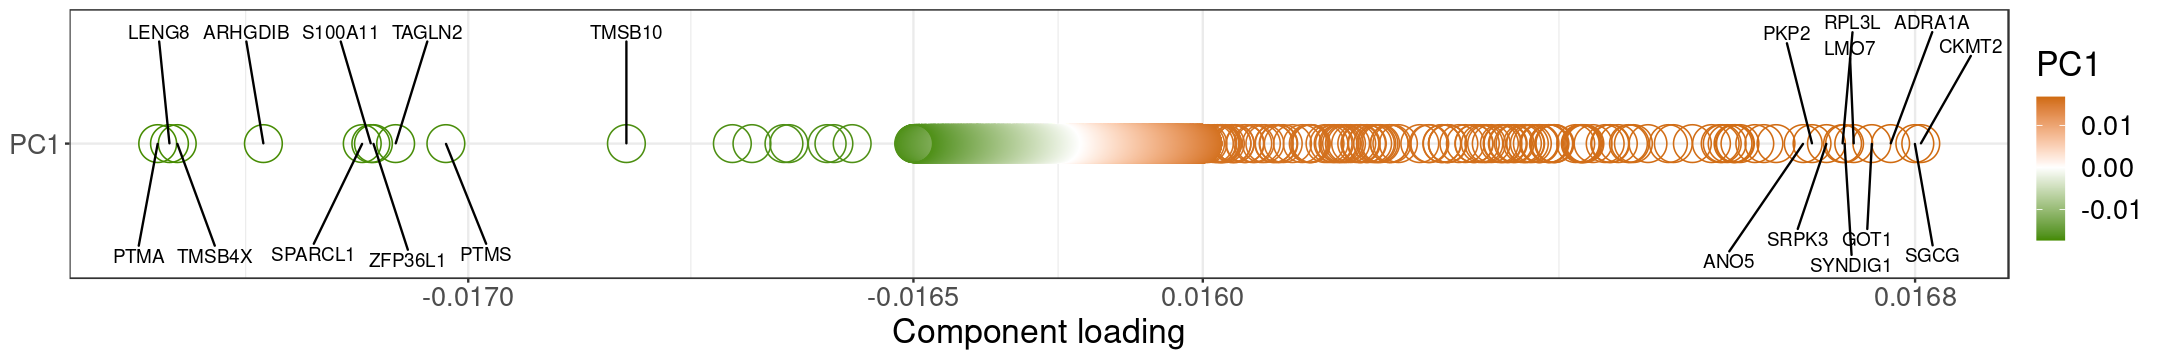

In [121]:
p1 <- pc1_loadingorder %>%
ggplot(mapping=aes(x=PC1, y=colnames(pc1_loadingorder), label=ifelse(PC1<(-0.0168)|PC1>0.01665,rownames(pc1_loadingorder), ""))) + 
geom_point(aes(col = PC1), shape = 1, size = 10) + scale_color_gradient2(low = "chartreuse4", mid = "white",high = "darkorange3", midpoint = 0) +
       theme_bw()  
#+ 
       # coord_cartesian(ylim = c(-1,3), xlim = c(-0.02,0.02)) 

p1 + scale_x_continuous(trans=squish_trans(-0.0165, 0.0160, 100), breaks = c(-0.0170, -0.0165, 0.0160, 0.0168)) +
       geom_text_repel(nudge_y=c(0.5, -0.5)) + theme(text = element_text(size=20), axis.title.y = element_blank()) + xlab("Component loading") 


In [122]:
options(repr.plot.width=3, repr.plot.height=10)

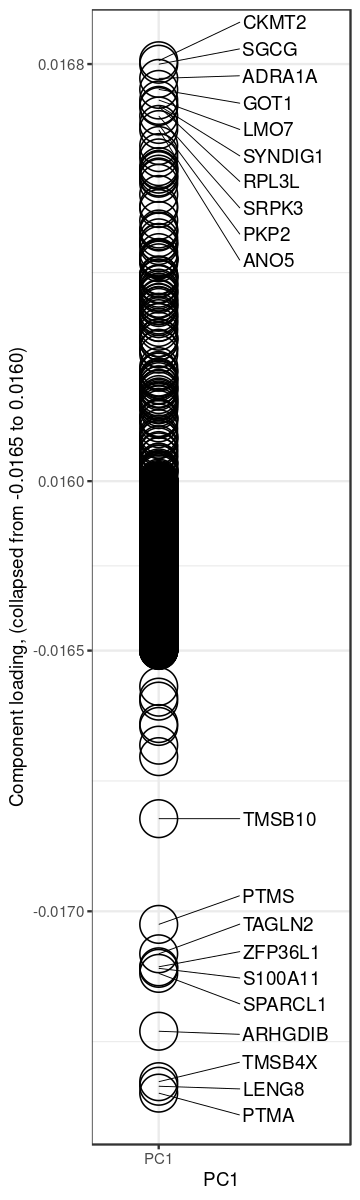

In [123]:
p1 <- pc1_loadingorder %>%
ggplot(mapping=aes(y=PC1, x=colnames(pc1_loadingorder), label=ifelse(PC1<(-0.0168)|PC1>0.01665,rownames(pc1_loadingorder), ""))) +
geom_point(shape = 21, size = 10) + 
       theme_bw() + 
       coord_cartesian(xlim = c(0,5)) 

p1 + scale_y_continuous(trans=squish_trans(-0.0165, 0.0160, 100), breaks = c(-0.0170, -0.0165, 0.0160, 0.0168)) +
  geom_text_repel(
    force        = 0.5,
    nudge_x      = 2,
    direction    = "y",
    hjust        = 0,
    segment.size = 0.2
  ) + ylab("Component loading, (collapsed from -0.0165 to 0.0160)") + xlab("PC1")

In [124]:
loadingtable <-pca.sample$loadings[order(pca.sample$loadings[1], decreasing=TRUE),]

## Supplemental Table1

In [125]:
write.csv(loadingtable, file.path(getwd(), "tables", paste("Final_Supplemental_Table1_PCA", "loading_table", Sys.Date(), ".csv", sep="_")))

## Figure 2C - Correlation between PC and clinical

In [5]:
options(repr.plot.width=18, repr.plot.height=7)

In [127]:
names(m_pca)[grepl("Echo_pca", names(m_pca))] <- "LVEF(%)"
names(m_pca)[grepl("Clinical_phenotype_LV", names(m_pca))] <- "Clinical classification"
names(m_pca)[grepl("P_Normal", names(m_pca))] <- "Histologically normal"
names(m_pca)[grepl("P_Degeneration", names(m_pca))] <- "Histology-Degeneration"
names(m_pca)[grepl("P_Hypertrophy", names(m_pca))] <- "Histology-Hypertrophy"
names(m_pca)[grepl("P_Fibrosis", names(m_pca))] <- "Histology-Fibrosis"
names(m_pca)[grepl("P_Disarray", names(m_pca))] <- "Histology-Disarray"
names(m_pca)[grepl("Fixation.interval", names(m_pca))] <- "Fixation interval"
names(m_pca)[grepl("TMA.block", names(m_pca))] <- "TMA block"
names(m_pca)[grepl("celltype", names(m_pca))] <- "Cell-type"

Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Gender is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“TMA block is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Ventricle is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Cell-type is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Clinical classification is not numeric - please check the source data as non-numeric variables will be coerced to numeric”


[1] "TMA block"
[1] "Ventricle"
[1] "Gender"
[1] "Clinical classification"
[1] "Cell-type"


Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

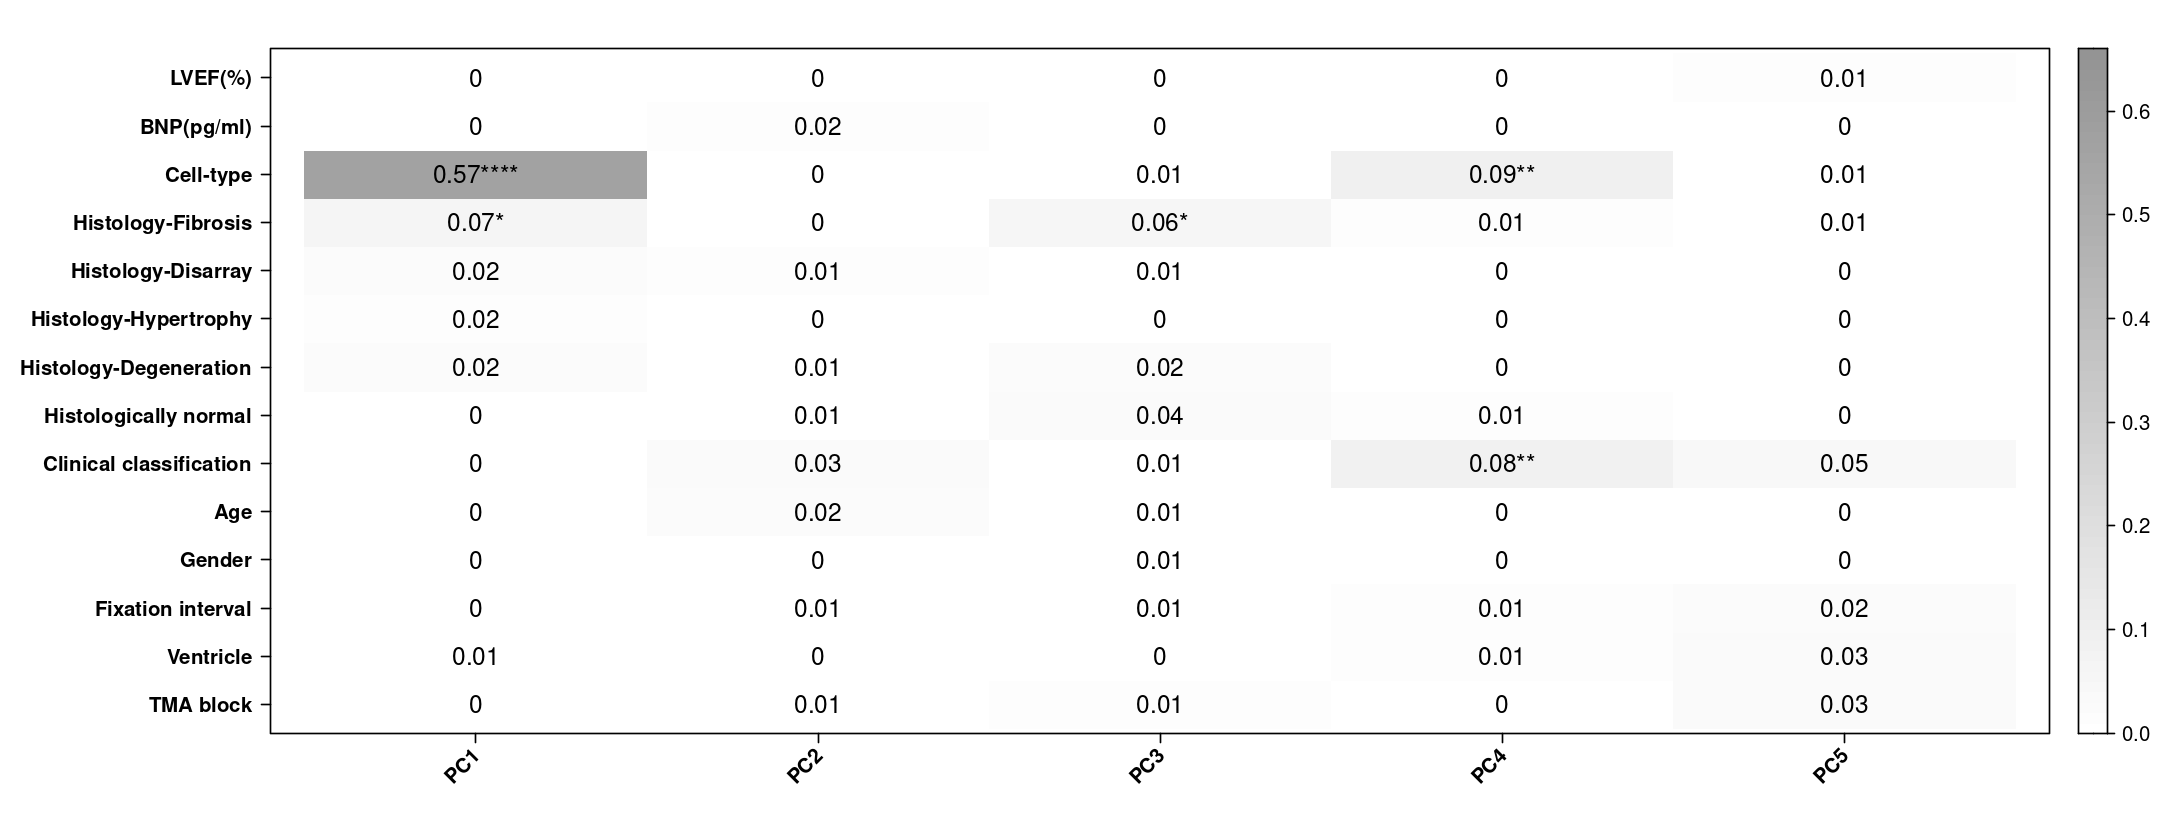

In [128]:
# Set the size of the main title
par(cex.main = 0.5)

eigencorplot(pca.sample,
    components = getComponents(pca.sample, 1:elbow),
    metavars = c('Gender','Age'
                 ,'Fixation interval','TMA block'
                 # , 'ROI.size'
                 # ,'Institute'
                 ,'Ventricle'
                 ,'Cell-type'
                 ,'Clinical classification' #, 'Clinical_phenotype_bi', 'Clinical_phenotype_tri'
                 ,'Histologically normal', 'Histology-Degeneration', 'Histology-Hypertrophy', 'Histology-Disarray', 'Histology-Fibrosis'
                 , 'LVEF(%)', 'BNP(pg/ml)'
                ),
    col = c('white', 'grey58'),
    cexCorval = 1.2,
    fontCorval = 1,
    posLab = "bottomleft", # determine x-, y- axis label location "all"
    rotLabX = 45,
    scale = TRUE,
    main = "",  # Empty main argument
    # main = bquote(Principal ~ component ~ Spearman ~ ρ ~ clinical ~ correlates),
    # cexMain = 1.5,            #' @param cexMain Plot title cex.
    #                         #' @param rotMain Plot title rotation in degrees.
    #                         #' @param colMain Plot title colour.
    # fontMain = 1,           #' @param fontMain Plot title font style. 1, plain; 2, bold; 3, italic; 4,
    #                         #'   bold-italic.

    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH',
    signifSymbols = c('****', '***', '**', '*', ''),
    signifCutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1))



Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Gender is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“TMA block is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Ventricle is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Cell-type is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(pca.sample, components = getComponents(pca.sample, :
“Clinical classification is not numeric - please check the source data as non-numeric variables will be coerced to numeric”


[1] "TMA block"
[1] "Ventricle"
[1] "Gender"
[1] "Clinical classification"
[1] "Cell-type"


Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

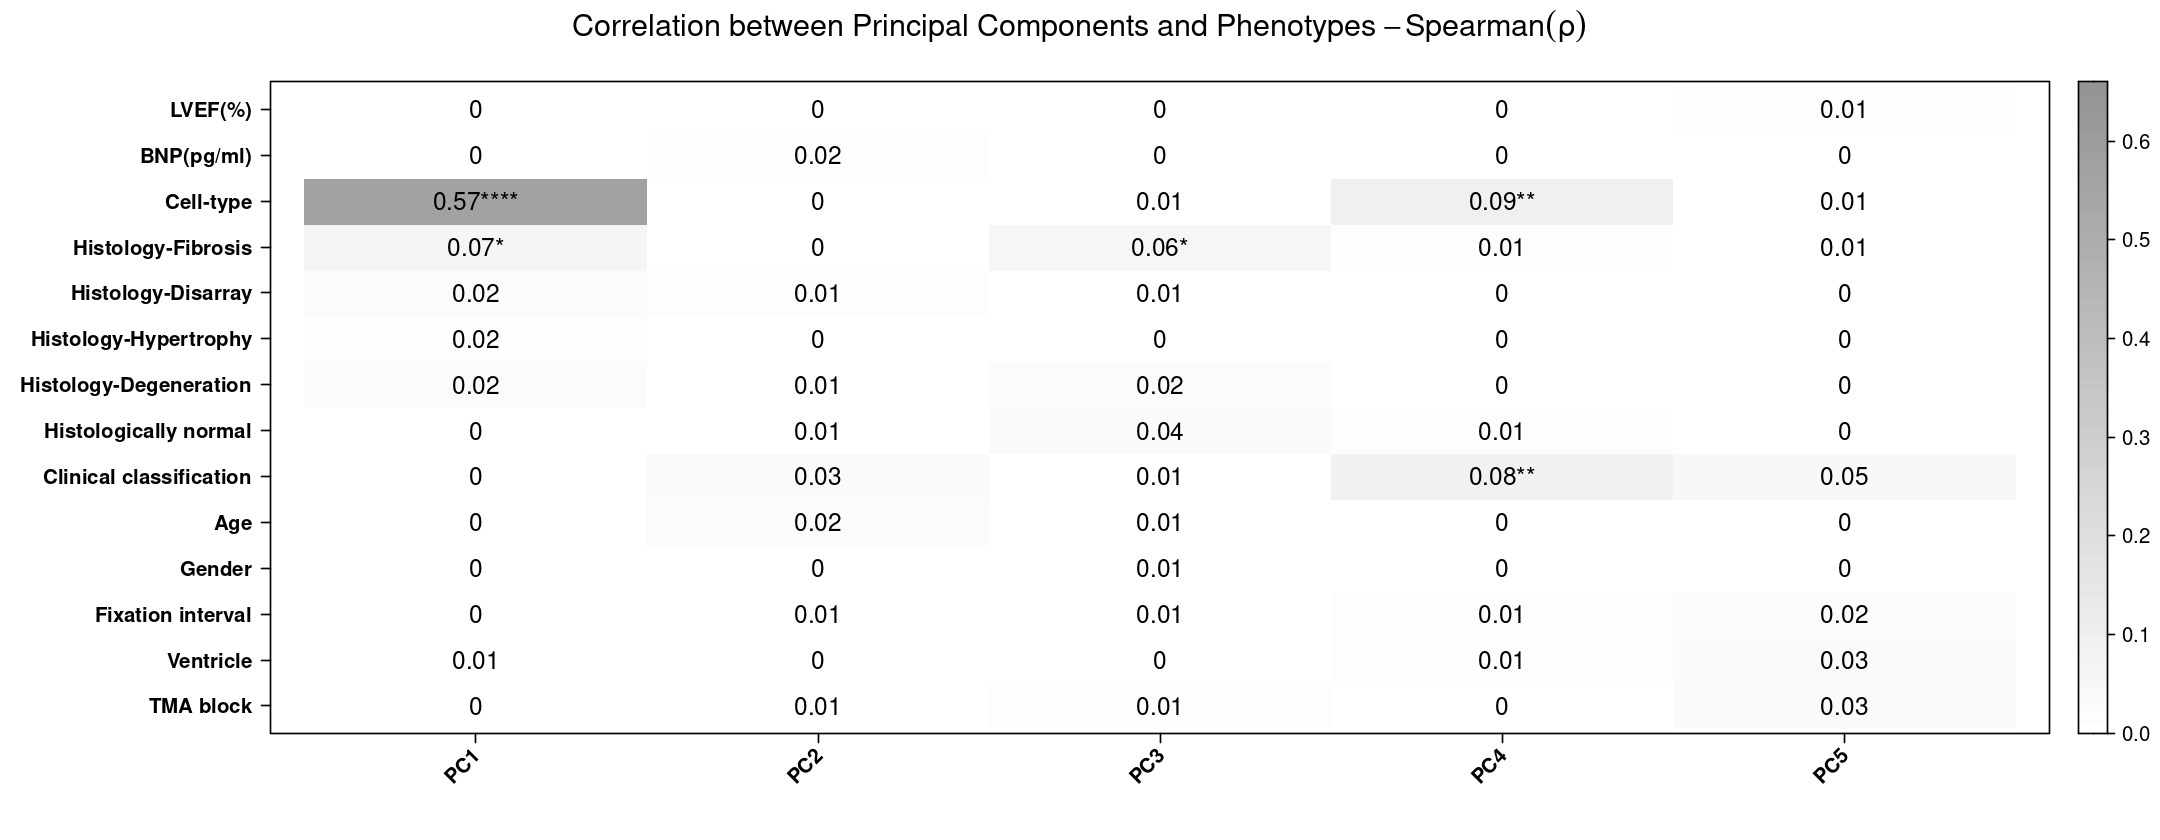

In [15]:
# Set the size of the main title
par(cex.main = 0.5)

eigencorplot(pca.sample,
    components = getComponents(pca.sample, 1:elbow),
    metavars = c('Gender','Age'
                 ,'Fixation interval','TMA block'
                 # , 'ROI.size'
                 # ,'Institute'
                 ,'Ventricle'
                 ,'Cell-type'
                 ,'Clinical classification' #, 'Clinical_phenotype_bi', 'Clinical_phenotype_tri'
                 ,'Histologically normal', 'Histology-Degeneration', 'Histology-Hypertrophy', 'Histology-Disarray', 'Histology-Fibrosis'
                 , 'LVEF(%)', 'BNP(pg/ml)'
                ),
    col = c('white', 'grey58'),
    cexCorval = 1.2,
    fontCorval = 1,
    posLab = "bottomleft", # determine x-, y- axis label location "all"
    rotLabX = 45,
    scale = TRUE,
    # main = "",  # Empty main argument
    main = bquote(Correlation ~ between ~ Principal ~ Components ~ and ~ Phenotypes ~ - Spearman (ρ) ),
    cexMain = 1.5,            #' @param cexMain Plot title cex.
                            #' @param rotMain Plot title rotation in degrees.
                            #' @param colMain Plot title colour.
    fontMain = 1,           #' @param fontMain Plot title font style. 1, plain; 2, bold; 3, italic; 4,
                            #'   bold-italic.

    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH',
    signifSymbols = c('****', '***', '**', '*', ''),
    signifCutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1))



## GSEA with PC1

#### pca with ENTREZID for gene set analysis

In [129]:
nonlogcounts <- cpm(d1, log=FALSE)

In [130]:
head(nonlogcounts)

PR79_2_WTA...001...vessel PR79_2_WTA...003...Trp
STPG4  24.329135                  64.05017             
DNMBP  40.548559                  50.64432             
STYXL2 64.877694                 167.57313             
KIF3C   8.109712                  41.70709             
CASC3  81.097118                  43.19663             
MIOS   64.877694                  53.62340             
       PR79_2_WTA...004...Full.ROI PR79_2_WTA...005...vessel
STPG4   39.55806                   41.70709                 
DNMBP   57.38704                   31.28032                 
STYXL2 158.23224                   62.56063                 
KIF3C   49.02971                   57.34725                 
CASC3   56.82989                   46.92048                 
MIOS    39.55806                   20.85354                 
       PR79_2_WTA...005...Trp PR79_2_WTA...006...Trp PR79_2_WTA...007...Trp
STPG4   64.37653              64.92250                53.52410             
DNMBP   53.71545              63.71276                55.76986             
STYXL2 154.99573              98.39186               169.18106             
KIF3C   54.12549              60.08356                43.41815             
CASC3   47.15478              39.51804                43.79244             
MIOS    36.90374              48.38944                41.92097             
       PR79_2_WTA...008...Trp PR79_2_WTA...009...Trp PR79_2_WTA...010...vessel
STPG4   56.10596               44.44283               48.65827                
DNMBP   49.65130               45.52680               57.78170                
STYXL2 134.05850              213.90368              115.56339                
KIF3C   56.60248               45.16547               38.01427                
CASC3   49.65130               55.64386               76.02855                
MIOS    43.69314               43.35885               41.05542                
       ⋯ PR79_1_WTA...048...Trp PR79_1_WTA...049...vessel
STPG4  ⋯  44.06787              48.65827                 
DNMBP  ⋯  56.46196              12.16457                 
STYXL2 ⋯ 271.29281              12.16457                 
KIF3C  ⋯  45.44499              48.65827                 
CASC3  ⋯  42.69075              60.82284                 
MIOS   ⋯  30.29666              36.49370                 
       PR79_1_WTA...049...Trp PR79_1_WTA...050...Full.ROI
STPG4   39.30091               55.50539                  
DNMBP   39.30091               56.81654                  
STYXL2 273.23490              121.93704                  
KIF3C   35.55797               52.00899                  
CASC3   54.27269               48.94964                  
MIOS    43.04385               41.51978                  
       PR79_1_WTA...051...Full.ROI PR79_1_WTA...052...Full.ROI
STPG4   37.95345                    47.47970                  
DNMBP   58.38992                    46.72204                  
STYXL2 255.94250                   219.21477                  
KIF3C   48.65827                    50.00521                  
CASC3   56.44359                    55.81390                  
MIOS    36.98029                    43.69142                  
       PR79_1_WTA...053...Full.ROI PR79_1_WTA...057...Full.ROI
STPG4   44.60341                    49.67198                  
DNMBP   55.75427                    43.58970                  
STYXL2 279.44715                   136.85139                  
KIF3C   36.49370                    45.61713                  
CASC3   56.09217                    55.75427                  
MIOS    33.45256                    34.46627                  
       PR79_1_WTA...059...vessel PR79_1_WTA...059...Trp
STPG4   9.123426                  51.24648             
DNMBP  36.493703                  51.24648             
STYXL2 63.863980                 282.63208             
KIF3C  54.740554                  43.48186             
CASC3  91.234257                  38.82309             
MIOS   63.863980                  38.82309

In [131]:
# check whether gene names in logcounts and d1$genes$SYMBOL identical if yes, we can use ENTREZID of d1$genes instead of rownames(logcounts)

identical(rownames(nonlogcounts), d1$genes$SYMBOL)

[1] TRUE

In [132]:
nonlogcounts_id = nonlogcounts
rownames(nonlogcounts_id) <- d1$genes$ENTREZID

In [133]:
e.list_final_id <- list(nonlogcounts_id)

In [134]:
identical(rownames(m), colnames(nonlogcounts_id))

[1] TRUE

In [135]:

pca.list_final_id <- lapply(e.list_final_id, function(x) pca(x, metadata=m, removeVar = 0.1, scale = TRUE))

-- removing the lower 10% of variables based on variance



In [136]:
pca.sample_id <- pca.list_final_id[[1]]

In [137]:
head(pca.sample_id$loadings[order(pca.sample_id$loadings[1], decreasing=TRUE),1:2])

PC1        PC2         
1160  0.01680638  0.009476639
6445  0.01679972  0.006102117
148   0.01677255  0.003842498
2805  0.01675142  0.011515161
4008  0.01673108  0.008924081
79953 0.01672078 -0.001765209

In [138]:
pc1_rank <- pca.sample_id$loadings[order(pca.sample_id$loadings[1], decreasing=TRUE),1]
head(pc1_rank)

[1] 0.01680638 0.01679972 0.01677255 0.01675142 0.01673108 0.01672078

In [139]:
pc1_gene <- rownames(pca.sample_id$loadings[order(pca.sample_id$loadings[1], decreasing=TRUE),1:2])
head(pc1_gene)

[1] "1160"  "6445"  "148"   "2805"  "4008"  "79953"

In [140]:
# create ranks file
pc1_ranktable <- cbind(pc1_gene, pc1_rank)
colnames(pc1_ranktable) <- c("GeneID", "rank")



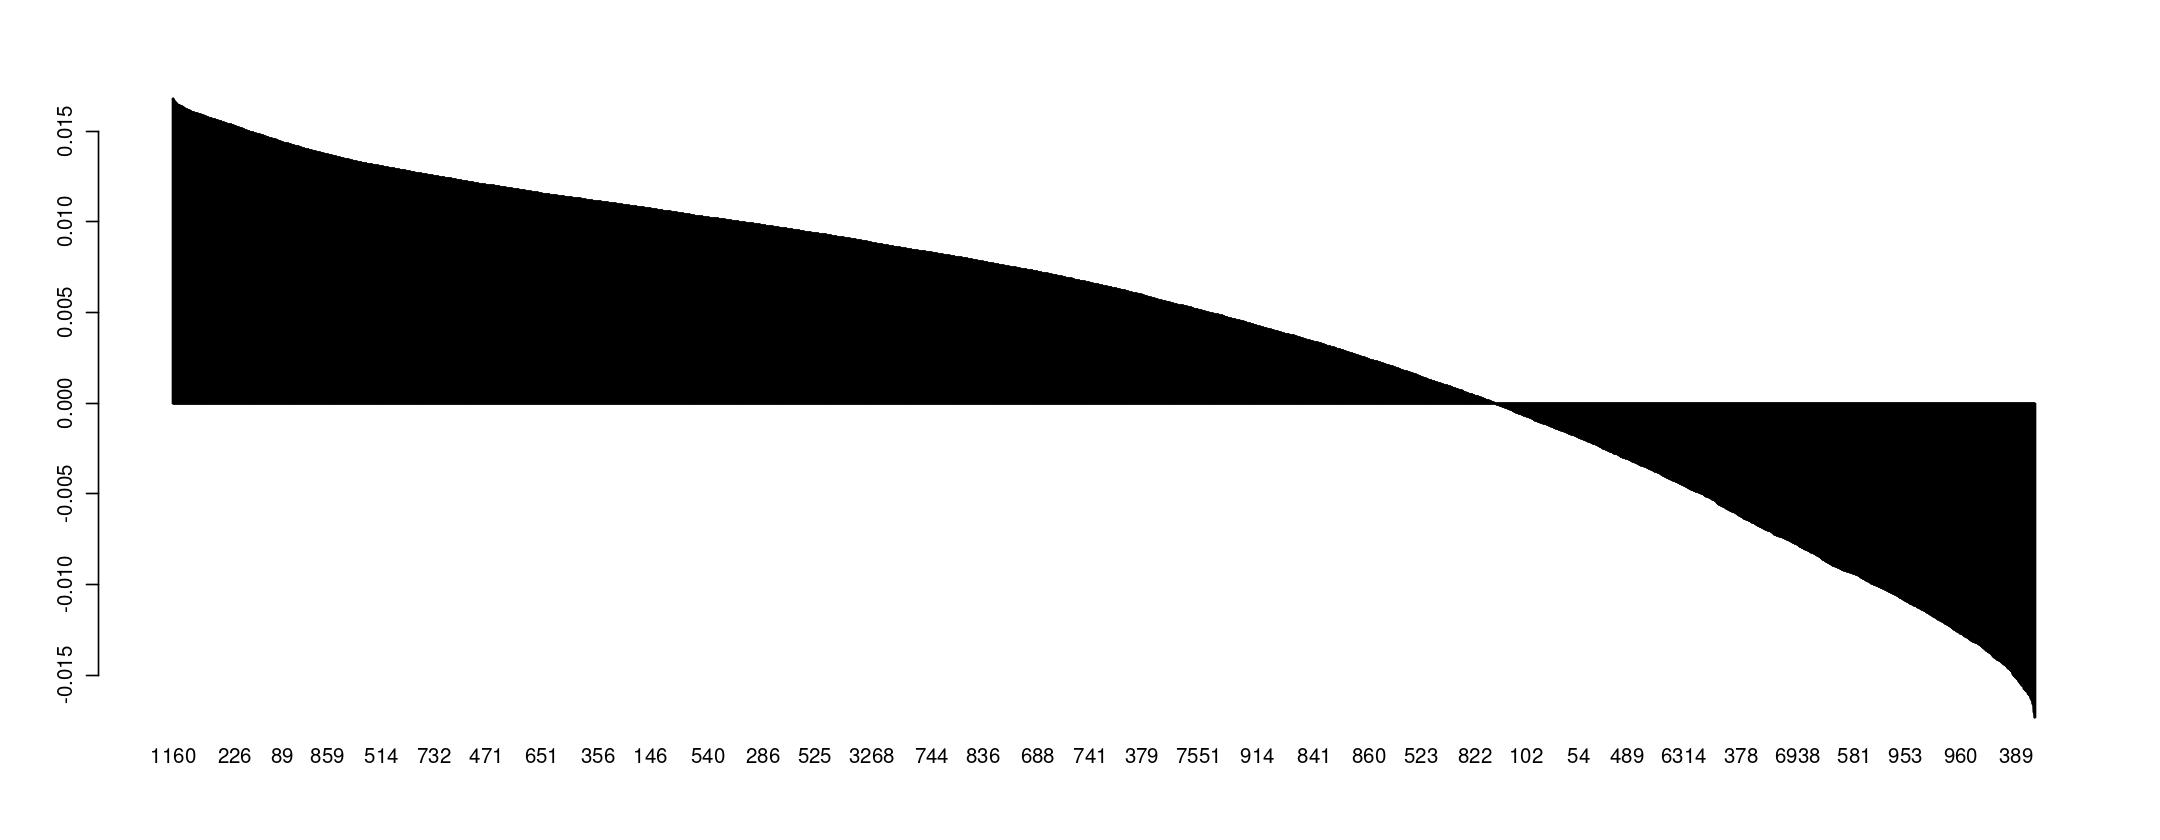

In [141]:
pc1_ranktable <- as.data.frame(pc1_ranktable)
pc1_ranktable$rank <- as.numeric(pc1_ranktable$rank)
ranks <- setNames(pc1_ranktable$rank, pc1_ranktable$GeneID)
ranks <- sort(ranks, decreasing=T)
barplot(ranks)


In [143]:
library(enrichplot)
require(clusterProfiler)
require(DOSE)

Loading required package: clusterProfiler

clusterProfiler v4.2.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:lattice’:

    dotplot


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:stats’:

    filter


Loading required package: DOSE

DOSE v3.20.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE 

### GO biologic process

In [144]:
pc1go <- gseGO(geneList     = ranks,
              OrgDb        = org.Hs.eg.db,
              exponent = 0, 
              ont          = "BP",
              minGSSize    = 15,
              maxGSSize    = 500,
              eps = 0,
              pvalueCutoff = 0.05,
              pAdjustMethod = "BH",
              verbose      = FALSE)

In [145]:
x1 <- enrichplot::pairwise_termsim(pc1go) 


In [147]:
pc1gomf <- gseGO(geneList     = ranks,
              OrgDb        = org.Hs.eg.db,
              exponent = 0, 
              ont          = "MF",
              minGSSize    = 15,
              maxGSSize    = 500,
              eps = 0,
              pvalueCutoff = 0.05,
              pAdjustMethod = "BH",
              verbose      = FALSE)

In [148]:
x2 <- enrichplot::pairwise_termsim(pc1gomf) 


In [149]:
pc1gocc <- gseGO(geneList     = ranks,
              OrgDb        = org.Hs.eg.db,
              exponent = 0, 
              ont          = "CC",
              minGSSize    = 15,
              maxGSSize    = 500,
              eps = 0,
              pvalueCutoff = 0.05,
              pAdjustMethod = "BH",
              verbose      = FALSE)

In [150]:
x3 <- enrichplot::pairwise_termsim(pc1gocc) 


In [151]:
pc1goall <- gseGO(geneList     = ranks,
              OrgDb        = org.Hs.eg.db,
              exponent = 0, 
              ont          = "ALL",
              minGSSize    = 15,
              maxGSSize    = 500,
              eps = 0,
              pvalueCutoff = 0.05,
              pAdjustMethod = "BH",
              verbose      = FALSE)

In [152]:
x4 <- enrichplot::pairwise_termsim(pc1goall) 


In [6]:
options(repr.plot.width=18, repr.plot.height=8)

## Figure 2H

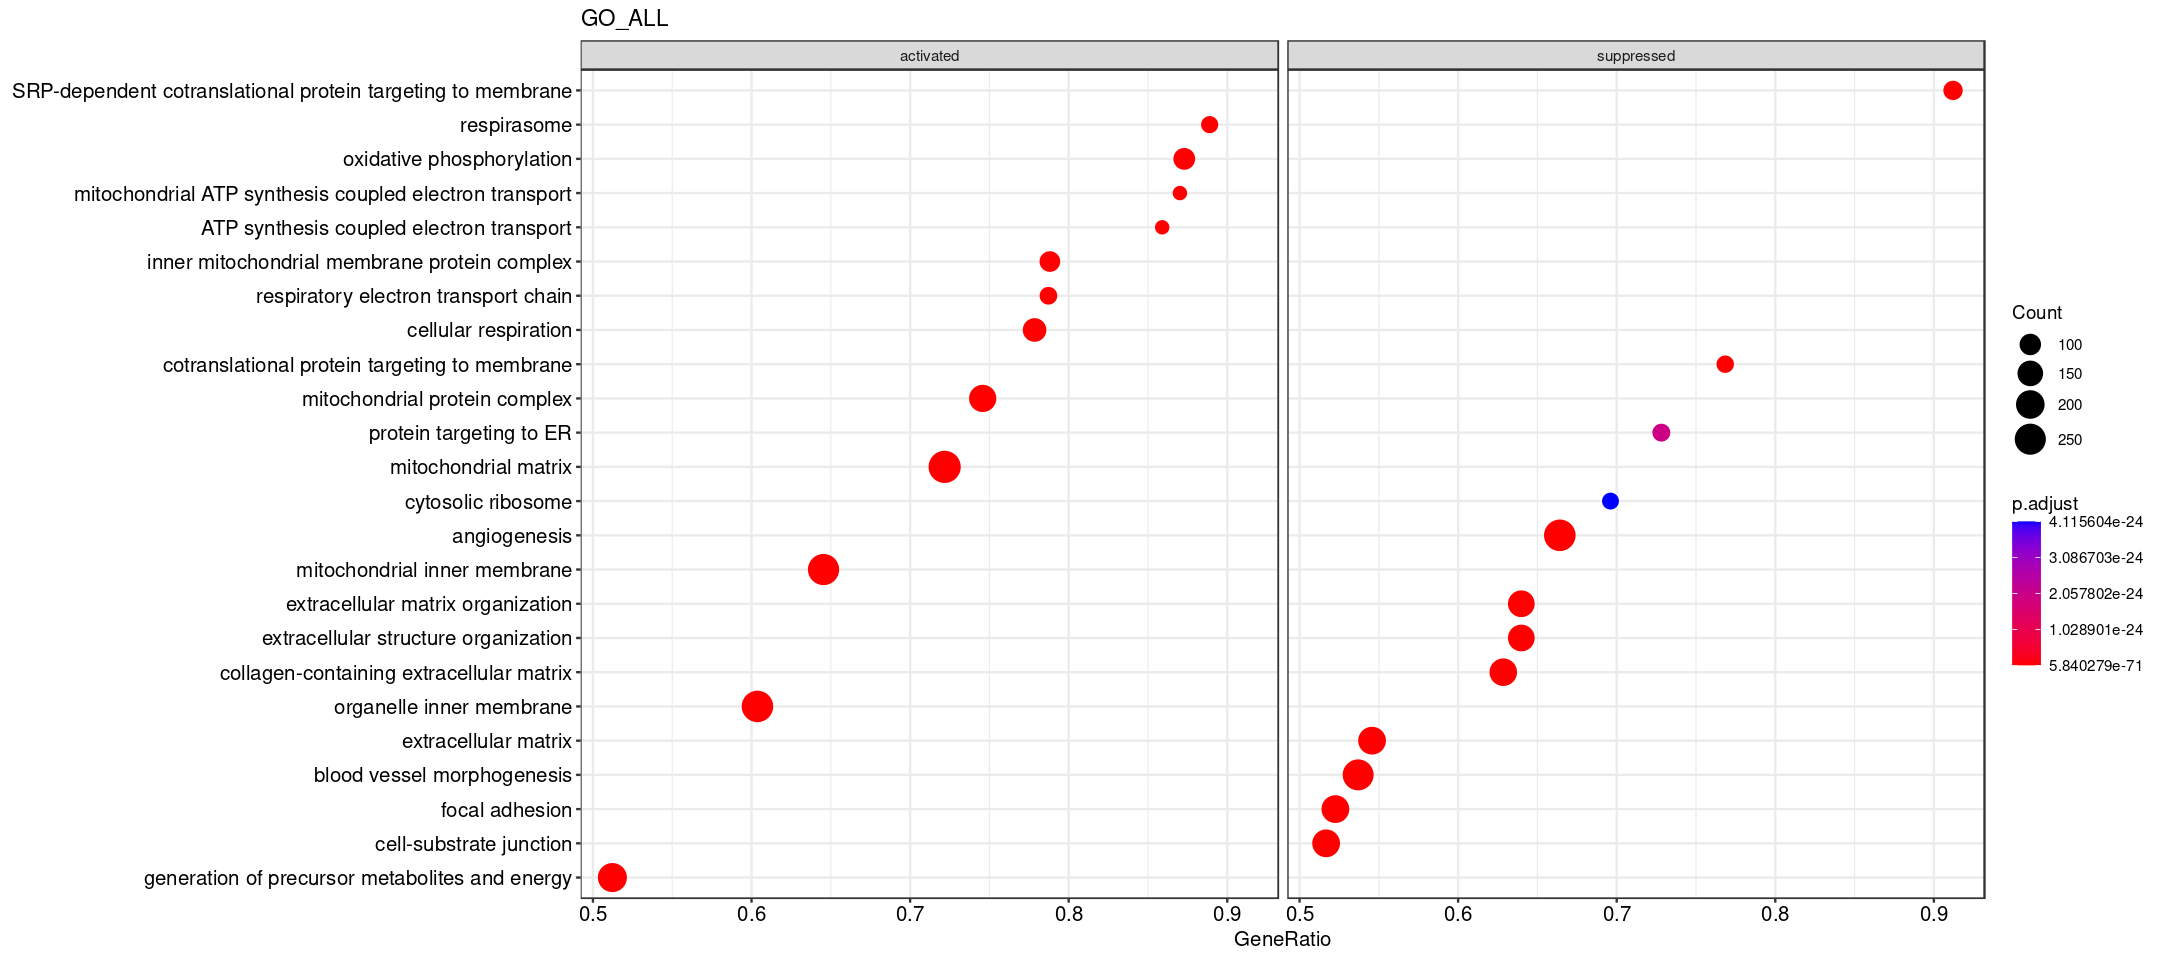

In [154]:
dotplot(x4, showCategory=12, split=".sign", title = "GO_ALL", label_format = 80) + facet_grid(.~.sign)

## Figure 2I

Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(method = your_value)' instead of 'hclust_method'.
 The hclust_method parameter will be removed in the next version.”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(n = your_value)' instead of 'nCluster'.
 The nCluster parameter will be removed in the next version.”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(label_words_n = your_value)' instead of 'nWords'.
 The nWords parameter will be removed in the next version.”
Warning message in stat_tree(data = data, mapping = mapping, geom = "segment", position = position, :
“Ignoring unknown parameters: `hang`”
Warning message in stat_tree(data = data, mapping = mapping, geom = "segment", position = position, :
“Ignoring unknown parameters: `hang`”


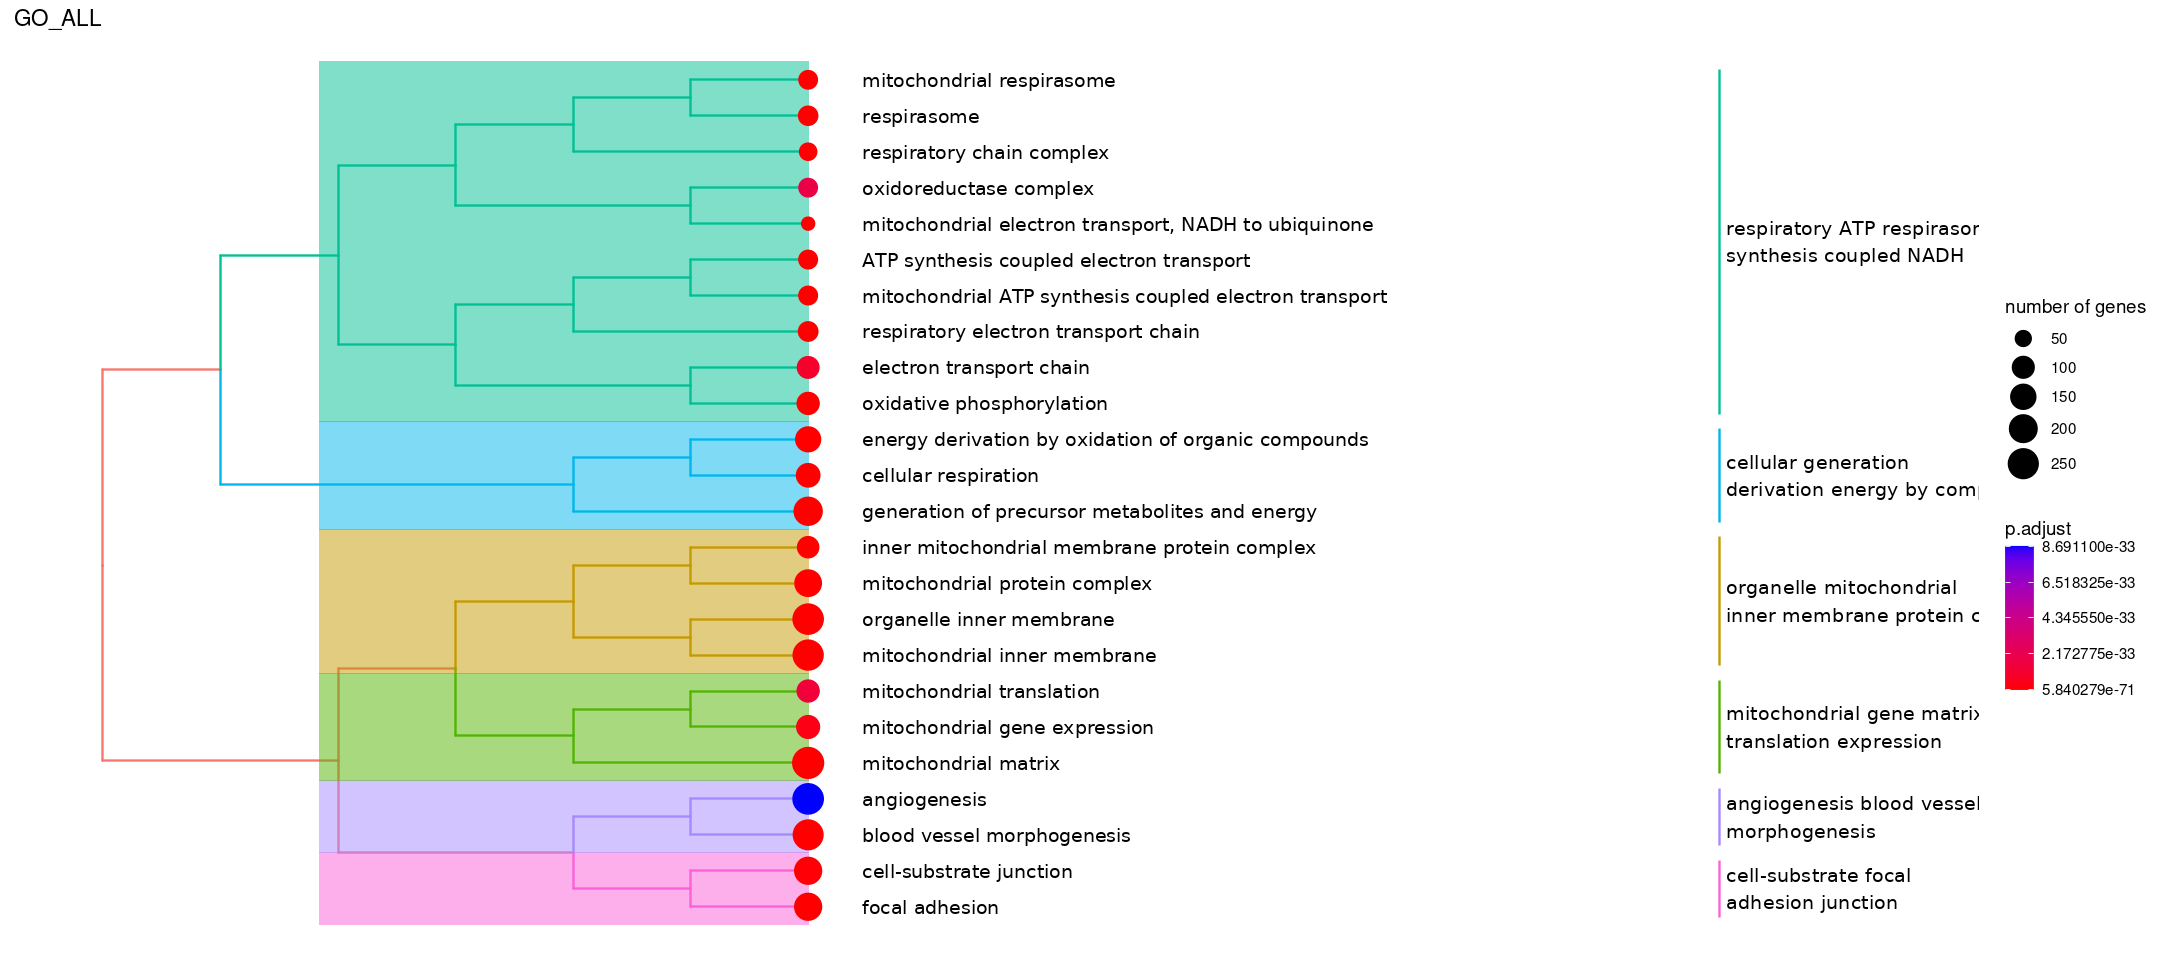

In [7]:
treeplot(x4, hclust_method = "ward.D", nWords = 6,  showCategory = 24,

  nCluster = 6) + ggtitle("GO_ALL")

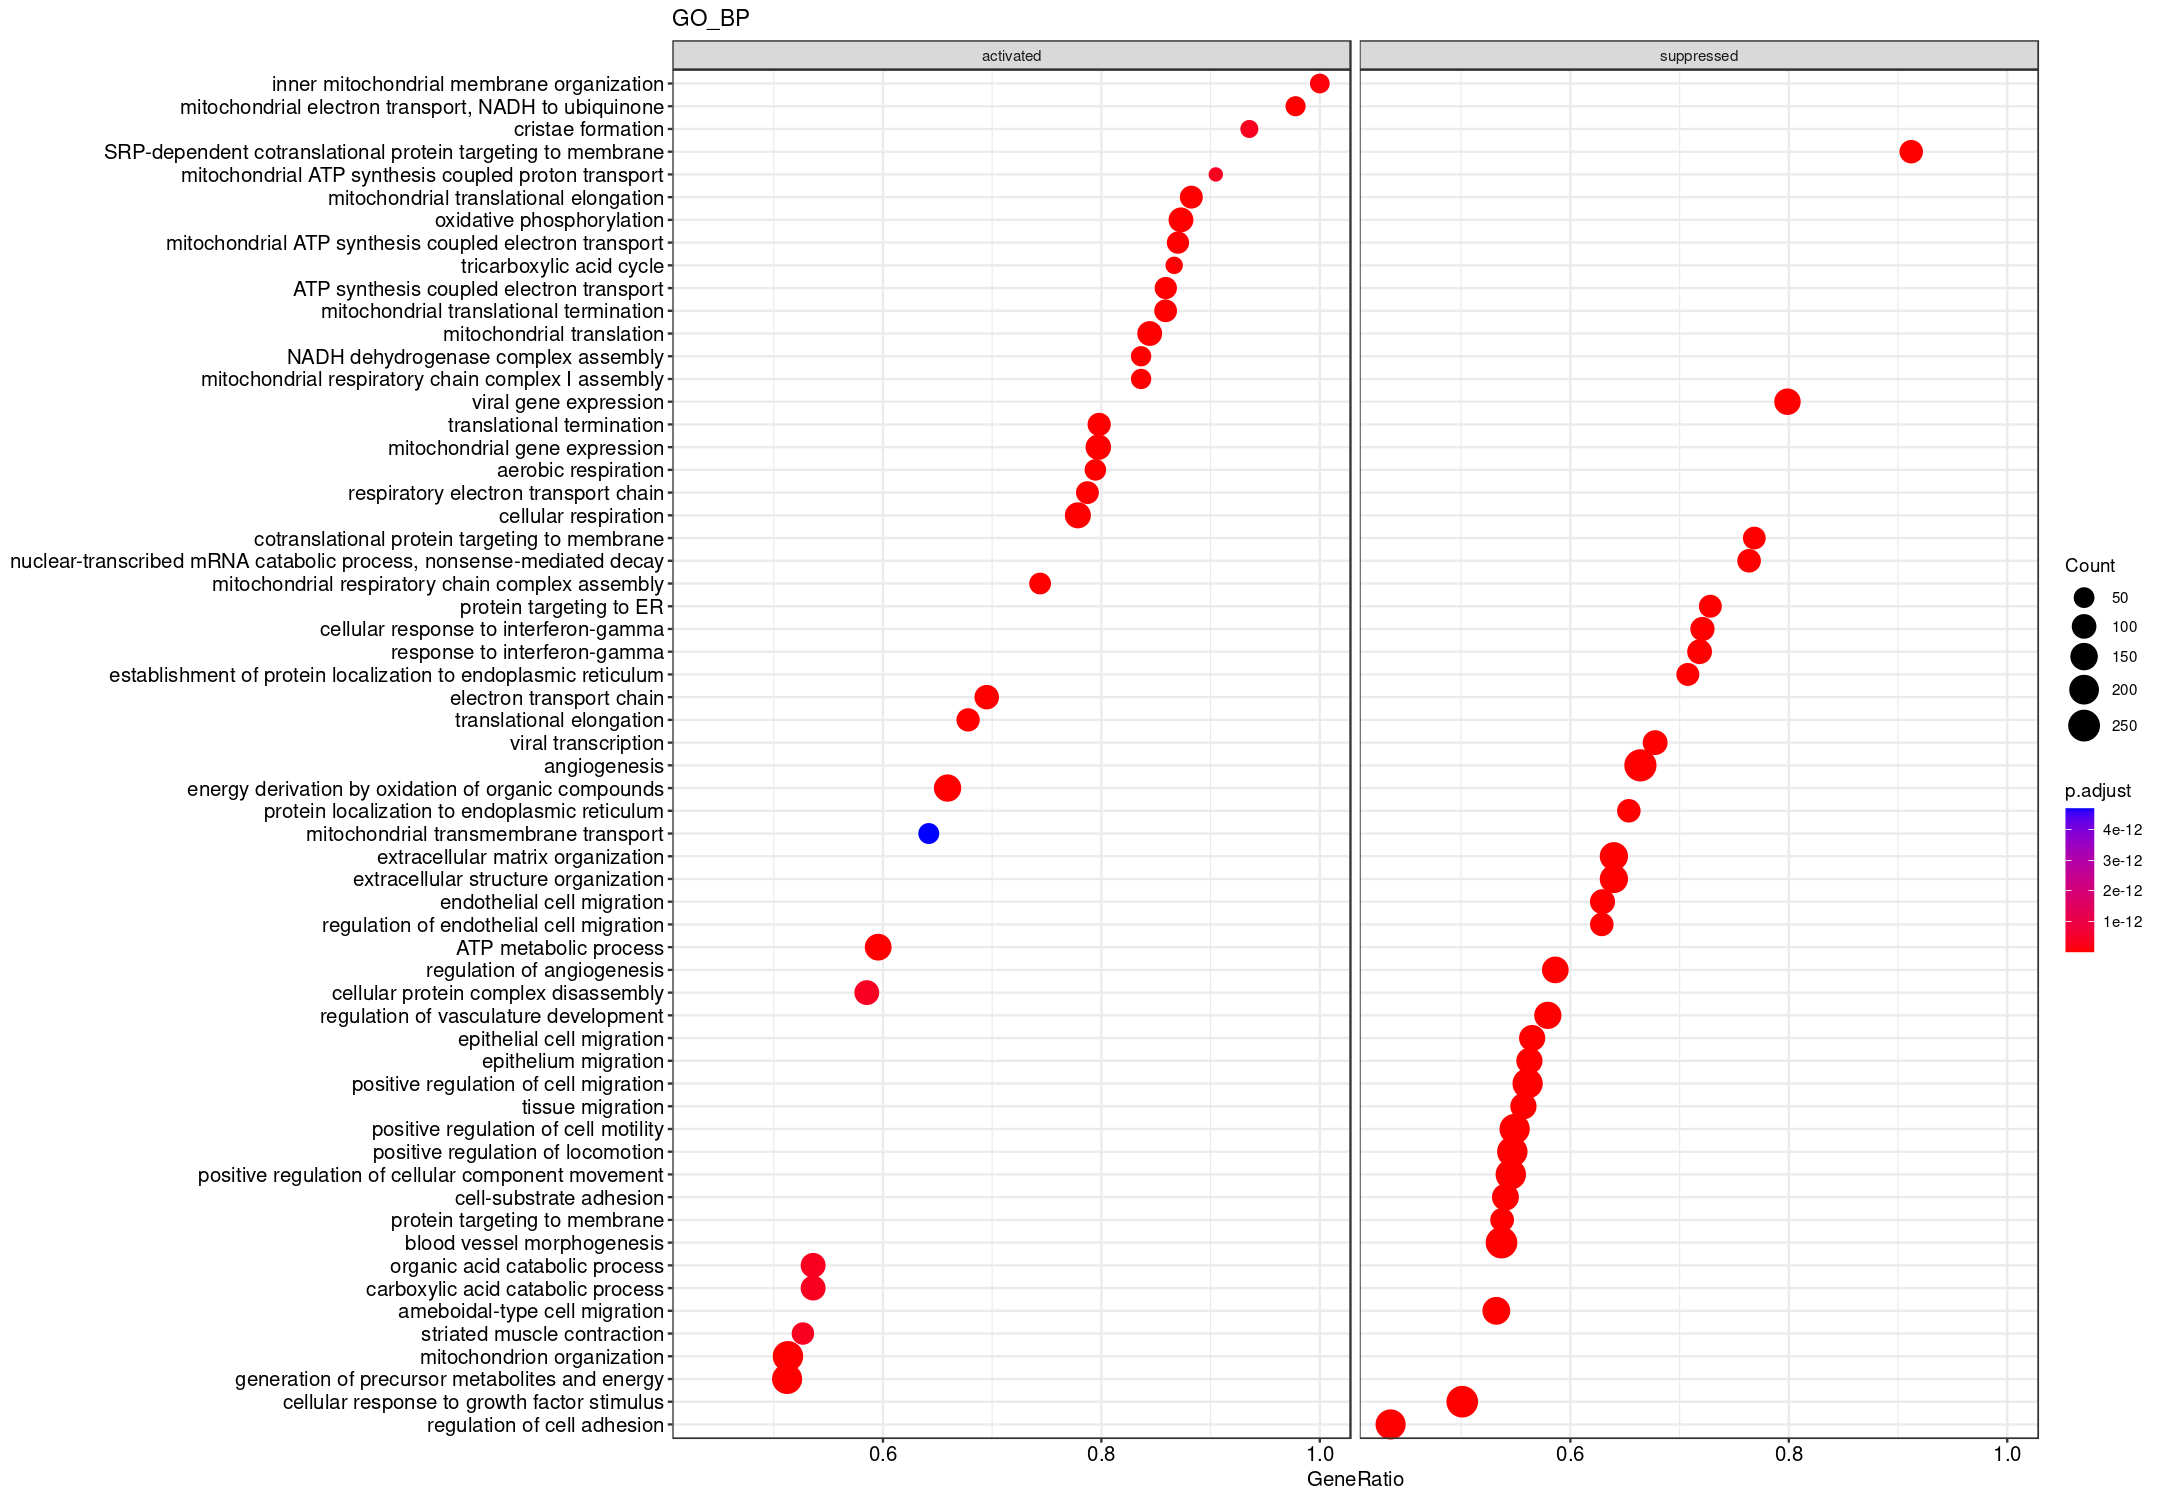

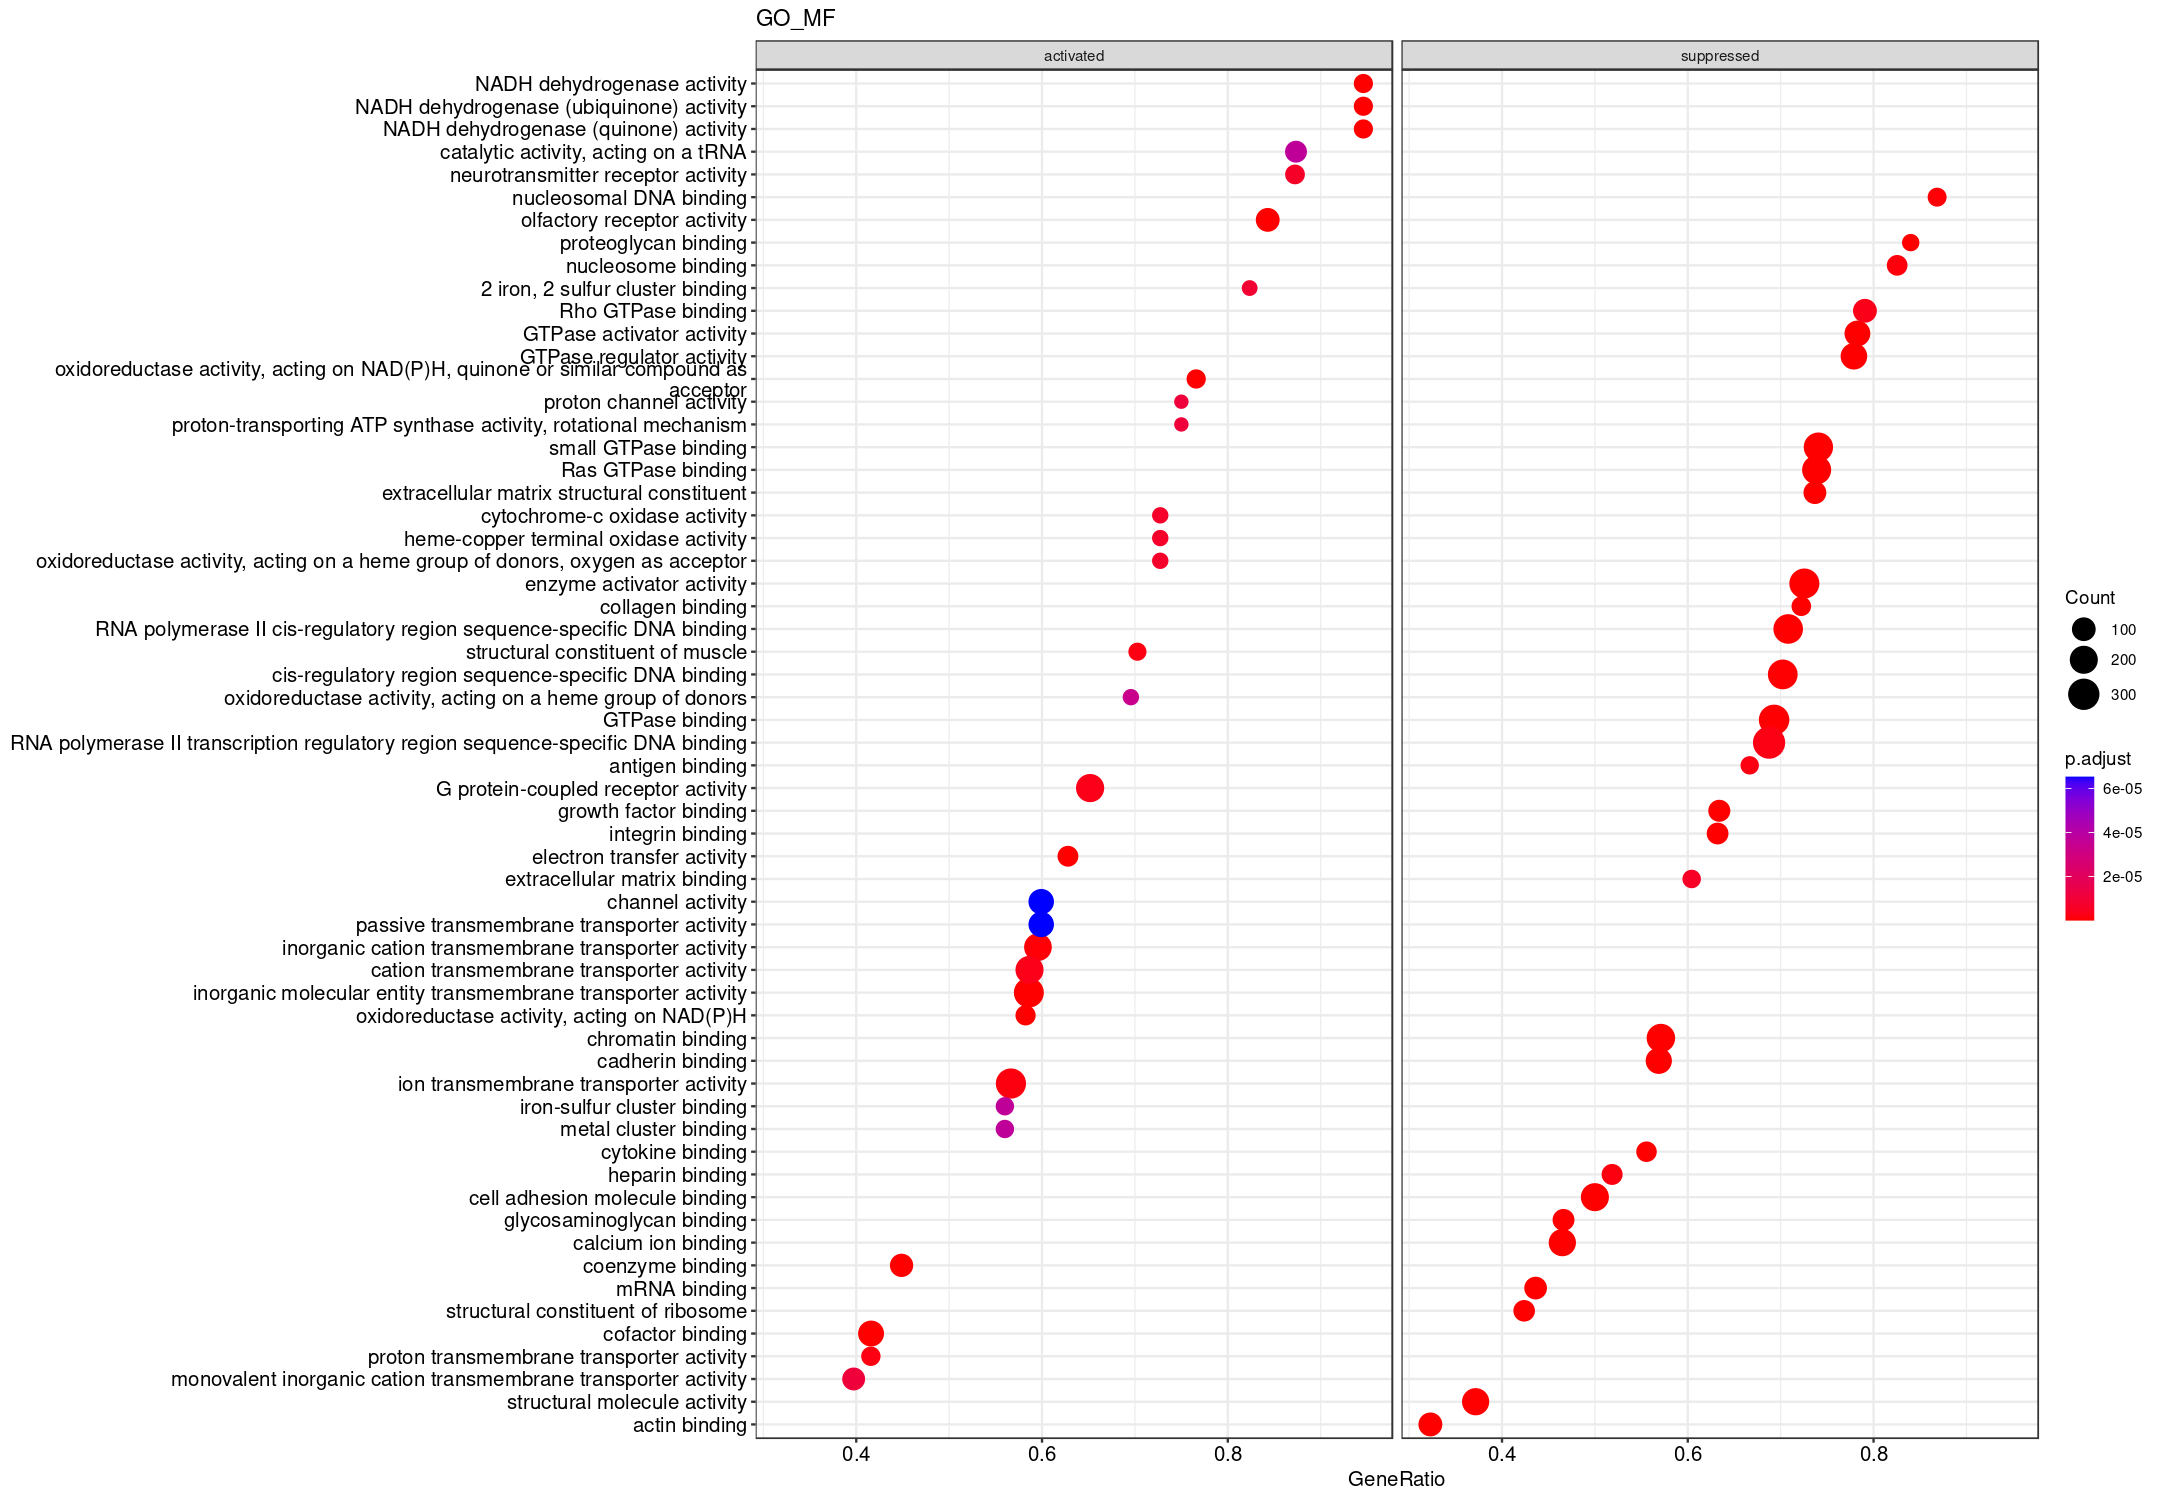

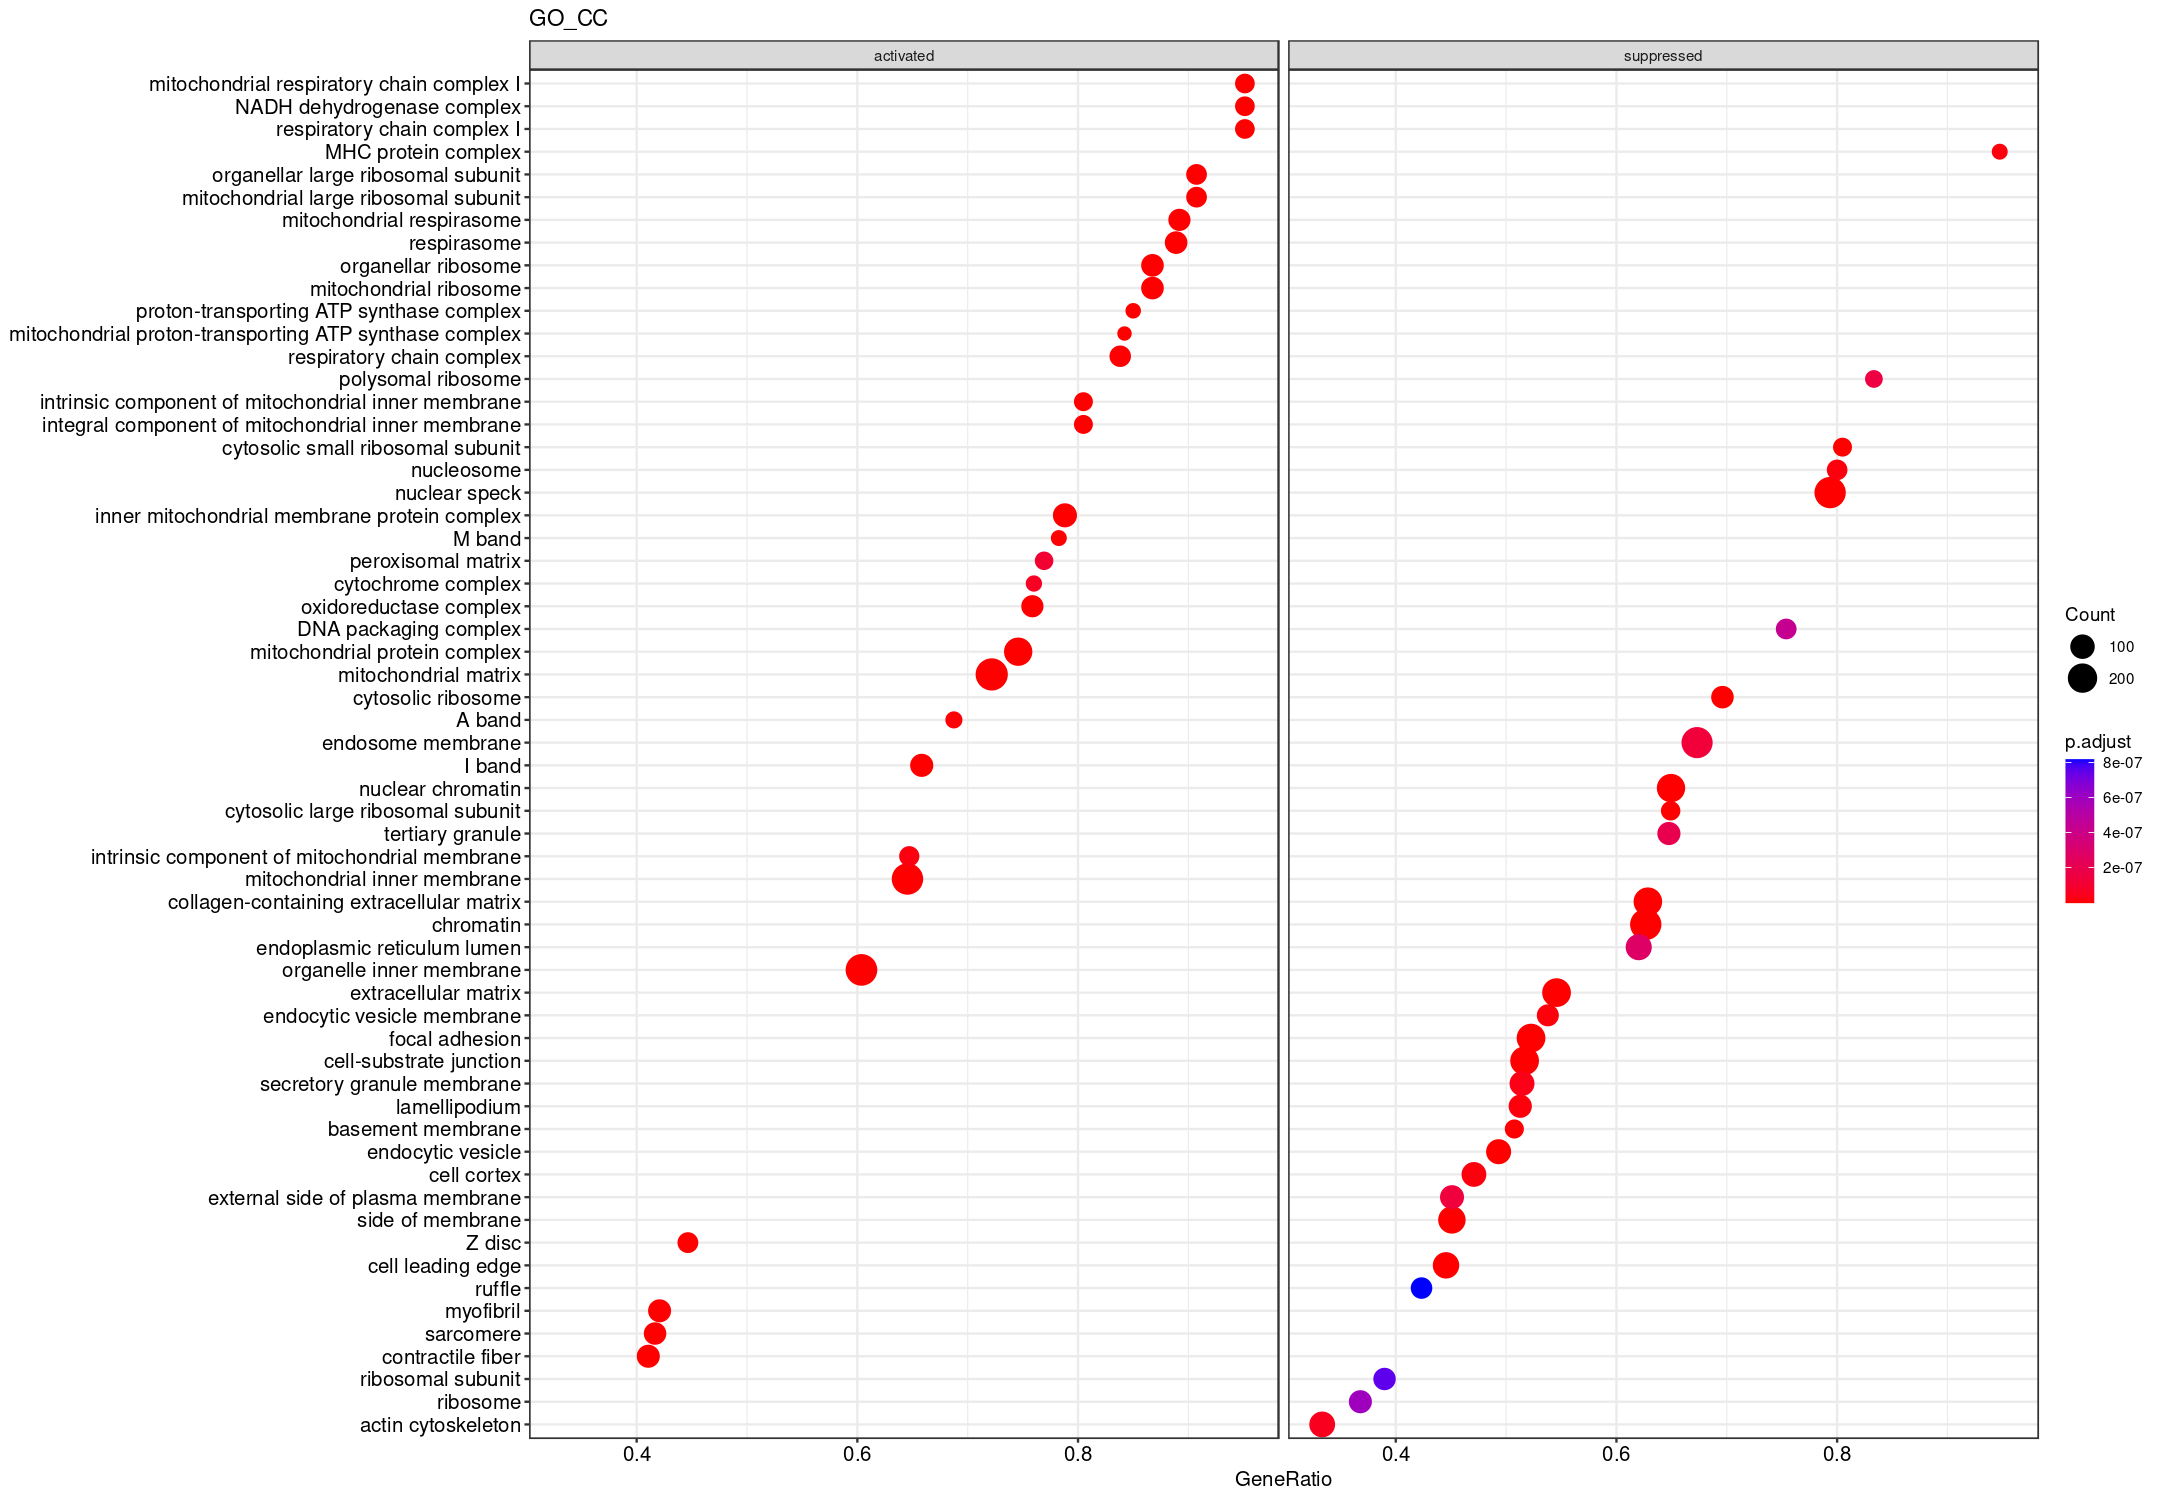

In [156]:
options(repr.plot.width=18, repr.plot.height=12.5)

dotplot(x1, showCategory=30, split=".sign", title = "GO_BP", label_format = 80) + facet_grid(.~.sign)
dotplot(x2, showCategory=30, split=".sign", title = "GO_MF", label_format = 80) + facet_grid(.~.sign)
dotplot(x3, showCategory=30, split=".sign", title = "GO_CC", label_format = 80) + facet_grid(.~.sign)


Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(method = your_value)' instead of 'hclust_method'.
 The hclust_method parameter will be removed in the next version.”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(n = your_value)' instead of 'nCluster'.
 The nCluster parameter will be removed in the next version.”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(label_words_n = your_value)' instead of 'nWords'.
 The nWords parameter will be removed in the next version.”
Warning message in stat_tree(data = data, mapping = mapping, geom = "segment", position = position, :
“Ignoring unknown parameters: `hang`”
Warning message in stat_tree(data = data, mapping = mapping, geom = "segment", position = position, :
“Ignoring unknown parameters: `hang`”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(method = your_value)' instead of 'hclust_method'.
 The hclust_method parameter 

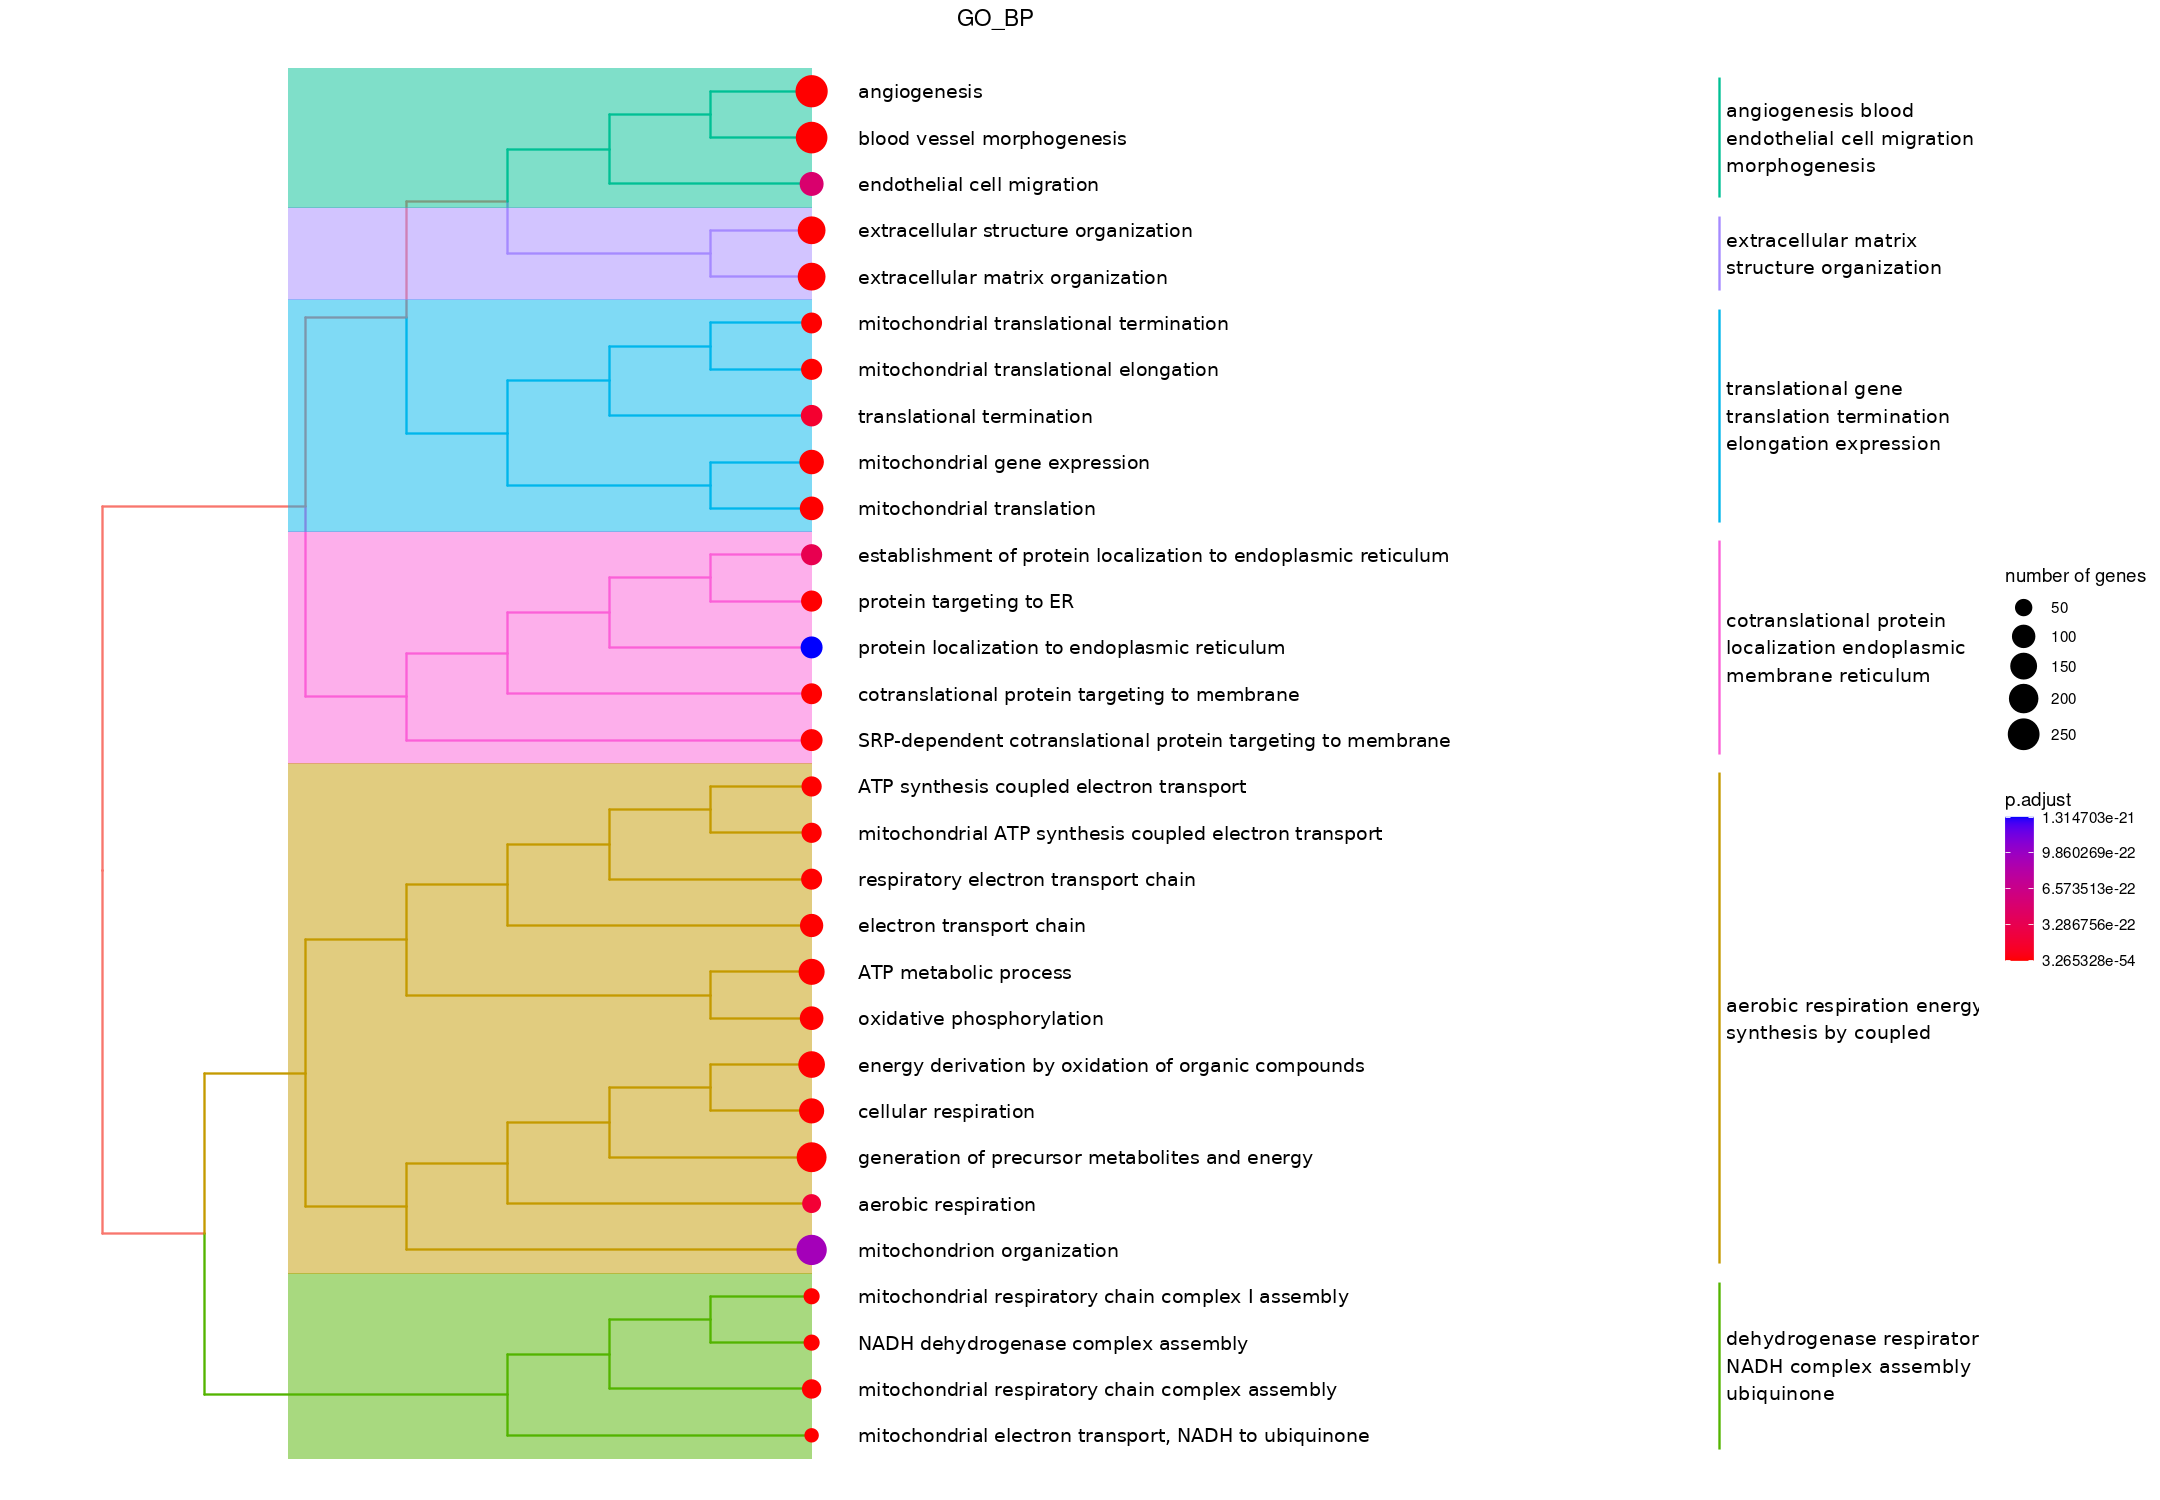

Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(method = your_value)' instead of 'hclust_method'.
 The hclust_method parameter will be removed in the next version.”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(n = your_value)' instead of 'nCluster'.
 The nCluster parameter will be removed in the next version.”
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(label_words_n = your_value)' instead of 'nWords'.
 The nWords parameter will be removed in the next version.”
Warning message in stat_tree(data = data, mapping = mapping, geom = "segment", position = position, :
“Ignoring unknown parameters: `hang`”
Warning message in stat_tree(data = data, mapping = mapping, geom = "segment", position = position, :
“Ignoring unknown parameters: `hang`”


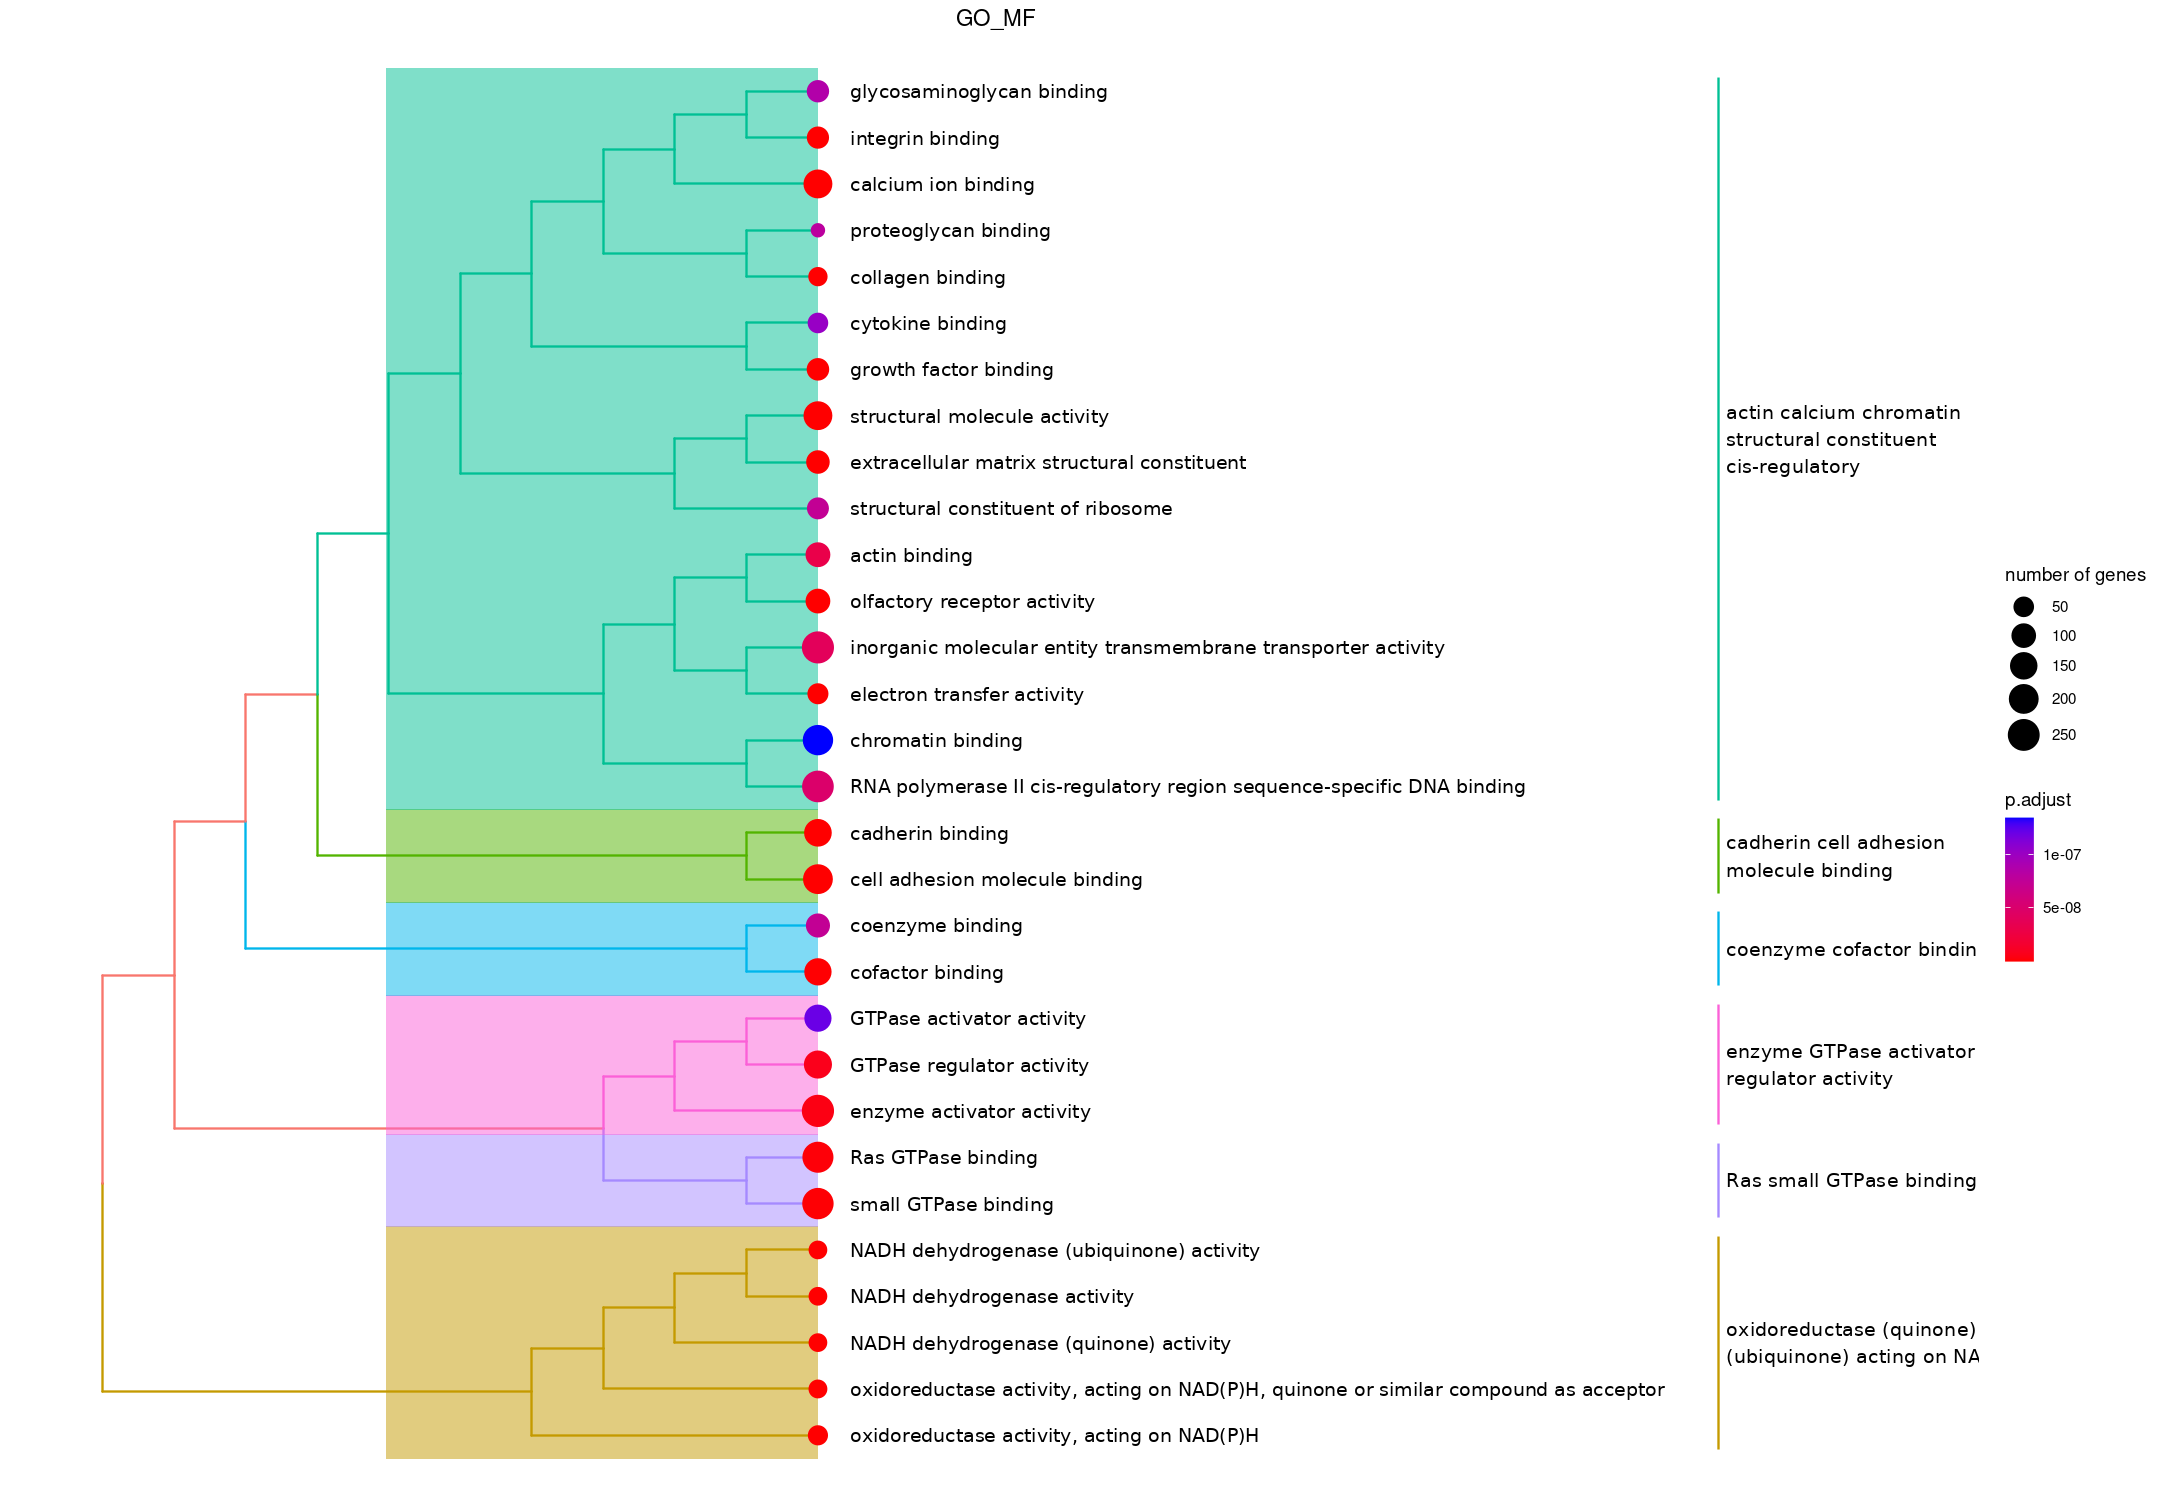

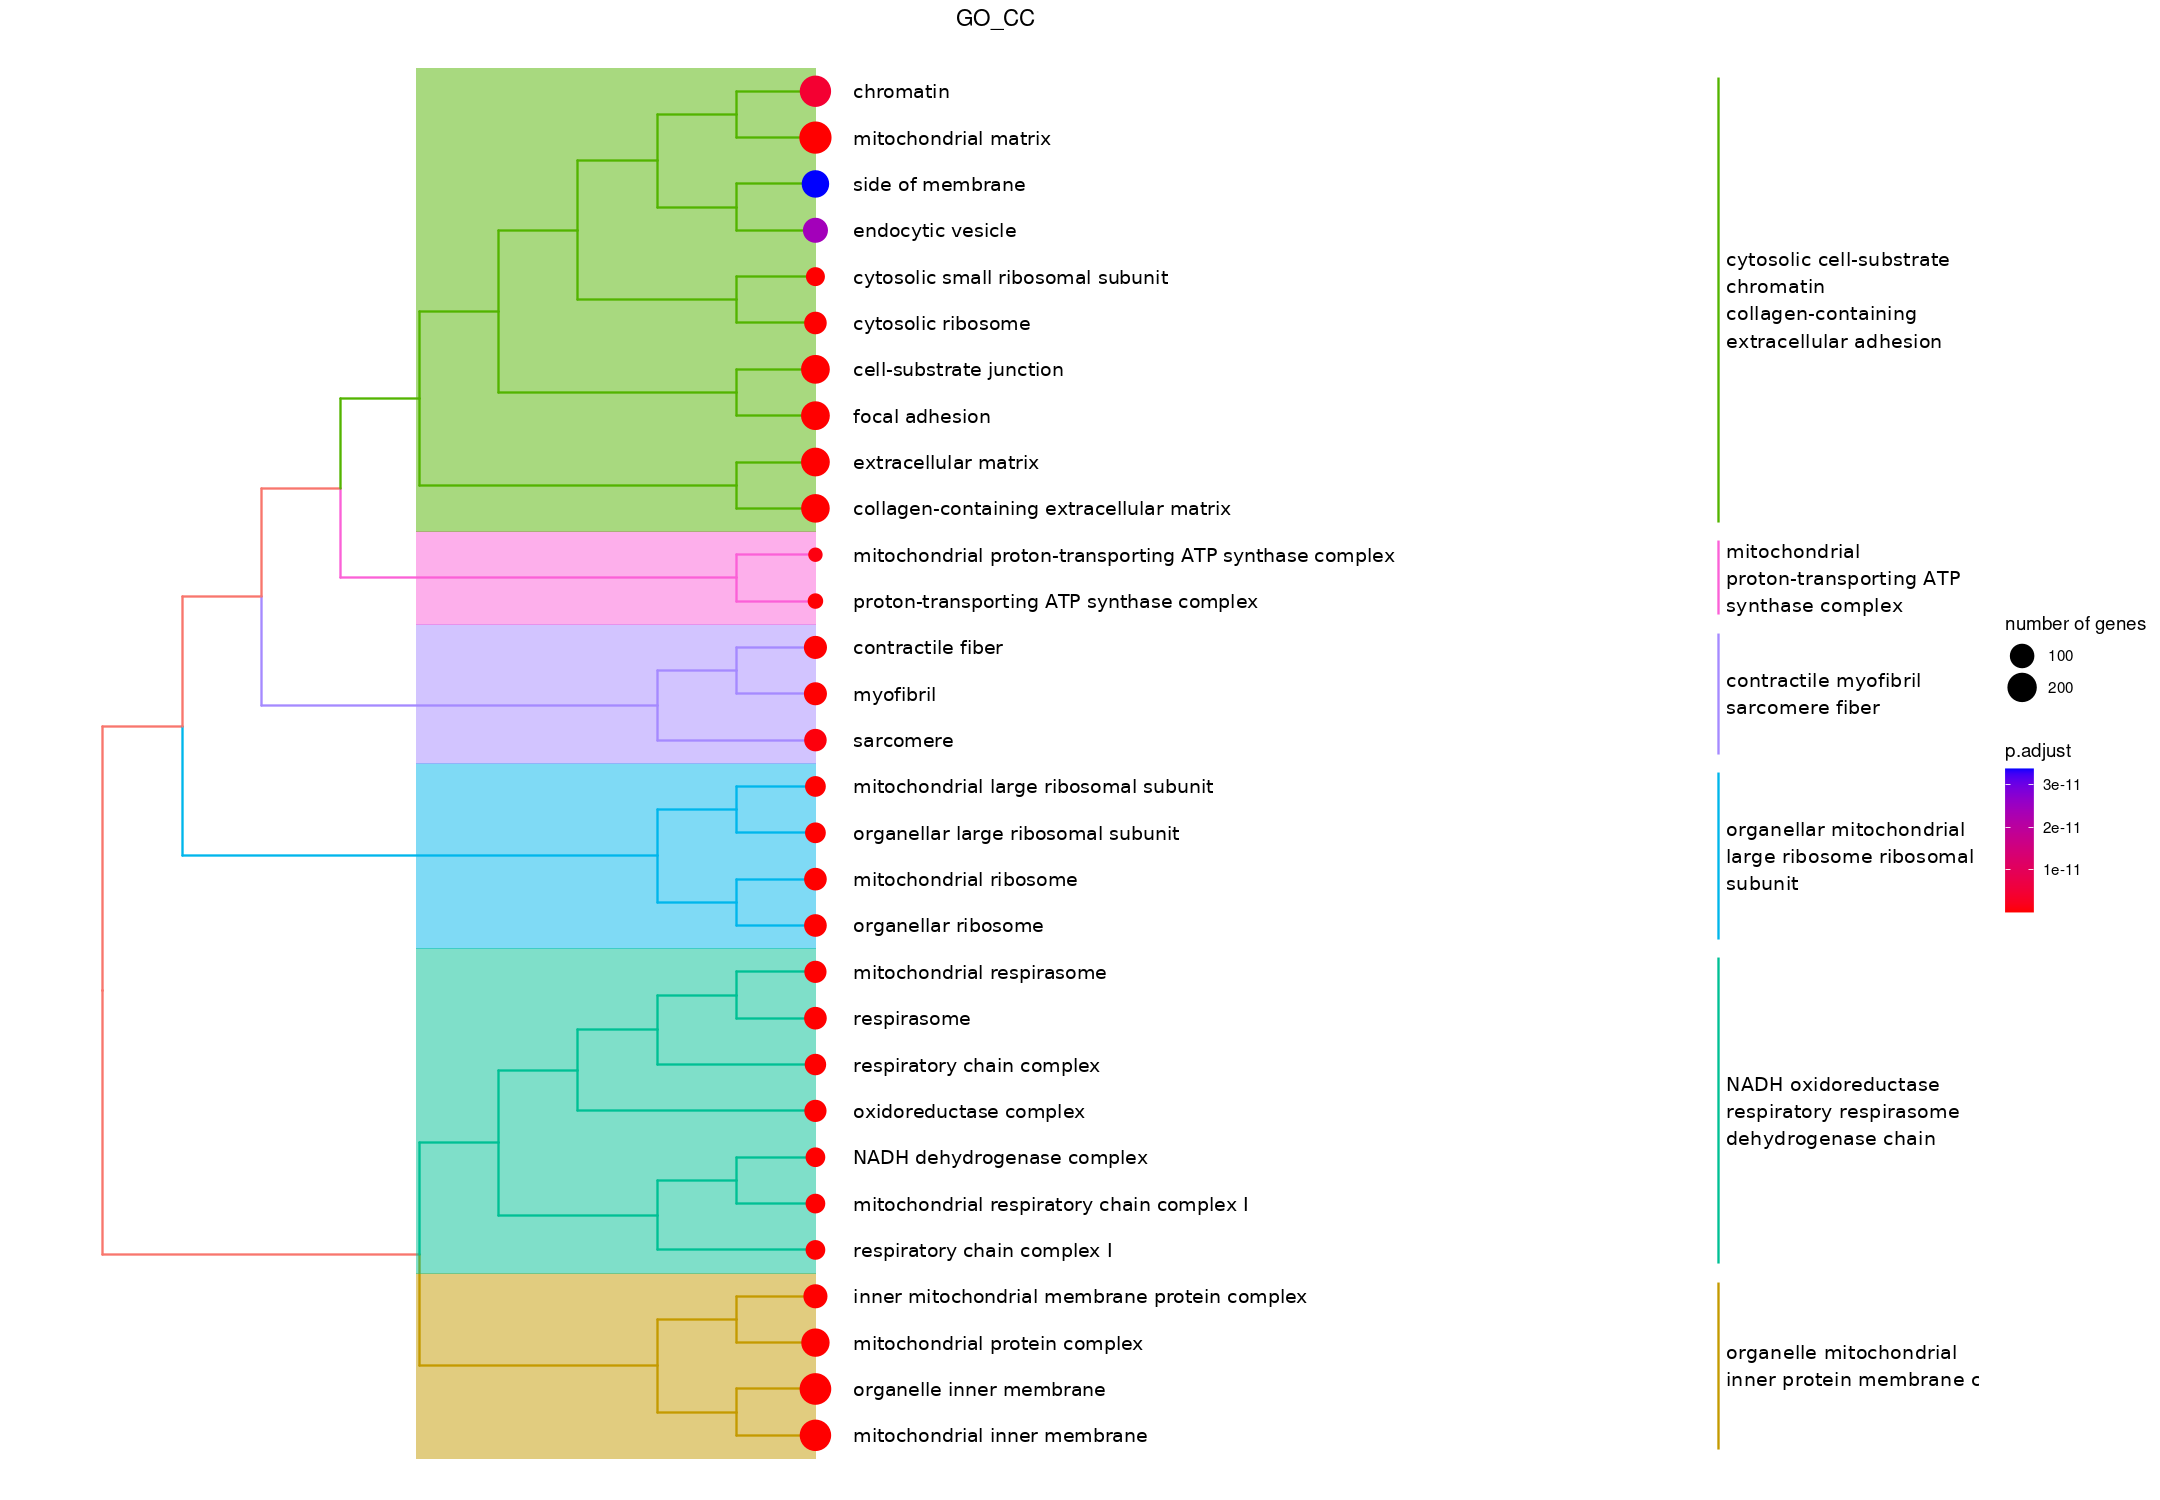

In [8]:
options(repr.plot.width=18, repr.plot.height=12.5)

treeplot(x1, hclust_method = "ward.D", nWords = 6, 
  nCluster = 6) + ggtitle("GO_BP") + theme(plot.title = element_text(hjust = 0.5))
treeplot(x2, hclust_method = "ward.D", nWords = 6,
  nCluster = 6) + ggtitle("GO_MF") + theme(plot.title = element_text(hjust = 0.5))
treeplot(x3, hclust_method = "ward.D", nWords = 6,
  nCluster = 6) + ggtitle("GO_CC") + theme(plot.title = element_text(hjust = 0.5))

# Gene expression analysis - DREAM

## Top ranked gene expression

In [161]:
param = SnowParam(NoCore, "SOCK", progressbar=TRUE)

In [162]:
#### apply to our data 4#### met_Trp_hcmp_ctrl$Clinical_phenotype_2nd
# The variable to be tested must be a fixed effect
# estimate weights using linear mixed model of dream
vobjDream = voomWithDreamWeights(d1, form, m, BPPARAM=param)

Memory usage to store result: >191.6 Mb

Dividing work into 104 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104



Total:129 s



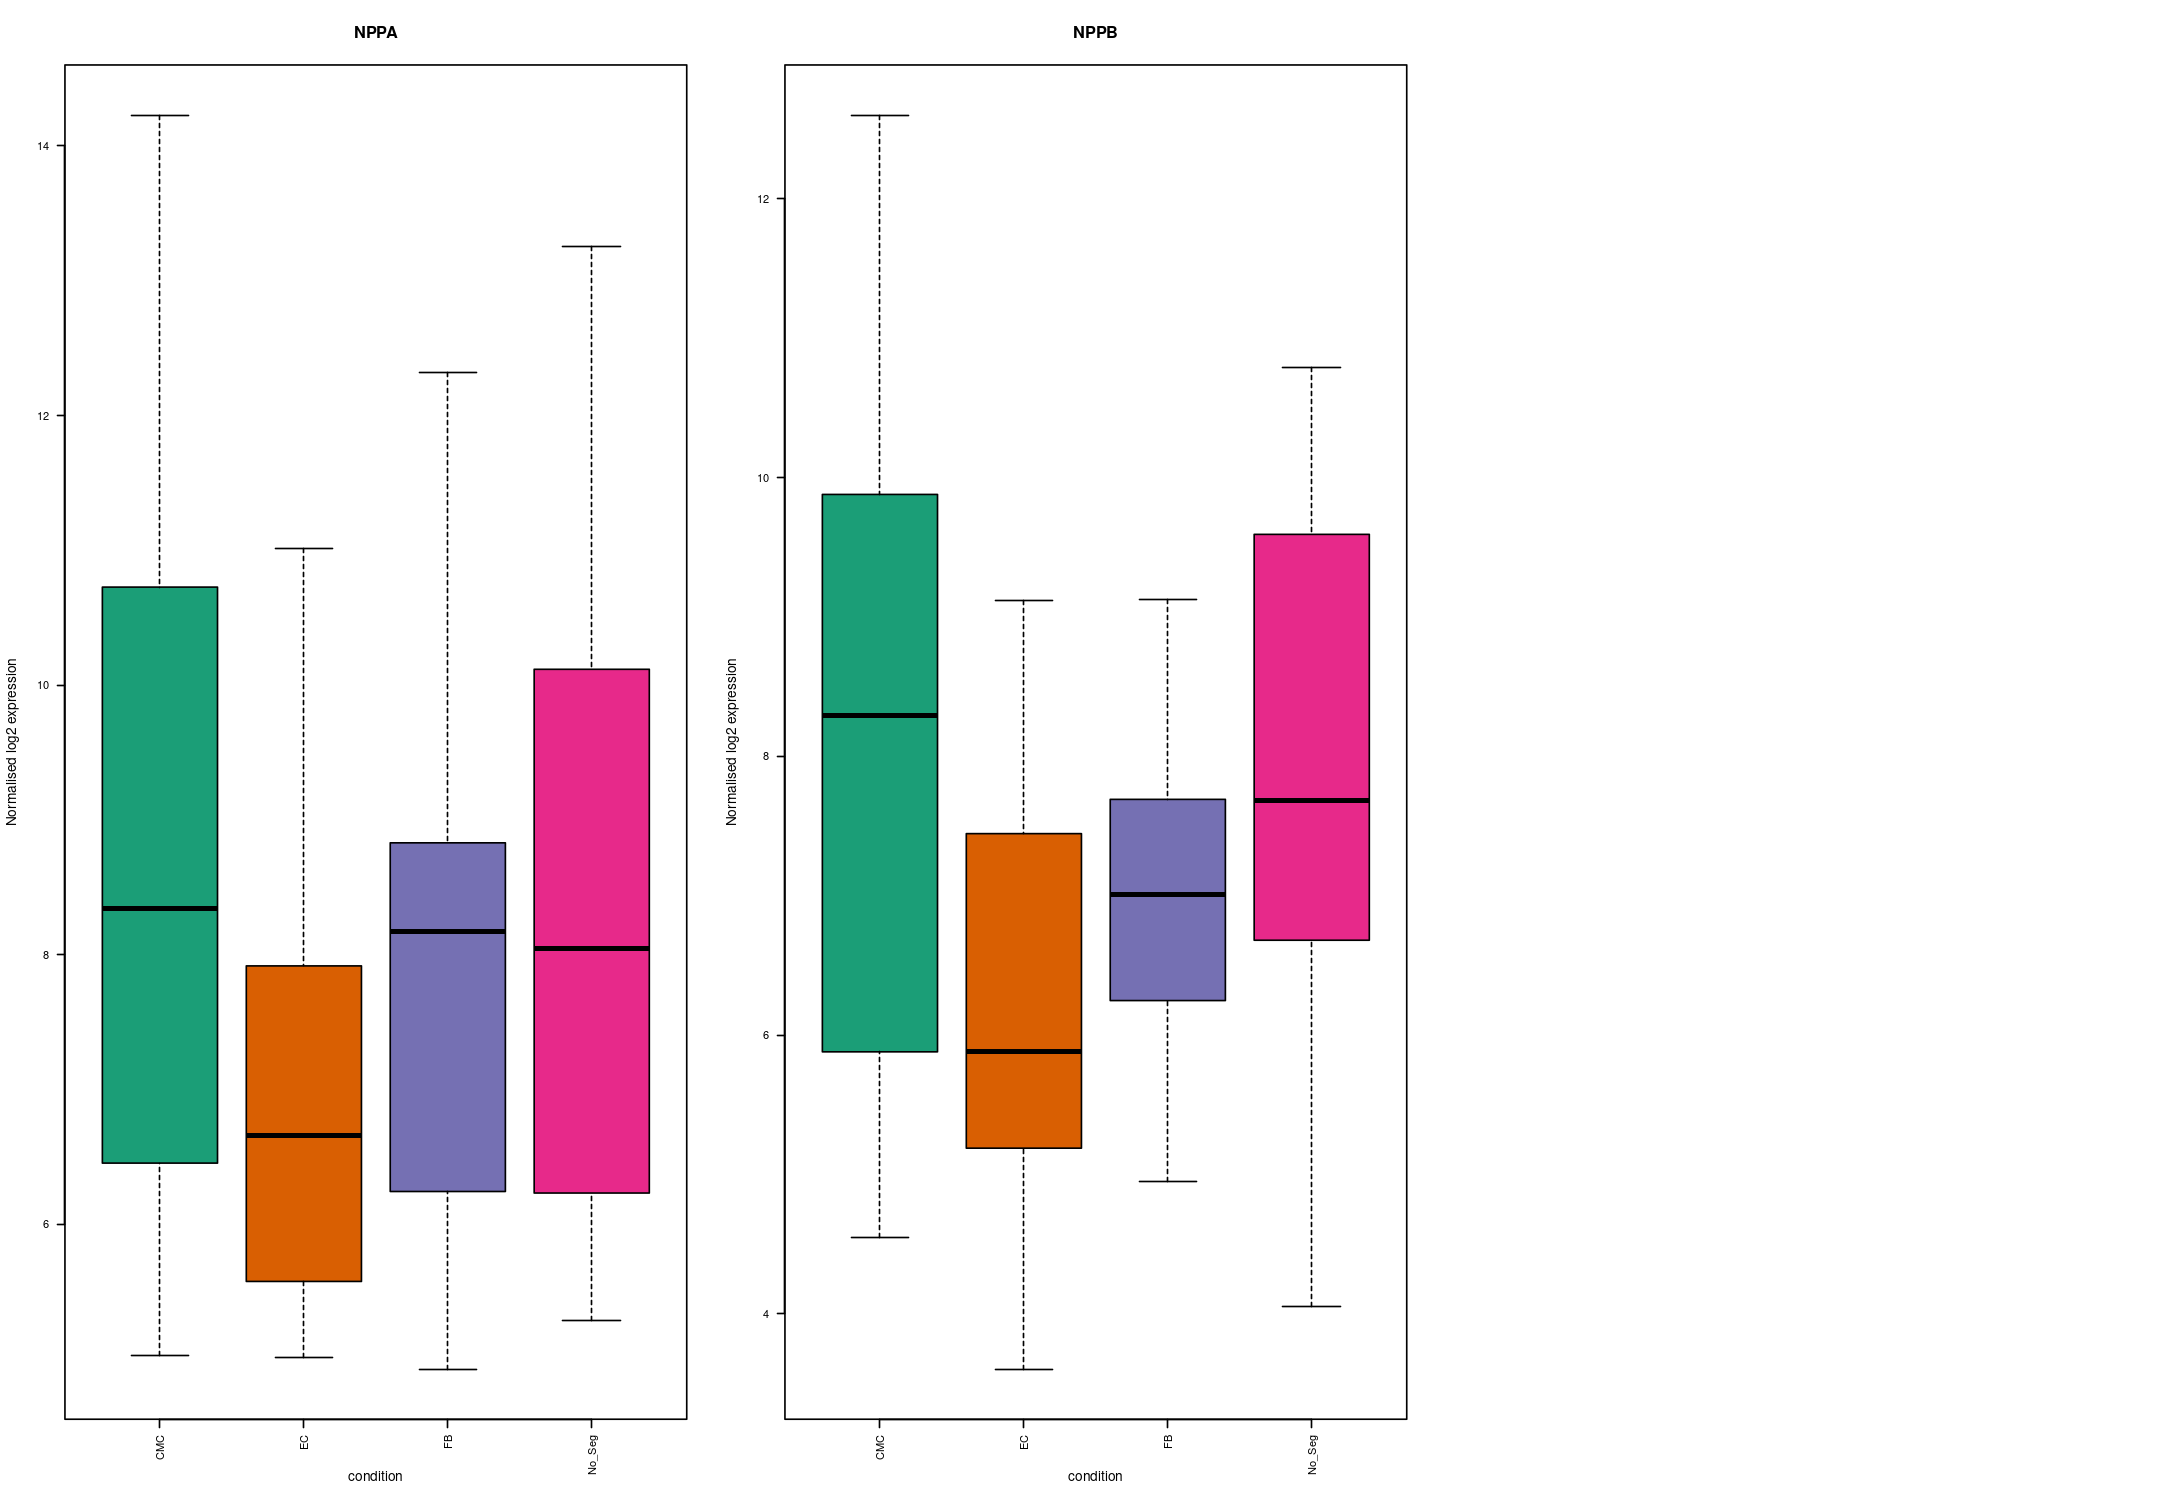

In [164]:
nice.col <- brewer.pal(6,name="Dark2")

par(mfrow=c(1,3))
boxplot(vobjDream$E["NPPA",]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="NPPA") 
boxplot(vobjDream$E["NPPB",]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="NPPB")
# boxplot(vobjDream$E["PECAM1",]~celltype,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="PECAM1") 



## Differential expression analysis

## Make Contrast Matrix using condition 

In [167]:
makecontrastasroutine

[1] "celltype_comwith_othercells"

In [168]:
if (makecontrastasroutine == "Y") {
    if (length(levels(condition)) == 2) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 3) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 4) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 5) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[5], " - ", "condition", levels(condition)[1]))
        }
    } else if (makecontrastasroutine == "Forclinicaldisease") {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[5], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[5]))
    } else if (makecontrastasroutine == "celltype_comwith_othercells") {
    contrast = c("conditionCMC-(conditionEC + conditionFB)/2"
                  , "conditionEC-(conditionCMC + conditionFB)/2"
                  , "conditionFB-(conditionEC + conditionCMC)/2"
                 , "conditionFB-conditionEC"
                 , "conditionEC-conditionCMC"
                 , "conditionFB-conditionCMC"
                 , "conditionCMC-conditionNo_Seg"
                 , "conditionEC-conditionNo_Seg"
                 , "conditionFB-conditionNo_Seg")
    } else {print("Decide Contrast for differential analysis")}


In [169]:
contrast

[1] "conditionCMC-(conditionEC + conditionFB)/2"
[2] "conditionEC-(conditionCMC + conditionFB)/2"
[3] "conditionFB-(conditionEC + conditionCMC)/2"
[4] "conditionFB-conditionEC"                   
[5] "conditionEC-conditionCMC"                  
[6] "conditionFB-conditionCMC"                  
[7] "conditionCMC-conditionNo_Seg"              
[8] "conditionEC-conditionNo_Seg"               
[9] "conditionFB-conditionNo_Seg"

In [170]:
L = makeContrastsDream(form_cont, m, 
                       contrasts = contrast)


In [ ]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))
print(file)

### Fitting linear mixed model

In [171]:
## Small-sample method
if (KRanaly == "Y"){
    fit = dream(vobjDream, form_cont, m, L, ddf="Kenward-Roger", BPPARAM=param)
    } else {
    fit = dream(vobjDream, form_cont, m, L, BPPARAM=param)
    }

fit = eBayes(fit)

Dividing work into 104 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104



Total:3123 s



In [174]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))
print(paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_"))


[1] "Spatialanalysis_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09_analysis.RData"


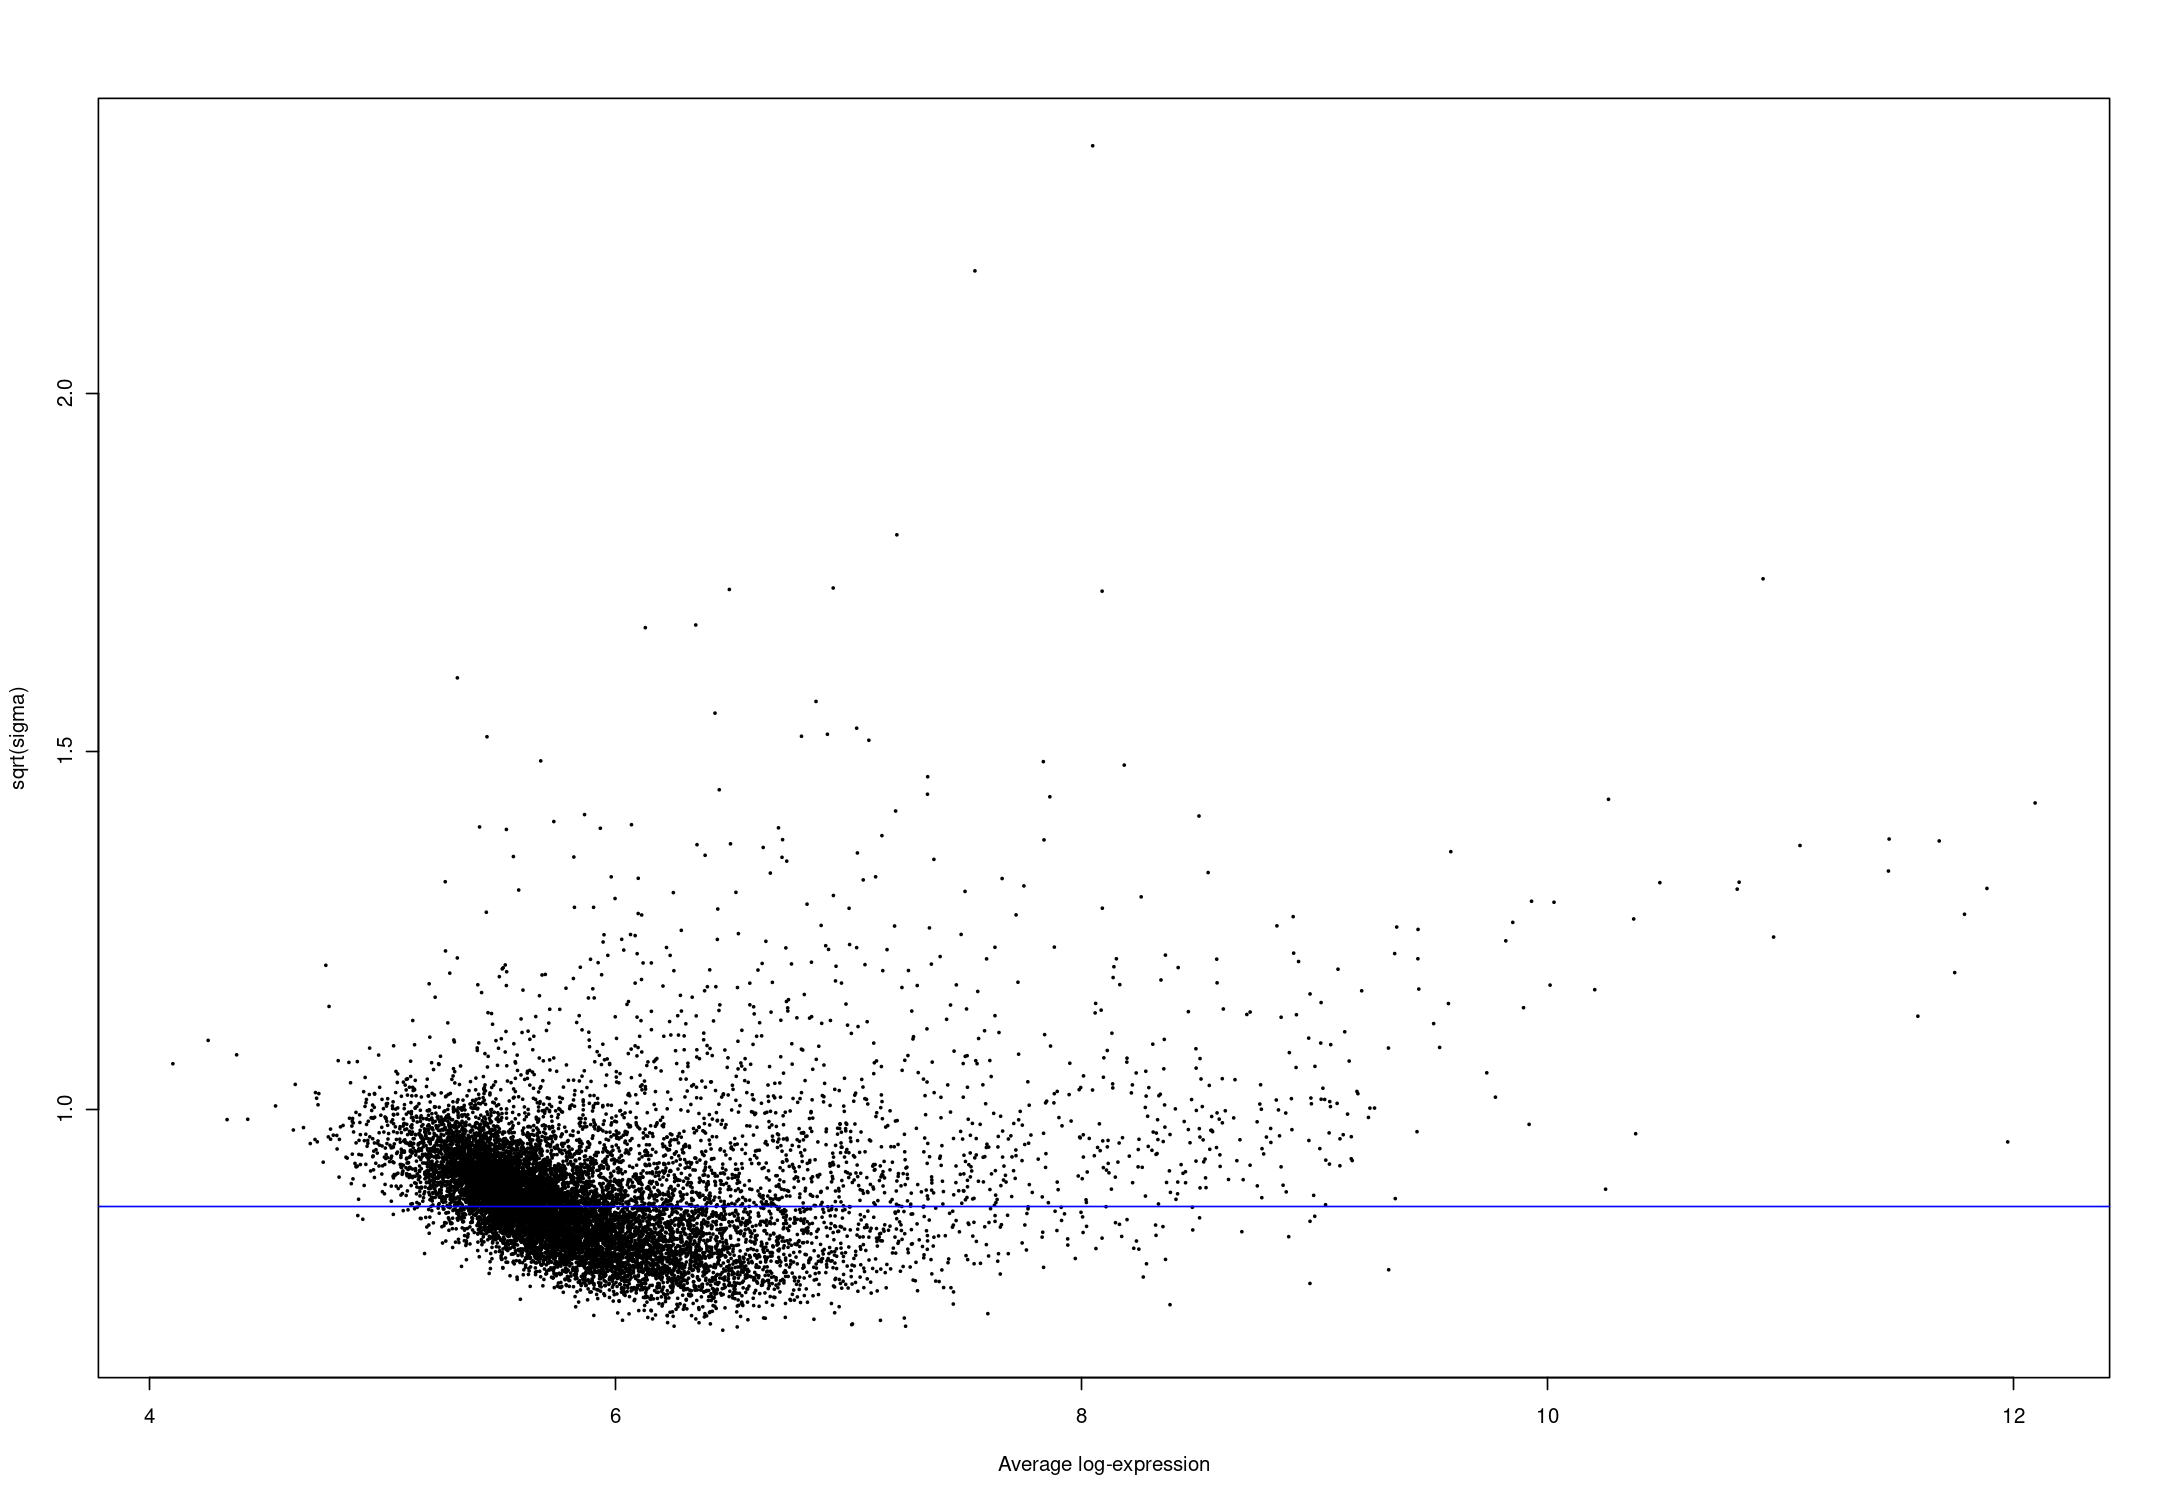

In [175]:
plotSA(fit)

### Examining  DE genes

In [176]:
summ.fit <- decideTests(fit)

## Figure 2J

In [177]:
summary(summ.fit)

       conditionCMC - (conditionEC + conditionFB)/2
Down                                           2417
NotSig                                         2893
Up                                             7490
       conditionEC - (conditionCMC + conditionFB)/2
Down                                           4305
NotSig                                         6788
Up                                             1707
       conditionFB - (conditionEC + conditionCMC)/2 conditionFB - conditionEC
Down                                           3415                      1056
NotSig                                         8070                     10979
Up                                             1315                       765
       conditionEC - conditionCMC conditionFB - conditionCMC
Down                         7661                       6017
NotSig                       2645                       4874
Up                           2494                       1909
       conditionCMC - condit

In [178]:
(length(colnames(summ.fit))-length(levels(condition)))

[1] 9

In [179]:
colnames(summ.fit)

[1] "conditionCMC - (conditionEC + conditionFB)/2"
 [2] "conditionEC - (conditionCMC + conditionFB)/2"
 [3] "conditionFB - (conditionEC + conditionCMC)/2"
 [4] "conditionFB - conditionEC"                   
 [5] "conditionEC - conditionCMC"                  
 [6] "conditionFB - conditionCMC"                  
 [7] "conditionCMC - conditionNo_Seg"              
 [8] "conditionEC - conditionNo_Seg"               
 [9] "conditionFB - conditionNo_Seg"               
[10] "conditionCMC"                                
[11] "conditionEC"                                 
[12] "conditionFB"                                 
[13] "conditionNo_Seg"

## Supplemental Table 2

In [182]:
for (i in 1:(length(colnames(summ.fit))-length(levels(condition)))){
    
    # print(head(topTable(fit, coef=colnames(summ.fit)[i], number=(summary(summ.fit)[1,i] + summary(summ.fit)[3,i])
    #               )
    #      ))
    
    ## make file 
    DE_filename = paste("Final_DE_", Analysis_name 
                                , gsub("-", "_" , 
                                      gsub("+", "", 
                                           gsub("/", "", 
                                                #gsub(")", "", 
                                                     #gsub("(", "", 
                                                          gsub(" ", "", colnames(summ.fit)[i])
                                                         #)
                                                    #)
                                                )
                                           )
                                      ), ".csv", sep=""
                       )
    
    write.csv(topTable(fit, coef=colnames(summ.fit)[i], number=Inf),                 
              file.path(getwd(), "results", 
                          DE_filename)
             )
    print(DE_filename)
}

[1] "Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09conditionCMC_(conditionEC+conditionFB)2.csv"
[1] "Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09conditionEC_(conditionCMC+conditionFB)2.csv"
[1] "Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09conditionFB_(conditionEC+conditionCMC)2.csv"
[1] "Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09conditionFB_conditionEC.csv"
[1] "Final_DE_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institut

## Supplemental Figure 2 - Figures for differentially expressed genes

In [185]:
options(repr.plot.width=18, repr.plot.height=6)


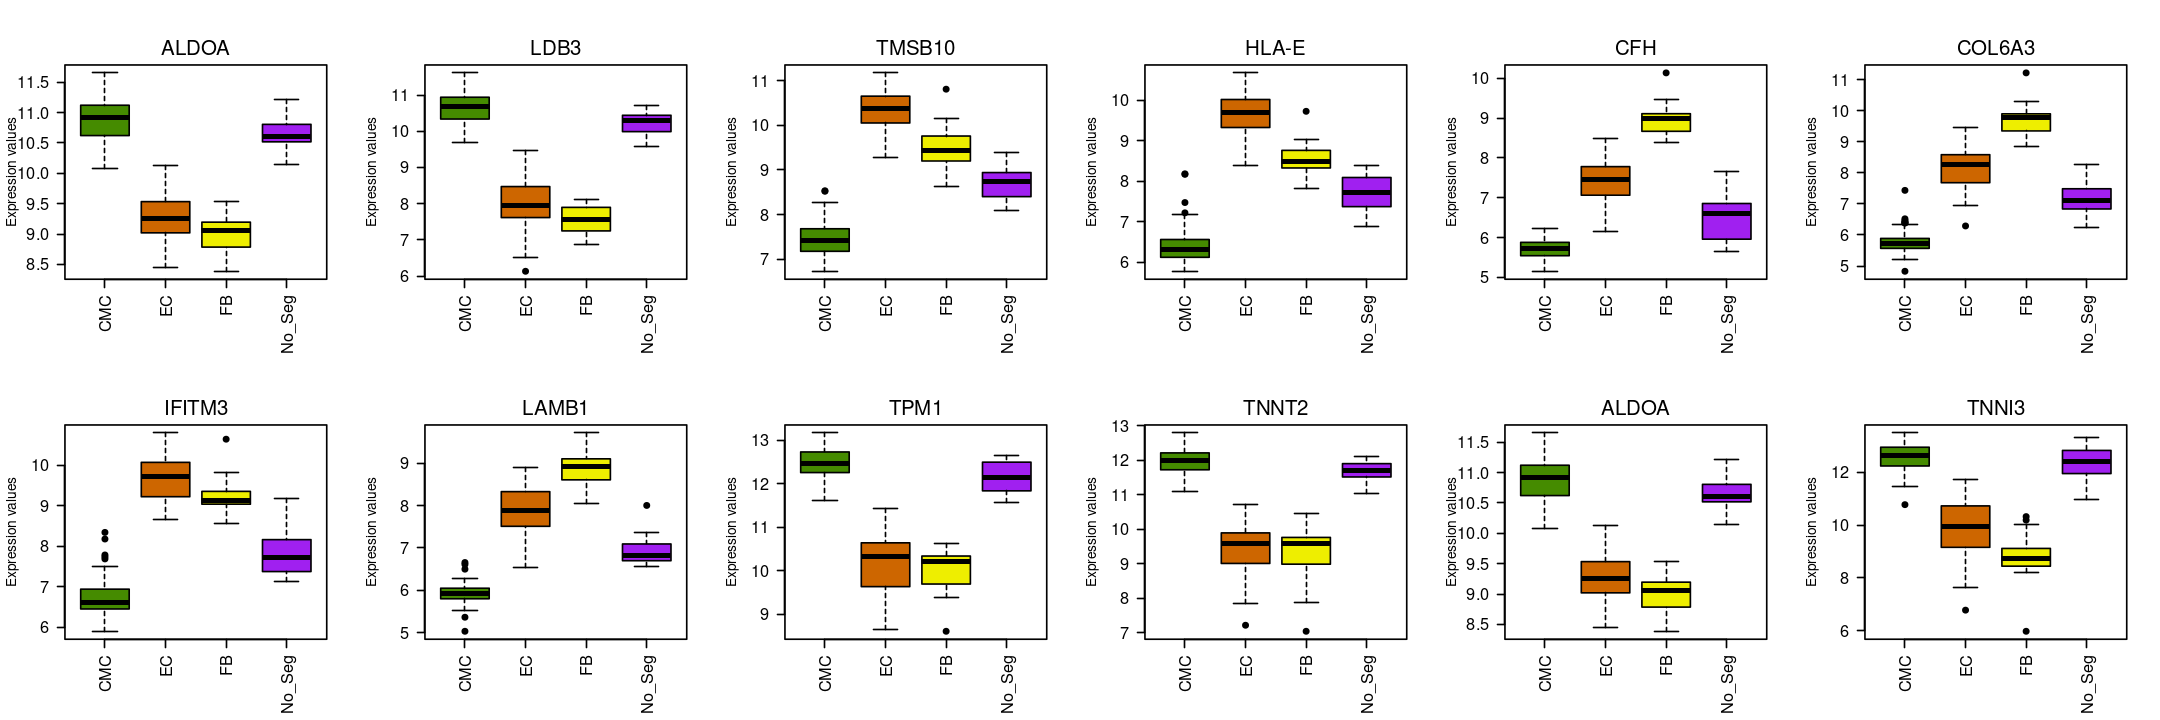

In [186]:
colkey = c("chartreuse4", "darkorange3", "yellow2", "purple")
par(mfrow=c(2,6))
for (a in colnames(L)[1:3]){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:2]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:2]

    # topTable(fit, coef=a, number=20)$SYMBOL
    par(cex.main=1.5)
    for (i in Pos_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=1.2,pch=16,cex=1,col=colkey,method="jitter",ylab="Expression values", xlab="")
        mtext(i, side = 3, line = 0.5, font = 14)

    }

}

for (a in colnames(L)[1:3]){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:2]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:2]

    # topTable(fit, coef=a, number=20)$SYMBOL
    par(cex.main=1.5)

    for (i in Neg_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=1.2,pch=16,cex=1,col=colkey,method="jitter",ylab="Expression values", xlab="")
        mtext(i, side = 3, line = 0.5, font = 14)
    }
}


In [187]:
colnames(L)[4:6]

[1] "conditionFB - conditionEC"  "conditionEC - conditionCMC"
[3] "conditionFB - conditionCMC"

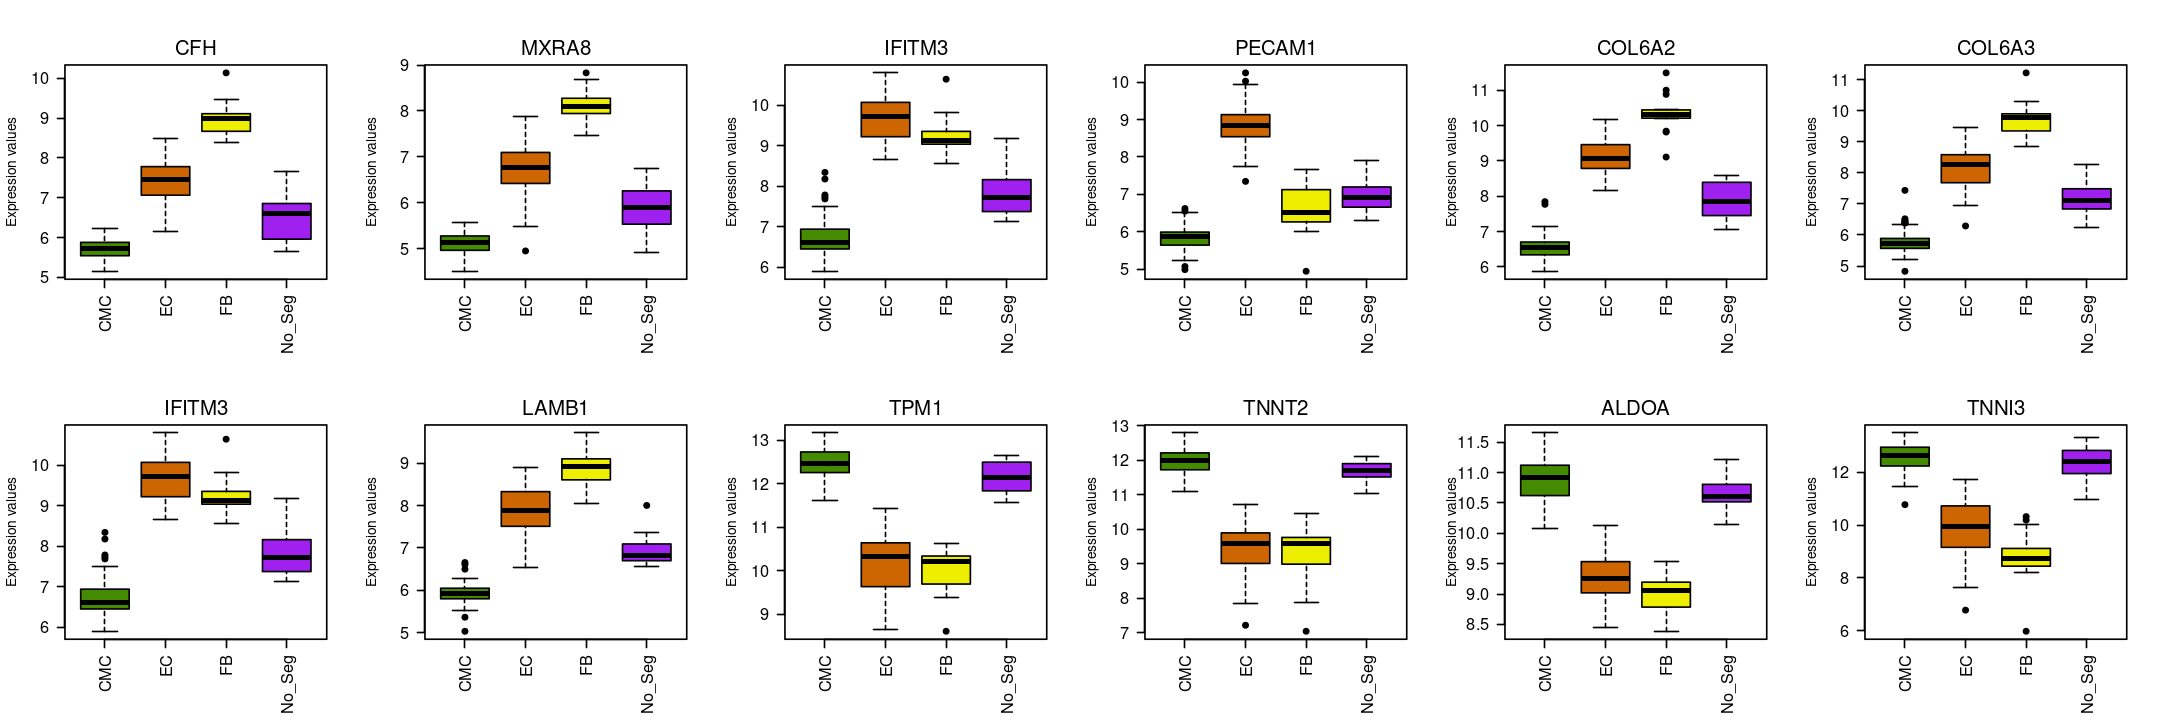

In [188]:
colkey = c("chartreuse4", "darkorange3", "yellow2", "purple")
par(mfrow=c(2,6))
for (a in colnames(L)[4:6]){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:2]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:2]

    # topTable(fit, coef=a, number=20)$SYMBOL
    par(cex.main=1.5)
    for (i in Pos_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=1.2,pch=16,cex=1,col=colkey,method="jitter",ylab="Expression values", xlab="")
        mtext(i, side = 3, line = 0.5, font = 14)

    }

}

for (a in colnames(L)[1:3]){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:2]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:2]

    # topTable(fit, coef=a, number=20)$SYMBOL
    par(cex.main=1.5)

    for (i in Neg_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=1.2,pch=16,cex=1,col=colkey,method="jitter",ylab="Expression values", xlab="")
        mtext(i, side = 3, line = 0.5, font = 14)
    }
}


In [189]:
colnames(L)[7:9]

[1] "conditionCMC - conditionNo_Seg" "conditionEC - conditionNo_Seg" 
[3] "conditionFB - conditionNo_Seg"

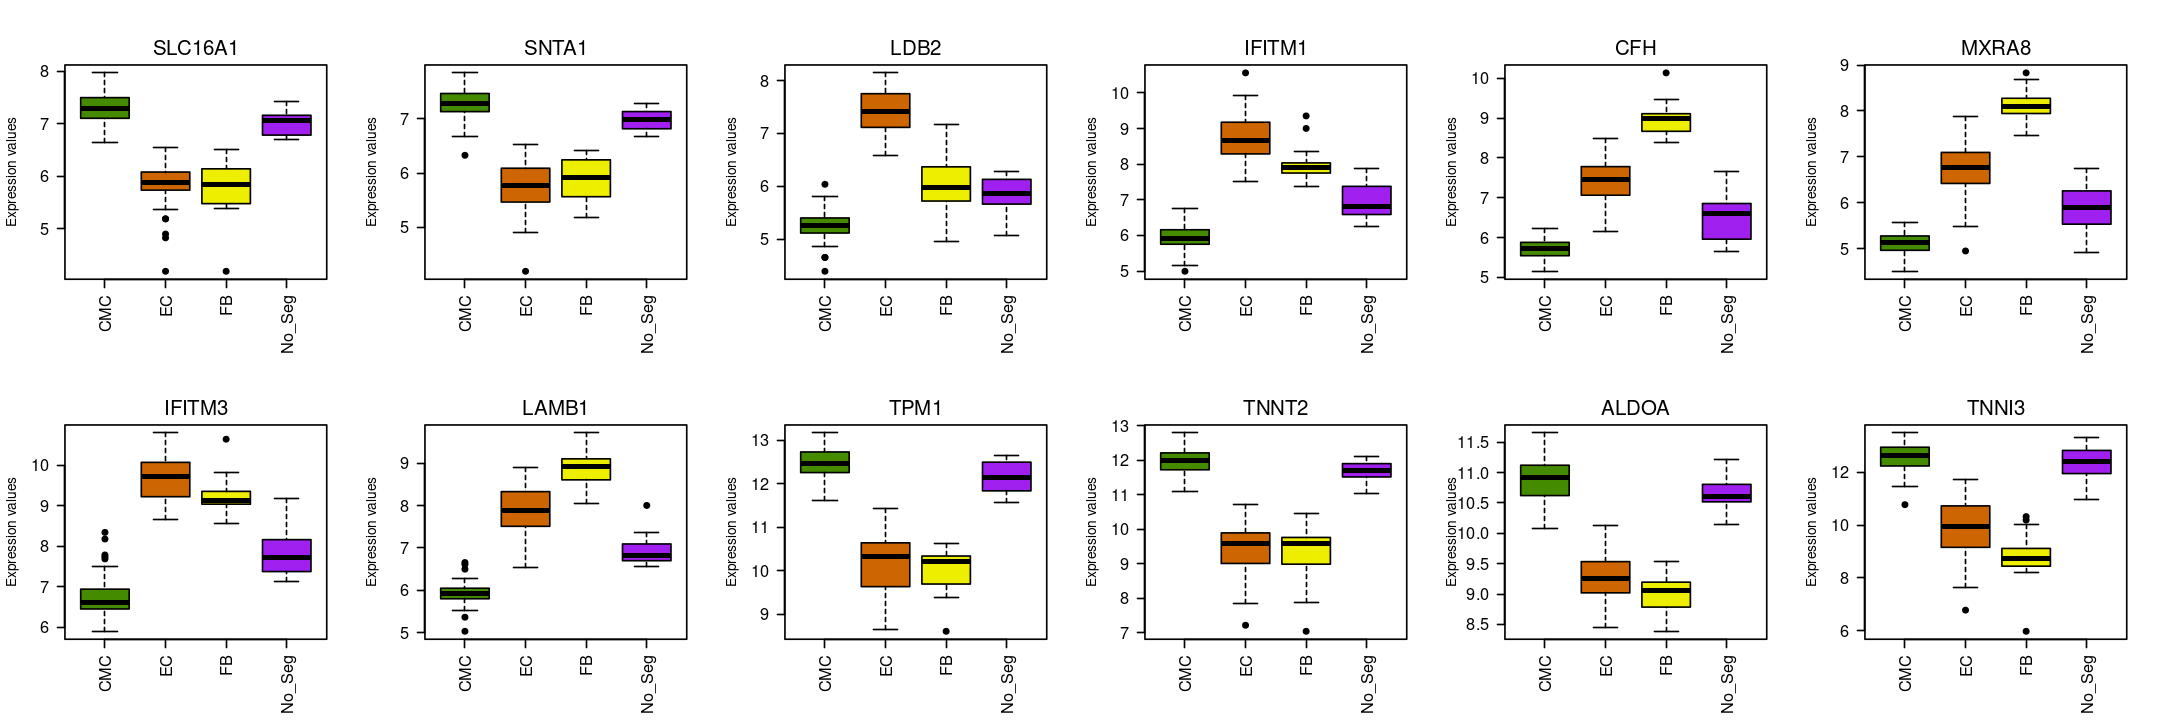

In [190]:
colkey = c("chartreuse4", "darkorange3", "yellow2", "purple")
par(mfrow=c(2,6))
for (a in colnames(L)[7:9]){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:2]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:2]

    # topTable(fit, coef=a, number=20)$SYMBOL
    par(cex.main=1.5)
    for (i in Pos_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=1.2,pch=16,cex=1,col=colkey,method="jitter",ylab="Expression values", xlab="")
        mtext(i, side = 3, line = 0.5, font = 14)

    }

}

for (a in colnames(L)[1:3]){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:2]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:2]

    # topTable(fit, coef=a, number=20)$SYMBOL
    par(cex.main=1.5)

    for (i in Neg_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=1.2,pch=16,cex=1,col=colkey,method="jitter",ylab="Expression values", xlab="")
        mtext(i, side = 3, line = 0.5, font = 14)
    }
}


## Additional analysis for paper 

In [206]:
colnames(L)

[1] "conditionCMC - (conditionEC + conditionFB)/2"
[2] "conditionEC - (conditionCMC + conditionFB)/2"
[3] "conditionFB - (conditionEC + conditionCMC)/2"
[4] "conditionFB - conditionEC"                   
[5] "conditionEC - conditionCMC"                  
[6] "conditionFB - conditionCMC"                  
[7] "conditionCMC - conditionNo_Seg"              
[8] "conditionEC - conditionNo_Seg"               
[9] "conditionFB - conditionNo_Seg"

In [207]:
a='conditionCMC - (conditionEC + conditionFB)/2'
table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)


In [208]:
pc1_genes <- rownames(pca.sample$loadings[order(pca.sample$loadings[1], decreasing=TRUE),c(1,2)])

In [210]:
table_tmp2<-table_tmp[pc1_genes,]

In [211]:
p_loading<- ggplot(data=table_tmp2, aes(x=factor(SYMBOL, level = pc1_genes), y=logFC)) +
  geom_bar(stat="identity") +
labs(x = "Loading(high -> low)") 

In [212]:
options(repr.plot.width=18, repr.plot.height=4)

In [213]:
p_corr <- p_loading +
  theme(#axis.title.x=element_blank(),
        text = element_text(size=14),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) + ylab("logFC(CMC vs. other cells)") + xlab("PC1 loading(high -> low)")

In [214]:
library(gridExtra)


In [215]:
p_htmap_grid<-grid.grabExpr(draw(p_htmap))

## Figure 2D-E

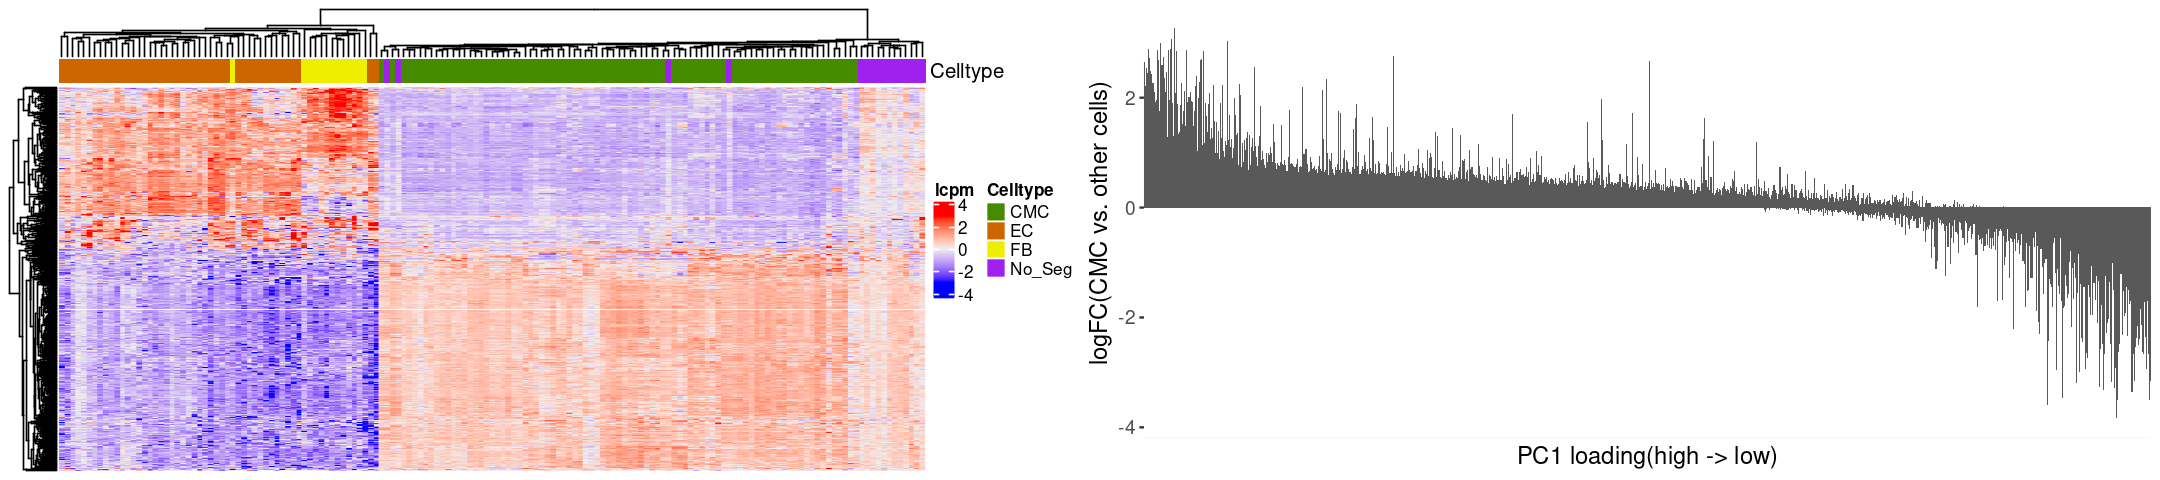

In [216]:
grid.arrange(p_htmap_grid, p_corr, ncol=2
            
        )


In [226]:
cor.test(table_tmp3$logFC, table_tmp3$PC1, method="kendall")
cor.test(table_tmp3$logFC, table_tmp3$PC1, method="pearson")
cor.test(table_tmp3$logFC, table_tmp3$PC1, method="spearman")


	Kendall's rank correlation tau

data:  table_tmp3$logFC and table_tmp3$PC1
z = 135.89, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.8441711 



	Pearson's product-moment correlation

data:  table_tmp3$logFC and table_tmp3$PC1
t = 190.35, df = 11518, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8666053 0.8754173
sample estimates:
      cor 
0.8710814 



	Spearman's rank correlation rho

data:  table_tmp3$logFC and table_tmp3$PC1
S = 8.972e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9647887 


In [217]:
head(pca.sample$loadings[order(pca.sample$loadings[1], decreasing=TRUE),c(1,2)])
dim(pca.sample$loadings[order(pca.sample$loadings[1], decreasing=TRUE),c(1,2)])

PC1        PC2         
CKMT2   0.01680638  0.009476639
SGCG    0.01679972  0.006102117
ADRA1A  0.01677255  0.003842498
GOT1    0.01675142  0.011515161
LMO7    0.01673108  0.008924081
SYNDIG1 0.01672078 -0.001765209

[1] 11520     2

In [218]:
head(table_tmp2)
dim(table_tmp2)

SYMBOL  ENTREZID GENENAME                            logFC     AveExpr 
CKMT2   CKMT2   1160     creatine kinase, mitochondrial 2    2.6488707 8.057902
SGCG    SGCG    6445     sarcoglycan gamma                   1.3337477 6.235410
ADRA1A  ADRA1A  148      adrenoceptor alpha 1A               1.0010358 6.432412
GOT1    GOT1    2805     glutamic-oxaloacetic transaminase 1 2.1523283 7.587898
LMO7    LMO7    4008     LIM domain 7                        1.3784650 6.403004
SYNDIG1 SYNDIG1 79953    synapse differentiation inducing 1  0.8673144 6.384266
        t        P.Value       adj.P.Val     B         z.std   
CKMT2   22.34085  2.296293e-97  1.209570e-95 106.44803 20.94038
SGCG    17.39612  1.471377e-57  3.381262e-56  76.58485 15.99121
ADRA1A  14.99450  1.875824e-45  3.150991e-44  62.35523 14.14969
GOT1    22.87370 8.023258e-103 4.689393e-101 107.08784 21.53075
LMO7    18.50231  3.793546e-69  1.170058e-67  83.93208 17.57553
SYNDIG1 13.62089  1.550123e-37  2.124366e-36  55.28444 12.80435

[1] 11520    10

In [219]:
table_tmp3<-cbind(table_tmp2, pca.sample$loadings[order(pca.sample$loadings[1], decreasing=TRUE),c(1,2)])

In [220]:
options(repr.plot.width=7.5, repr.plot.height=5)


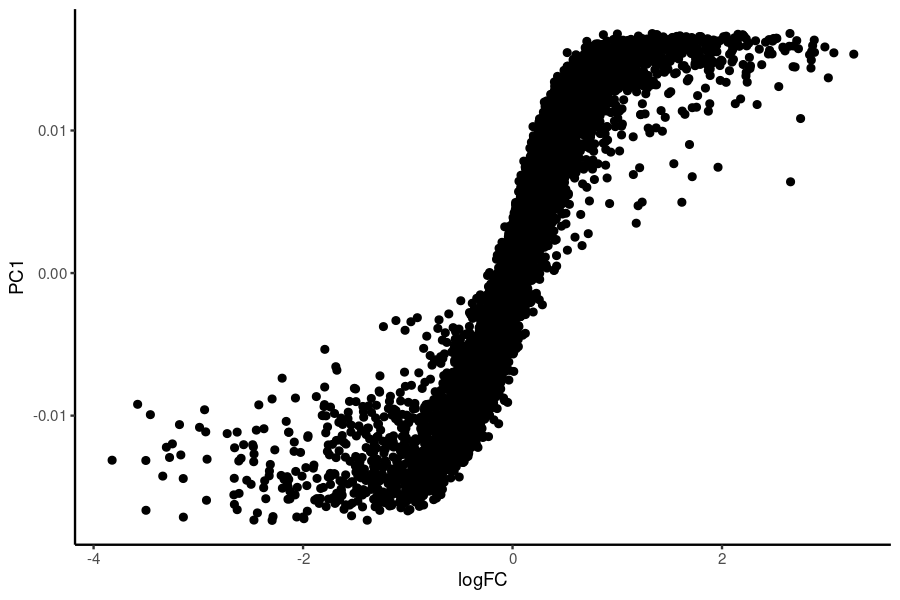

In [221]:
ggplot(data = table_tmp3) +
geom_point(
    mapping= aes(x = logFC, y = PC1), 
    position = "jitter"
    ) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))


# Save image & sessionInfo()

In [16]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))



In [228]:
print(file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))

[1] "/gpfs/group/home/salee/Spatial_CMP/Spatialanalysis_SejongIn_celltype_FullROI_N_cellselection_N_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Non_N_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-09_analysis.RData"


In [229]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRblas.so
LAPACK: /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ggpubr_0.5.0              nortest_1.0-4            
 [3] DOSE_3.20.1               clusterProfiler_4.2.1    
 [5] scales_1.2.1              ggbreak_0.1.0            
 [7] patchwork_1.1.2           ggnewscale_0.4.7 